<a href="https://colab.research.google.com/github/cpokala/DPSA-and-HPV-in-Indiana-/blob/main/DPSA_and_HPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl


In [2]:
import pandas as pd

In [3]:
# Load the file from Colab's file system
file_path = '/content/All DPSA.XLSX'

# Read the Excel file
dpsa_data = pd.read_excel(file_path)



In [4]:
# Display the first few rows to ensure the data has been loaded correctly
dpsa_data.head()


Designation Type Primary State Name       County Name  \
0         Rural Health Clinic            Indiana  Adams County, IN   
1         Rural Health Clinic            Indiana  Adams County, IN   
2         Rural Health Clinic            Indiana  Adams County, IN   
3         Rural Health Clinic            Indiana  Adams County, IN   
4  Low Income Population HPSA            Indiana  Allen County, IN   

   HPSA Score      Status Rural Status Designation Date Update Date  
0          15  Designated        Rural       09/23/2022  09/23/2022  
1          15  Designated        Rural       09/23/2022  09/23/2022  
2          15  Designated        Rural       09/23/2022  09/23/2022  
3          15  Designated        Rural       09/23/2022  09/23/2022  
4           8   Withdrawn    Non-Rural       06/16/1998  07/02/2018

In [5]:
dpsa_data

Designation Type Primary State Name  \
0                             Rural Health Clinic            Indiana   
1                             Rural Health Clinic            Indiana   
2                             Rural Health Clinic            Indiana   
3                             Rural Health Clinic            Indiana   
4                      Low Income Population HPSA            Indiana   
..                                            ...                ...   
107  Federally Qualified Health Center Look-alike            Indiana   
108                           Rural Health Clinic            Indiana   
109             Federally Qualified Health Center            Indiana   
110             Federally Qualified Health Center            Indiana   
111                           Rural Health Clinic            Indiana   

          County Name  HPSA Score      Status Rural Status Designation Date  \
0    Adams County, IN          15  Designated        Rural       09/23/2022   
1    Adams County, IN          15  Designated        Rural       09/23/2022   
2    Adams County, IN          15  Designated        Rural       09/23/2022   
3    Adams County, IN          15  Designated        Rural       09/23/2022   
4    Allen County, IN           8   Withdrawn    Non-Rural       06/16/1998   
..                ...         ...         ...          ...              ...   
107  Wayne County, IN          19  Designated        Rural       02/28/2019   
108  Wayne County, IN           4   Withdrawn        Rural       10/10/2013   
109  Wayne County, IN          15  Designated        Rural       09/18/2020   
110  Wayne County, IN          19   Withdrawn        Rural       11/16/2016   
111  White County, IN          17   Withdrawn        Rural       08/18/2019   

    Update Date  
0    09/23/2022  
1    09/23/2022  
2    09/23/2022  
3    09/23/2022  
4    07/02/2018  
..          ...  
107  05/07/2021  
108  06/25/2019  
109  09/11/2021  
110  09/18/2020  
111  02/06/2020  

[112 rows x 8 columns]

In [6]:
# Convert the 'Designation Date' and 'Update Date' columns to datetime format
dpsa_data['Designation Date'] = pd.to_datetime(dpsa_data['Designation Date'], errors='coerce')
dpsa_data['Update Date'] = pd.to_datetime(dpsa_data['Update Date'], errors='coerce')

# Create new columns 'Designated Year' and 'Updated Year' by extracting the year
dpsa_data['Designated Year'] = dpsa_data['Designation Date'].dt.year
dpsa_data['Updated Year'] = dpsa_data['Update Date'].dt.year

# Display the updated dataframe
dpsa_data.head()


Designation Type Primary State Name       County Name  \
0         Rural Health Clinic            Indiana  Adams County, IN   
1         Rural Health Clinic            Indiana  Adams County, IN   
2         Rural Health Clinic            Indiana  Adams County, IN   
3         Rural Health Clinic            Indiana  Adams County, IN   
4  Low Income Population HPSA            Indiana  Allen County, IN   

   HPSA Score      Status Rural Status Designation Date Update Date  \
0          15  Designated        Rural       2022-09-23  2022-09-23   
1          15  Designated        Rural       2022-09-23  2022-09-23   
2          15  Designated        Rural       2022-09-23  2022-09-23   
3          15  Designated        Rural       2022-09-23  2022-09-23   
4           8   Withdrawn    Non-Rural       1998-06-16  2018-07-02   

   Designated Year  Updated Year  
0             2022          2022  
1             2022          2022  
2             2022          2022  
3             2022          2022  
4             1998          2018

In [7]:
# Drop the 'Primary State Name', Designation Date and Update Date column from the dataframe
dpsa_data = dpsa_data.drop(columns=['Primary State Name', 'Designation Date', 'Update Date'])

# Display the updated dataframe
dpsa_data.head()


Designation Type       County Name  HPSA Score      Status  \
0         Rural Health Clinic  Adams County, IN          15  Designated   
1         Rural Health Clinic  Adams County, IN          15  Designated   
2         Rural Health Clinic  Adams County, IN          15  Designated   
3         Rural Health Clinic  Adams County, IN          15  Designated   
4  Low Income Population HPSA  Allen County, IN           8   Withdrawn   

  Rural Status  Designated Year  Updated Year  
0        Rural             2022          2022  
1        Rural             2022          2022  
2        Rural             2022          2022  
3        Rural             2022          2022  
4    Non-Rural             1998          2018

In [8]:
# Create a new dataframe with only the specified columns
new_dpsa_table = dpsa_data[['County Name', 'Status', 'Designated Year', 'Updated Year']]

# Display the new datafra
new_dpsa_table.head()


County Name      Status  Designated Year  Updated Year
0  Adams County, IN  Designated             2022          2022
1  Adams County, IN  Designated             2022          2022
2  Adams County, IN  Designated             2022          2022
3  Adams County, IN  Designated             2022          2022
4  Allen County, IN   Withdrawn             1998          2018

In [9]:
# Add five new empty columns to the new_dpsa_table using .loc :
new_dpsa_table.loc[:, '2018'] = ''
new_dpsa_table.loc[:, '2019'] = ''
new_dpsa_table.loc[:, '2020'] = ''
new_dpsa_table.loc[:, '2021'] = ''
new_dpsa_table.loc[:, '2022'] = ''

# Display the updated new_dpsa_table
new_dpsa_table.head()

<ipython-input-9-2845b5ad6ff0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dpsa_table.loc[:, '2018'] = ''
<ipython-input-9-2845b5ad6ff0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dpsa_table.loc[:, '2019'] = ''


County Name      Status  Designated Year  Updated Year 2018 2019 2020  \
0  Adams County, IN  Designated             2022          2022                  
1  Adams County, IN  Designated             2022          2022                  
2  Adams County, IN  Designated             2022          2022                  
3  Adams County, IN  Designated             2022          2022                  
4  Allen County, IN   Withdrawn             1998          2018                  

  2021 2022  
0            
1            
2            
3            
4

In [10]:
new_dpsa_table=new_dpsa_table[new_dpsa_table['Updated Year']>=2018]
new_dpsa_table

County Name      Status  Designated Year  Updated Year 2018 2019  \
0    Adams County, IN  Designated             2022          2022             
1    Adams County, IN  Designated             2022          2022             
2    Adams County, IN  Designated             2022          2022             
3    Adams County, IN  Designated             2022          2022             
4    Allen County, IN   Withdrawn             1998          2018             
..                ...         ...              ...           ...  ...  ...   
107  Wayne County, IN  Designated             2019          2021             
108  Wayne County, IN   Withdrawn             2013          2019             
109  Wayne County, IN  Designated             2020          2021             
110  Wayne County, IN   Withdrawn             2016          2020             
111  White County, IN   Withdrawn             2019          2020             

    2020 2021 2022  
0                   
1                   
2                   
3                   
4                   
..   ...  ...  ...  
107                 
108                 
109                 
110                 
111                 

[100 rows x 9 columns]

In [11]:
#Since we need data from 2018, if it was designated bedore that and is still designated, we will take minimum year as 2018.
new_dpsa_table['Designated Year']=new_dpsa_table['Designated Year'].where(new_dpsa_table['Designated Year'] > 2018, 2017)
new_dpsa_table.head(30)

County Name      Status  Designated Year  Updated Year 2018 2019  \
0       Adams County, IN  Designated             2022          2022             
1       Adams County, IN  Designated             2022          2022             
2       Adams County, IN  Designated             2022          2022             
3       Adams County, IN  Designated             2022          2022             
4       Allen County, IN   Withdrawn             2017          2018             
5       Allen County, IN  Designated             2017          2021             
6       Allen County, IN  Designated             2021          2021             
7       Brown County, IN   Withdrawn             2017          2019             
8       Clark County, IN  Designated             2017          2022             
9       Clark County, IN  Designated             2017          2021             
10       Clay County, IN   Withdrawn             2017          2020             
11       Clay County, IN   Withdrawn             2017          2020             
12       Cook County, IL  Designated             2017          2021             
13   Crawford County, IN   Withdrawn             2019          2020             
14   Crawford County, IN   Withdrawn             2019          2020             
17   Delaware County, IN  Designated             2017          2021             
18   Delaware County, IN  Designated             2017          2021             
19    Elkhart County, IN   Withdrawn             2017          2018             
20    Elkhart County, IN  Designated             2017          2021             
21    Elkhart County, IN  Designated             2017          2021             
22   Fountain County, IN   Withdrawn             2019          2020             
24     Gibson County, IN   Withdrawn             2017          2020             
25     Gibson County, IN   Withdrawn             2017          2019             
26     Gibson County, IN  Designated             2020          2021             
27      Grant County, IN  Designated             2017          2021             
28     Greene County, IN   Withdrawn             2017          2020             
29     Greene County, IN  Designated             2017          2021             
30     Greene County, IN  Designated             2017          2021             
31  Hendricks County, IN   Withdrawn             2017          2019             
32  Hendricks County, IN  Designated             2022          2022             

   2020 2021 2022  
0                  
1                  
2                  
3                  
4                  
5                  
6                  
7                  
8                  
9                  
10                 
11                 
12                 
13                 
14                 
17                 
18                 
19                 
20                 
21                 
22                 
24                 
25                 
26                 
27                 
28                 
29                 
30                 
31                 
32

In [12]:
# To get data for 2018:
# Define the function to apply
def individual_year_data(rows):
  check_year=2018
  if rows['Designated Year']==check_year:
    return 1
  elif rows['Designated Year']<check_year and check_year< rows['Updated Year']:
    return 1
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Designated')  and (rows['Updated Year'] > rows['Designated Year']):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Withdrawn')  and (rows['Updated Year'] > rows['Designated Year']):
    return 0
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year) and (rows['Status']=='Designated')  ):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year)  and  (rows['Designated Year'] < rows['Updated Year']) and (rows['Status']=='Withdrawn')  ):
    return 1

  else:
    return -1


# Apply the function to each row and create a new column '2018'
new_dpsa_table['2018'] = new_dpsa_table.apply(individual_year_data, axis=1)

new_dpsa_table.head(60)

County Name      Status  Designated Year  Updated Year  2018  \
0       Adams County, IN  Designated             2022          2022     0   
1       Adams County, IN  Designated             2022          2022     0   
2       Adams County, IN  Designated             2022          2022     0   
3       Adams County, IN  Designated             2022          2022     0   
4       Allen County, IN   Withdrawn             2017          2018     0   
5       Allen County, IN  Designated             2017          2021     1   
6       Allen County, IN  Designated             2021          2021     0   
7       Brown County, IN   Withdrawn             2017          2019     1   
8       Clark County, IN  Designated             2017          2022     1   
9       Clark County, IN  Designated             2017          2021     1   
10       Clay County, IN   Withdrawn             2017          2020     1   
11       Clay County, IN   Withdrawn             2017          2020     1   
12       Cook County, IL  Designated             2017          2021     1   
13   Crawford County, IN   Withdrawn             2019          2020     0   
14   Crawford County, IN   Withdrawn             2019          2020     0   
17   Delaware County, IN  Designated             2017          2021     1   
18   Delaware County, IN  Designated             2017          2021     1   
19    Elkhart County, IN   Withdrawn             2017          2018     0   
20    Elkhart County, IN  Designated             2017          2021     1   
21    Elkhart County, IN  Designated             2017          2021     1   
22   Fountain County, IN   Withdrawn             2019          2020     0   
24     Gibson County, IN   Withdrawn             2017          2020     1   
25     Gibson County, IN   Withdrawn             2017          2019     1   
26     Gibson County, IN  Designated             2020          2021     1   
27      Grant County, IN  Designated             2017          2021     1   
28     Greene County, IN   Withdrawn             2017          2020     1   
29     Greene County, IN  Designated             2017          2021     1   
30     Greene County, IN  Designated             2017          2021     1   
31  Hendricks County, IN   Withdrawn             2017          2019     1   
32  Hendricks County, IN  Designated             2022          2022     0   
33      Henry County, IN   Withdrawn             2017          2020     1   
34      Henry County, IN   Withdrawn             2019          2020     0   
35      Henry County, IN   Withdrawn             2017          2020     1   
36      Henry County, IN  Designated             2017          2021     1   
37     Howard County, IN  Designated             2017          2021     1   
38     Jasper County, IN   Withdrawn             2017          2020     1   
39  Jefferson County, IN  Designated             2022          2022     0   
41   Jennings County, IN  Designated             2022          2022     0   
42    Johnson County, IN  Designated             2022          2022     0   
43    Johnson County, IN  Designated             2017          2021     1   
44       Knox County, IN  Designated             2020          2021     1   
45       Knox County, IN  Designated             2020          2021     1   
46  Kosciusko County, IN  Designated             2021          2021     0   
47   La Porte County, IN  Designated             2017          2021     1   
49   Lagrange County, IN   Withdrawn             2017          2018     0   
51       Lake County, IN   Withdrawn             2017          2018     0   
52       Lake County, IN  Designated             2017          2021     1   
53       Lake County, IN  Designated             2019          2021     1   
54       Lake County, IN  Designated             2017          2021     1   
55       Lake County, IN  Designated             2019          2021     1   
56    Madison County, IN  Designated             2017          2021     1   
57    Mad

In [13]:
# To get data for 2019:
# Define the function to apply
def individual_year_data(rows):
  check_year=2019
  if rows['Designated Year']==check_year:
    return 1
  elif rows['Designated Year']<check_year and check_year< rows['Updated Year']:
    return 1
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Designated')  and (rows['Updated Year'] > rows['Designated Year']):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Withdrawn')  and (rows['Updated Year'] > rows['Designated Year']):
    return 0
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year) and (rows['Status']=='Designated')  ):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year)  and  (rows['Designated Year'] < rows['Updated Year']) and (rows['Status']=='Withdrawn')  ):
    return 1

  else:
    return -1


# Apply the function to each row and create a new column '2018'
new_dpsa_table['2019'] = new_dpsa_table.apply(individual_year_data, axis=1)

new_dpsa_table.head(60)

County Name      Status  Designated Year  Updated Year  2018  \
0       Adams County, IN  Designated             2022          2022     0   
1       Adams County, IN  Designated             2022          2022     0   
2       Adams County, IN  Designated             2022          2022     0   
3       Adams County, IN  Designated             2022          2022     0   
4       Allen County, IN   Withdrawn             2017          2018     0   
5       Allen County, IN  Designated             2017          2021     1   
6       Allen County, IN  Designated             2021          2021     0   
7       Brown County, IN   Withdrawn             2017          2019     1   
8       Clark County, IN  Designated             2017          2022     1   
9       Clark County, IN  Designated             2017          2021     1   
10       Clay County, IN   Withdrawn             2017          2020     1   
11       Clay County, IN   Withdrawn             2017          2020     1   
12       Cook County, IL  Designated             2017          2021     1   
13   Crawford County, IN   Withdrawn             2019          2020     0   
14   Crawford County, IN   Withdrawn             2019          2020     0   
17   Delaware County, IN  Designated             2017          2021     1   
18   Delaware County, IN  Designated             2017          2021     1   
19    Elkhart County, IN   Withdrawn             2017          2018     0   
20    Elkhart County, IN  Designated             2017          2021     1   
21    Elkhart County, IN  Designated             2017          2021     1   
22   Fountain County, IN   Withdrawn             2019          2020     0   
24     Gibson County, IN   Withdrawn             2017          2020     1   
25     Gibson County, IN   Withdrawn             2017          2019     1   
26     Gibson County, IN  Designated             2020          2021     1   
27      Grant County, IN  Designated             2017          2021     1   
28     Greene County, IN   Withdrawn             2017          2020     1   
29     Greene County, IN  Designated             2017          2021     1   
30     Greene County, IN  Designated             2017          2021     1   
31  Hendricks County, IN   Withdrawn             2017          2019     1   
32  Hendricks County, IN  Designated             2022          2022     0   
33      Henry County, IN   Withdrawn             2017          2020     1   
34      Henry County, IN   Withdrawn             2019          2020     0   
35      Henry County, IN   Withdrawn             2017          2020     1   
36      Henry County, IN  Designated             2017          2021     1   
37     Howard County, IN  Designated             2017          2021     1   
38     Jasper County, IN   Withdrawn             2017          2020     1   
39  Jefferson County, IN  Designated             2022          2022     0   
41   Jennings County, IN  Designated             2022          2022     0   
42    Johnson County, IN  Designated             2022          2022     0   
43    Johnson County, IN  Designated             2017          2021     1   
44       Knox County, IN  Designated             2020          2021     1   
45       Knox County, IN  Designated             2020          2021     1   
46  Kosciusko County, IN  Designated             2021          2021     0   
47   La Porte County, IN  Designated             2017          2021     1   
49   Lagrange County, IN   Withdrawn             2017          2018     0   
51       Lake County, IN   Withdrawn             2017          2018     0   
52       Lake County, IN  Designated             2017          2021     1   
53       Lake County, IN  Designated             2019          2021     1   
54       Lake County, IN  Designated             2017          2021     1   
55       Lake County, IN  Designated             2019          2021     1   
56    Madison County, IN  Designated             2017          2021     1   
57    Mad

In [14]:
# To get data for 2020:
# Define the function to apply
def individual_year_data(rows):
  check_year=2020
  if rows['Designated Year']==check_year:
    return 1
  elif rows['Designated Year']<check_year and check_year< rows['Updated Year']:
    return 1
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Designated')  and (rows['Updated Year'] > rows['Designated Year']):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Withdrawn')  and (rows['Updated Year'] > rows['Designated Year']):
    return 0
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year) and (rows['Status']=='Designated')  ):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year)  and  (rows['Designated Year'] < rows['Updated Year']) and (rows['Status']=='Withdrawn')  ):
    return 1

  else:
    return -1


# Apply the function to each row and create a new column '2018'
new_dpsa_table['2020'] = new_dpsa_table.apply(individual_year_data, axis=1)

new_dpsa_table.head(60)

County Name      Status  Designated Year  Updated Year  2018  \
0       Adams County, IN  Designated             2022          2022     0   
1       Adams County, IN  Designated             2022          2022     0   
2       Adams County, IN  Designated             2022          2022     0   
3       Adams County, IN  Designated             2022          2022     0   
4       Allen County, IN   Withdrawn             2017          2018     0   
5       Allen County, IN  Designated             2017          2021     1   
6       Allen County, IN  Designated             2021          2021     0   
7       Brown County, IN   Withdrawn             2017          2019     1   
8       Clark County, IN  Designated             2017          2022     1   
9       Clark County, IN  Designated             2017          2021     1   
10       Clay County, IN   Withdrawn             2017          2020     1   
11       Clay County, IN   Withdrawn             2017          2020     1   
12       Cook County, IL  Designated             2017          2021     1   
13   Crawford County, IN   Withdrawn             2019          2020     0   
14   Crawford County, IN   Withdrawn             2019          2020     0   
17   Delaware County, IN  Designated             2017          2021     1   
18   Delaware County, IN  Designated             2017          2021     1   
19    Elkhart County, IN   Withdrawn             2017          2018     0   
20    Elkhart County, IN  Designated             2017          2021     1   
21    Elkhart County, IN  Designated             2017          2021     1   
22   Fountain County, IN   Withdrawn             2019          2020     0   
24     Gibson County, IN   Withdrawn             2017          2020     1   
25     Gibson County, IN   Withdrawn             2017          2019     1   
26     Gibson County, IN  Designated             2020          2021     1   
27      Grant County, IN  Designated             2017          2021     1   
28     Greene County, IN   Withdrawn             2017          2020     1   
29     Greene County, IN  Designated             2017          2021     1   
30     Greene County, IN  Designated             2017          2021     1   
31  Hendricks County, IN   Withdrawn             2017          2019     1   
32  Hendricks County, IN  Designated             2022          2022     0   
33      Henry County, IN   Withdrawn             2017          2020     1   
34      Henry County, IN   Withdrawn             2019          2020     0   
35      Henry County, IN   Withdrawn             2017          2020     1   
36      Henry County, IN  Designated             2017          2021     1   
37     Howard County, IN  Designated             2017          2021     1   
38     Jasper County, IN   Withdrawn             2017          2020     1   
39  Jefferson County, IN  Designated             2022          2022     0   
41   Jennings County, IN  Designated             2022          2022     0   
42    Johnson County, IN  Designated             2022          2022     0   
43    Johnson County, IN  Designated             2017          2021     1   
44       Knox County, IN  Designated             2020          2021     1   
45       Knox County, IN  Designated             2020          2021     1   
46  Kosciusko County, IN  Designated             2021          2021     0   
47   La Porte County, IN  Designated             2017          2021     1   
49   Lagrange County, IN   Withdrawn             2017          2018     0   
51       Lake County, IN   Withdrawn             2017          2018     0   
52       Lake County, IN  Designated             2017          2021     1   
53       Lake County, IN  Designated             2019          2021     1   
54       Lake County, IN  Designated             2017          2021     1   
55       Lake County, IN  Designated             2019          2021     1   
56    Madison County, IN  Designated             2017          2021     1   
57    Mad

In [15]:
# To get data for 2021:
# Define the function to apply
def individual_year_data(rows):
  check_year=2021
  if rows['Designated Year']==check_year:
    return 1
  elif rows['Designated Year']<check_year and check_year< rows['Updated Year']:
    return 1
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Designated')  and (rows['Updated Year'] > rows['Designated Year']):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Withdrawn')  and (rows['Updated Year'] > rows['Designated Year']):
    return 0
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year) and (rows['Status']=='Designated')  ):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year)  and  (rows['Designated Year'] < rows['Updated Year']) and (rows['Status']=='Withdrawn')  ):
    return 1

  else:
    return -1


# Apply the function to each row and create a new column '2018'
new_dpsa_table['2021'] = new_dpsa_table.apply(individual_year_data, axis=1)

new_dpsa_table.head(60)

County Name      Status  Designated Year  Updated Year  2018  \
0       Adams County, IN  Designated             2022          2022     0   
1       Adams County, IN  Designated             2022          2022     0   
2       Adams County, IN  Designated             2022          2022     0   
3       Adams County, IN  Designated             2022          2022     0   
4       Allen County, IN   Withdrawn             2017          2018     0   
5       Allen County, IN  Designated             2017          2021     1   
6       Allen County, IN  Designated             2021          2021     0   
7       Brown County, IN   Withdrawn             2017          2019     1   
8       Clark County, IN  Designated             2017          2022     1   
9       Clark County, IN  Designated             2017          2021     1   
10       Clay County, IN   Withdrawn             2017          2020     1   
11       Clay County, IN   Withdrawn             2017          2020     1   
12       Cook County, IL  Designated             2017          2021     1   
13   Crawford County, IN   Withdrawn             2019          2020     0   
14   Crawford County, IN   Withdrawn             2019          2020     0   
17   Delaware County, IN  Designated             2017          2021     1   
18   Delaware County, IN  Designated             2017          2021     1   
19    Elkhart County, IN   Withdrawn             2017          2018     0   
20    Elkhart County, IN  Designated             2017          2021     1   
21    Elkhart County, IN  Designated             2017          2021     1   
22   Fountain County, IN   Withdrawn             2019          2020     0   
24     Gibson County, IN   Withdrawn             2017          2020     1   
25     Gibson County, IN   Withdrawn             2017          2019     1   
26     Gibson County, IN  Designated             2020          2021     1   
27      Grant County, IN  Designated             2017          2021     1   
28     Greene County, IN   Withdrawn             2017          2020     1   
29     Greene County, IN  Designated             2017          2021     1   
30     Greene County, IN  Designated             2017          2021     1   
31  Hendricks County, IN   Withdrawn             2017          2019     1   
32  Hendricks County, IN  Designated             2022          2022     0   
33      Henry County, IN   Withdrawn             2017          2020     1   
34      Henry County, IN   Withdrawn             2019          2020     0   
35      Henry County, IN   Withdrawn             2017          2020     1   
36      Henry County, IN  Designated             2017          2021     1   
37     Howard County, IN  Designated             2017          2021     1   
38     Jasper County, IN   Withdrawn             2017          2020     1   
39  Jefferson County, IN  Designated             2022          2022     0   
41   Jennings County, IN  Designated             2022          2022     0   
42    Johnson County, IN  Designated             2022          2022     0   
43    Johnson County, IN  Designated             2017          2021     1   
44       Knox County, IN  Designated             2020          2021     1   
45       Knox County, IN  Designated             2020          2021     1   
46  Kosciusko County, IN  Designated             2021          2021     0   
47   La Porte County, IN  Designated             2017          2021     1   
49   Lagrange County, IN   Withdrawn             2017          2018     0   
51       Lake County, IN   Withdrawn             2017          2018     0   
52       Lake County, IN  Designated             2017          2021     1   
53       Lake County, IN  Designated             2019          2021     1   
54       Lake County, IN  Designated             2017          2021     1   
55       Lake County, IN  Designated             2019          2021     1   
56    Madison County, IN  Designated             2017          2021     1   
57    Mad

In [16]:
# To get data for 2022:
# Define the function to apply
def individual_year_data(rows):
  check_year=2022
  if rows['Designated Year']==check_year:
    return 1
  elif rows['Designated Year']<check_year and check_year< rows['Updated Year']:
    return 1
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Designated'):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Designated')  and (rows['Updated Year'] > rows['Designated Year']):
    return 1
  elif (rows['Updated Year'] > check_year) and (rows['Status']=='Withdrawn')  and (rows['Updated Year'] > rows['Designated Year']):
    return 0
  elif (rows['Updated Year']==check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif (rows['Updated Year']< check_year) and (rows['Status']=='Withdrawn'):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year) and (rows['Status']=='Designated')  ):
    return 0
  elif ( (rows['Updated Year']> check_year) and  (rows['Designated Year'] > check_year)  and  (rows['Designated Year'] < rows['Updated Year']) and (rows['Status']=='Withdrawn')  ):
    return 1

  else:
    return -1


# Apply the function to each row and create a new column '2018'
new_dpsa_table['2022'] = new_dpsa_table.apply(individual_year_data, axis=1)

new_dpsa_table.head(60)

County Name      Status  Designated Year  Updated Year  2018  \
0       Adams County, IN  Designated             2022          2022     0   
1       Adams County, IN  Designated             2022          2022     0   
2       Adams County, IN  Designated             2022          2022     0   
3       Adams County, IN  Designated             2022          2022     0   
4       Allen County, IN   Withdrawn             2017          2018     0   
5       Allen County, IN  Designated             2017          2021     1   
6       Allen County, IN  Designated             2021          2021     0   
7       Brown County, IN   Withdrawn             2017          2019     1   
8       Clark County, IN  Designated             2017          2022     1   
9       Clark County, IN  Designated             2017          2021     1   
10       Clay County, IN   Withdrawn             2017          2020     1   
11       Clay County, IN   Withdrawn             2017          2020     1   
12       Cook County, IL  Designated             2017          2021     1   
13   Crawford County, IN   Withdrawn             2019          2020     0   
14   Crawford County, IN   Withdrawn             2019          2020     0   
17   Delaware County, IN  Designated             2017          2021     1   
18   Delaware County, IN  Designated             2017          2021     1   
19    Elkhart County, IN   Withdrawn             2017          2018     0   
20    Elkhart County, IN  Designated             2017          2021     1   
21    Elkhart County, IN  Designated             2017          2021     1   
22   Fountain County, IN   Withdrawn             2019          2020     0   
24     Gibson County, IN   Withdrawn             2017          2020     1   
25     Gibson County, IN   Withdrawn             2017          2019     1   
26     Gibson County, IN  Designated             2020          2021     1   
27      Grant County, IN  Designated             2017          2021     1   
28     Greene County, IN   Withdrawn             2017          2020     1   
29     Greene County, IN  Designated             2017          2021     1   
30     Greene County, IN  Designated             2017          2021     1   
31  Hendricks County, IN   Withdrawn             2017          2019     1   
32  Hendricks County, IN  Designated             2022          2022     0   
33      Henry County, IN   Withdrawn             2017          2020     1   
34      Henry County, IN   Withdrawn             2019          2020     0   
35      Henry County, IN   Withdrawn             2017          2020     1   
36      Henry County, IN  Designated             2017          2021     1   
37     Howard County, IN  Designated             2017          2021     1   
38     Jasper County, IN   Withdrawn             2017          2020     1   
39  Jefferson County, IN  Designated             2022          2022     0   
41   Jennings County, IN  Designated             2022          2022     0   
42    Johnson County, IN  Designated             2022          2022     0   
43    Johnson County, IN  Designated             2017          2021     1   
44       Knox County, IN  Designated             2020          2021     1   
45       Knox County, IN  Designated             2020          2021     1   
46  Kosciusko County, IN  Designated             2021          2021     0   
47   La Porte County, IN  Designated             2017          2021     1   
49   Lagrange County, IN   Withdrawn             2017          2018     0   
51       Lake County, IN   Withdrawn             2017          2018     0   
52       Lake County, IN  Designated             2017          2021     1   
53       Lake County, IN  Designated             2019          2021     1   
54       Lake County, IN  Designated             2017          2021     1   
55       Lake County, IN  Designated             2019          2021     1   
56    Madison County, IN  Designated             2017          2021     1   
57    Mad

In [17]:
new_dpsa_table.tail(60)

County Name      Status  Designated Year  Updated Year  2018  \
44          Knox County, IN  Designated             2020          2021     1   
45          Knox County, IN  Designated             2020          2021     1   
46     Kosciusko County, IN  Designated             2021          2021     0   
47      La Porte County, IN  Designated             2017          2021     1   
49      Lagrange County, IN   Withdrawn             2017          2018     0   
51          Lake County, IN   Withdrawn             2017          2018     0   
52          Lake County, IN  Designated             2017          2021     1   
53          Lake County, IN  Designated             2019          2021     1   
54          Lake County, IN  Designated             2017          2021     1   
55          Lake County, IN  Designated             2019          2021     1   
56       Madison County, IN  Designated             2017          2021     1   
57       Madison County, IN   Withdrawn             2017          2019     1   
59        Marion County, IN   Withdrawn             2017          2018     0   
60        Marion County, IN  Designated             2022          2022     0   
61        Marion County, IN  Designated             2017          2021     1   
62        Marion County, IN  Designated             2017          2021     1   
63        Marion County, IN  Designated             2017          2021     1   
64        Marion County, IN  Designated             2017          2021     1   
65        Marion County, IN  Designated             2017          2021     1   
66        Marion County, IN  Designated             2019          2021     1   
67        Marion County, IN  Designated             2017          2021     1   
68        Monroe County, IN  Designated             2021          2021     0   
69        Newton County, IN   Withdrawn             2017          2020     1   
71        Orange County, IN   Withdrawn             2017          2020     1   
72        Orange County, IN  Designated             2020          2021     1   
73        Orange County, IN   Withdrawn             2019          2020     0   
74        Orange County, IN   Withdrawn             2019          2020     0   
75         Parke County, IN  Designated             2022          2022     0   
76          Pike County, IN  Designated             2019          2021     1   
77          Pike County, IN  Designated             2020          2021     1   
80        Porter County, IN  Designated             2017          2021     1   
81        Porter County, IN  Designated             2017          2021     1   
82        Porter County, IN  Designated             2017          2021     1   
83        Porter County, IN   Withdrawn             2017          2019     1   
84      Randolph County, IN   Withdrawn             2019          2020     0   
86      Randolph County, IN   Withdrawn             2017          2018     0   
87      Randolph County, IN  Designated             2019          2021     1   
88      Randolph County, IN  Designated             2022          2022     0   
90         Scott County, IN   Withdrawn             2017          2020     1   
91    St. Joseph County, IN  Designated             2017          2021     1   
92        Starke County, IN  Designated             2017          2021     1   
93        Starke County, IN  Designated             2017          2021     1   
94        Starke County, IN   Withdrawn             2017          2019     1   
95      Sullivan County, IN   Withdrawn             2019          2020     0   
96   Switzerland County, IN   Withdrawn             2019          2020     0   
97    Tippecanoe County, IN  Designated             2017          2021     1   
98    Tippecanoe County, IN  Designated             2017          2021     1   
99         Union County, IN  Designated             2017          2021     1   
100  Vanderburgh County, IN  Designated             2017          2021     1   
101   Vermillion

In [18]:
#using group by to take unique values in county names for each year.
# Group by 'County Name' and take the maximum of each year for each group
grouped_table = new_dpsa_table.groupby('County Name', as_index=False).agg({
    '2018': 'max',
    '2019': 'max',
    '2020': 'max',
    '2021': 'max',
    '2022': 'max'
})

# Display the result
print(grouped_table.head(60))

               County Name  2018  2019  2020  2021  2022
0         Adams County, IN     0     0     0     0     1
1         Allen County, IN     1     1     1     1     1
2         Brown County, IN     1     0     0     0     0
3         Clark County, IN     1     1     1     1     1
4          Clay County, IN     1     1     0     0     0
5          Cook County, IL     1     1     1     1     1
6      Crawford County, IN     0     1     0     0     0
7      Delaware County, IN     1     1     1     1     1
8       Elkhart County, IN     1     1     1     1     1
9      Fountain County, IN     0     1     0     0     0
10       Gibson County, IN     1     1     1     1     1
11        Grant County, IN     1     1     1     1     1
12       Greene County, IN     1     1     1     1     1
13    Hendricks County, IN     1     0     0     0     1
14        Henry County, IN     1     1     1     1     1
15       Howard County, IN     1     1     1     1     1
16       Jasper County, IN     

In [19]:
grouped_table['pre-covid']= grouped_table['2018'] + grouped_table['2019']
grouped_table['covid']= grouped_table['2020']
grouped_table['post-covid']= grouped_table['2021'] + grouped_table['2022']
grouped_table

County Name  2018  2019  2020  2021  2022  pre-covid  covid  \
0         Adams County, IN     0     0     0     0     1          0      0   
1         Allen County, IN     1     1     1     1     1          2      1   
2         Brown County, IN     1     0     0     0     0          1      0   
3         Clark County, IN     1     1     1     1     1          2      1   
4          Clay County, IN     1     1     0     0     0          2      0   
5          Cook County, IL     1     1     1     1     1          2      1   
6      Crawford County, IN     0     1     0     0     0          1      0   
7      Delaware County, IN     1     1     1     1     1          2      1   
8       Elkhart County, IN     1     1     1     1     1          2      1   
9      Fountain County, IN     0     1     0     0     0          1      0   
10       Gibson County, IN     1     1     1     1     1          2      1   
11        Grant County, IN     1     1     1     1     1          2      1   
12       Greene County, IN     1     1     1     1     1          2      1   
13    Hendricks County, IN     1     0     0     0     1          1      0   
14        Henry County, IN     1     1     1     1     1          2      1   
15       Howard County, IN     1     1     1     1     1          2      1   
16       Jasper County, IN     1     1     0     0     0          2      0   
17    Jefferson County, IN     0     0     0     0     1          0      0   
18     Jennings County, IN     0     0     0     0     1          0      0   
19      Johnson County, IN     1     1     1     1     1          2      1   
20         Knox County, IN     1     1     1     1     1          2      1   
21    Kosciusko County, IN     0     0     0     1     1          0      0   
22     La Porte County, IN     1     1     1     1     1          2      1   
23     Lagrange County, IN     0     0     0     0     0          0      0   
24         Lake County, IN     1     1     1     1     1          2      1   
25      Madison County, IN     1     1     1     1     1          2      1   
26       Marion County, IN     1     1     1     1     1          2      1   
27       Monroe County, IN     0     0     0     1     1          0      0   
28       Newton County, IN     1     1     0     0     0          2      0   
29       Orange County, IN     1     1     1     1     1          2      1   
30        Parke County, IN     0     0     0     0     1          0      0   
31         Pike County, IN     1     1     1     1     1          2      1   
32       Porter County, IN     1     1     1     1     1          2      1   
33     Randolph County, IN     1     1     1     1     1          2      1   
34        Scott County, IN     1     1     0     0     0          2      0   
35   St. Joseph County, IN     1     1     1     1     1          2      1   
36       Starke County, IN     1     1     1     1     1          2      1   
37     Sullivan County, IN     0     1     0     0     0          1      0   
38  Switzerland County, IN     0     1     0     0     0          1      0   
39   Tippecanoe County, IN     1     1     1     1     1          2      1   
40        Union County, IN     1     1     1     1     1          2      1   
41  Vanderburgh County, IN     1     1     1     1     1          2      1   
42   Vermillion County, IN     1     1     1     1     1          2      1   
43         Vigo County, IN     1     1     1     1     1          2      1   
44       Warren County, IN     0     1     0     0     1          1      0   
45   Washington County, IN     0     0     0     0     0          0      0   
46        Wayne County, IN     1     1     1     1     1          2      1   
47        White County, IN     0     1     0     0     0          1      0   

    post-covid  
0            1  
1            2  
2            0  
3            2  
4            0  
5            2  
6            0  
7            2  
8            2  
9            0  
10   

In [20]:
mapping = {0: 'Withdrawn', 1: 'Designated', 2: 'Designated'}

# Apply the mapping to the specified columns
grouped_table['pre-covid'] = grouped_table['pre-covid'].map(mapping)
grouped_table['covid'] = grouped_table['covid'].map(mapping)
grouped_table['post-covid'] = grouped_table['post-covid'].map(mapping)
grouped_table

County Name  2018  2019  2020  2021  2022   pre-covid  \
0         Adams County, IN     0     0     0     0     1   Withdrawn   
1         Allen County, IN     1     1     1     1     1  Designated   
2         Brown County, IN     1     0     0     0     0  Designated   
3         Clark County, IN     1     1     1     1     1  Designated   
4          Clay County, IN     1     1     0     0     0  Designated   
5          Cook County, IL     1     1     1     1     1  Designated   
6      Crawford County, IN     0     1     0     0     0  Designated   
7      Delaware County, IN     1     1     1     1     1  Designated   
8       Elkhart County, IN     1     1     1     1     1  Designated   
9      Fountain County, IN     0     1     0     0     0  Designated   
10       Gibson County, IN     1     1     1     1     1  Designated   
11        Grant County, IN     1     1     1     1     1  Designated   
12       Greene County, IN     1     1     1     1     1  Designated   
13    Hendricks County, IN     1     0     0     0     1  Designated   
14        Henry County, IN     1     1     1     1     1  Designated   
15       Howard County, IN     1     1     1     1     1  Designated   
16       Jasper County, IN     1     1     0     0     0  Designated   
17    Jefferson County, IN     0     0     0     0     1   Withdrawn   
18     Jennings County, IN     0     0     0     0     1   Withdrawn   
19      Johnson County, IN     1     1     1     1     1  Designated   
20         Knox County, IN     1     1     1     1     1  Designated   
21    Kosciusko County, IN     0     0     0     1     1   Withdrawn   
22     La Porte County, IN     1     1     1     1     1  Designated   
23     Lagrange County, IN     0     0     0     0     0   Withdrawn   
24         Lake County, IN     1     1     1     1     1  Designated   
25      Madison County, IN     1     1     1     1     1  Designated   
26       Marion County, IN     1     1     1     1     1  Designated   
27       Monroe County, IN     0     0     0     1     1   Withdrawn   
28       Newton County, IN     1     1     0     0     0  Designated   
29       Orange County, IN     1     1     1     1     1  Designated   
30        Parke County, IN     0     0     0     0     1   Withdrawn   
31         Pike County, IN     1     1     1     1     1  Designated   
32       Porter County, IN     1     1     1     1     1  Designated   
33     Randolph County, IN     1     1     1     1     1  Designated   
34        Scott County, IN     1     1     0     0     0  Designated   
35   St. Joseph County, IN     1     1     1     1     1  Designated   
36       Starke County, IN     1     1     1     1     1  Designated   
37     Sullivan County, IN     0     1     0     0     0  Designated   
38  Switzerland County, IN     0     1     0     0     0  Designated   
39   Tippecanoe County, IN     1     1     1     1     1  Designated   
40        Union County, IN     1     1     1     1     1  Designated   
41  Vanderburgh County, IN     1     1     1     1     1  Designated   
42   Vermillion County, IN     1     1     1     1     1  Designated   
43         Vigo County, IN     1     1     1     1     1  Designated   
44       Warren County, IN     0     1     0     0     1  Designated   
45   Washington County, IN     0     0     0     0     0   Withdrawn   
46        Wayne County, IN     1     1     1     1     1  Designated   
47        White County, IN     0     1     0     0     0  Designated   

         covid  post-covid  
0    Withdrawn  Designated  
1   Designated  Designated  
2    Withdrawn   Withdrawn  
3   Designated  Designated  
4    Withdrawn   Withdrawn  
5   Designated  Designated  
6    Withdrawn   Withdrawn  
7   Designated  Designated  
8   Designated  Designated  
9    Withdrawn   Withdrawn  
10  Designated  Designated  
11  Designated  Designated  
12  Designated  Designated  
13   Withdrawn  Designated  
14  Designated  Designated  
15  Designated  Design

In [21]:
withdrawn_pre_covid = grouped_table[(grouped_table['pre-covid'] == 'Withdrawn') &
                                ((grouped_table['covid'] == 'Designated') | (grouped_table['post-covid'] == 'Designated'))]
withdrawn_pre_covid

County Name  2018  2019  2020  2021  2022  pre-covid      covid  \
0       Adams County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
17  Jefferson County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
18   Jennings County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
21  Kosciusko County, IN     0     0     0     1     1  Withdrawn  Withdrawn   
27     Monroe County, IN     0     0     0     1     1  Withdrawn  Withdrawn   
30      Parke County, IN     0     0     0     0     1  Withdrawn  Withdrawn   

    post-covid  
0   Designated  
17  Designated  
18  Designated  
21  Designated  
27  Designated  
30  Designated

In [22]:
withdrawn_pre_covid = grouped_table[(grouped_table['pre-covid'] == 'Withdrawn') &
                                ((grouped_table['covid'] == 'Designated') | (grouped_table['post-covid'] == 'Designated'))]
withdrawn_pre_covid

County Name  2018  2019  2020  2021  2022  pre-covid      covid  \
0       Adams County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
17  Jefferson County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
18   Jennings County, IN     0     0     0     0     1  Withdrawn  Withdrawn   
21  Kosciusko County, IN     0     0     0     1     1  Withdrawn  Withdrawn   
27     Monroe County, IN     0     0     0     1     1  Withdrawn  Withdrawn   
30      Parke County, IN     0     0     0     0     1  Withdrawn  Withdrawn   

    post-covid  
0   Designated  
17  Designated  
18  Designated  
21  Designated  
27  Designated  
30  Designated

In [23]:
print(grouped_table.tail(60))

               County Name  2018  2019  2020  2021  2022   pre-covid  \
0         Adams County, IN     0     0     0     0     1   Withdrawn   
1         Allen County, IN     1     1     1     1     1  Designated   
2         Brown County, IN     1     0     0     0     0  Designated   
3         Clark County, IN     1     1     1     1     1  Designated   
4          Clay County, IN     1     1     0     0     0  Designated   
5          Cook County, IL     1     1     1     1     1  Designated   
6      Crawford County, IN     0     1     0     0     0  Designated   
7      Delaware County, IN     1     1     1     1     1  Designated   
8       Elkhart County, IN     1     1     1     1     1  Designated   
9      Fountain County, IN     0     1     0     0     0  Designated   
10       Gibson County, IN     1     1     1     1     1  Designated   
11        Grant County, IN     1     1     1     1     1  Designated   
12       Greene County, IN     1     1     1     1     1  Design

In [24]:
# Reshape the data into the desired format
df_melted = grouped_table.melt(id_vars=["County Name"], var_name="Year", value_name="Designated Status").sort_values(by=['County Name', 'Year'])
df_melted.head(60)


County Name        Year Designated Status
0       Adams County, IN        2018                 0
48      Adams County, IN        2019                 0
96      Adams County, IN        2020                 0
144     Adams County, IN        2021                 0
192     Adams County, IN        2022                 1
288     Adams County, IN       covid         Withdrawn
336     Adams County, IN  post-covid        Designated
240     Adams County, IN   pre-covid         Withdrawn
1       Allen County, IN        2018                 1
49      Allen County, IN        2019                 1
97      Allen County, IN        2020                 1
145     Allen County, IN        2021                 1
193     Allen County, IN        2022                 1
289     Allen County, IN       covid        Designated
337     Allen County, IN  post-covid        Designated
241     Allen County, IN   pre-covid        Designated
2       Brown County, IN        2018                 1
50      Brown County, IN        2019                 0
98      Brown County, IN        2020                 0
146     Brown County, IN        2021                 0
194     Brown County, IN        2022                 0
290     Brown County, IN       covid         Withdrawn
338     Brown County, IN  post-covid         Withdrawn
242     Brown County, IN   pre-covid        Designated
3       Clark County, IN        2018                 1
51      Clark County, IN        2019                 1
99      Clark County, IN        2020                 1
147     Clark County, IN        2021                 1
195     Clark County, IN        2022                 1
291     Clark County, IN       covid        Designated
339     Clark County, IN  post-covid        Designated
243     Clark County, IN   pre-covid        Designated
4        Clay County, IN        2018                 1
52       Clay County, IN        2019                 1
100      Clay County, IN        2020                 0
148      Clay County, IN        2021                 0
196      Clay County, IN        2022                 0
292      Clay County, IN       covid         Withdrawn
340      Clay County, IN  post-covid         Withdrawn
244      Clay County, IN   pre-covid        Designated
5        Cook County, IL        2018                 1
53       Cook County, IL        2019                 1
101      Cook County, IL        2020                 1
149      Cook County, IL        2021                 1
197      Cook County, IL        2022                 1
293      Cook County, IL       covid        Designated
341      Cook County, IL  post-covid        Designated
245      Cook County, IL   pre-covid        Designated
6    Crawford County, IN        2018                 0
54   Crawford County, IN        2019                 1
102  Crawford County, IN        2020                 0
150  Crawford County, IN        2021                 0
198  Crawford County, IN        2022                 0
294  Crawford County, IN       covid         Withdrawn
342  Crawford County, IN  post-covid         Withdrawn
246  Crawford County, IN   pre-covid        Designated
7    Delaware County, IN        2018                 1
55   Delaware County, IN        2019                 1
103  Delaware County, IN        2020                 1
151  Delaware County, IN        2021                 1

In [25]:
grouped_table.T

0                 1                 2   \
County Name  Adams County, IN  Allen County, IN  Brown County, IN   
2018                        0                 1                 1   
2019                        0                 1                 0   
2020                        0                 1                 0   
2021                        0                 1                 0   
2022                        1                 1                 0   
pre-covid           Withdrawn        Designated        Designated   
covid               Withdrawn        Designated         Withdrawn   
post-covid         Designated        Designated         Withdrawn   

                           3                4                5   \
County Name  Clark County, IN  Clay County, IN  Cook County, IL   
2018                        1                1                1   
2019                        1                1                1   
2020                        1                0                1   
2021                        1                0                1   
2022                        1                0                1   
pre-covid          Designated       Designated       Designated   
covid              Designated        Withdrawn       Designated   
post-covid         Designated        Withdrawn       Designated   

                              6                    7                   8   \
County Name  Crawford County, IN  Delaware County, IN  Elkhart County, IN   
2018                           0                    1                   1   
2019                           1                    1                   1   
2020                           0                    1                   1   
2021                           0                    1                   1   
2022                           0                    1                   1   
pre-covid             Designated           Designated          Designated   
covid                  Withdrawn           Designated          Designated   
post-covid             Withdrawn           Designated          Designated   

                              9   ...                      38  \
County Name  Fountain County, IN  ...  Switzerland County, IN   
2018                           0  ...                       0   
2019                           1  ...                       1   
2020                           0  ...                       0   
2021                           0  ...                       0   
2022                           0  ...                       0   
pre-covid             Designated  ...              Designated   
covid                  Withdrawn  ...               Withdrawn   
post-covid             Withdrawn  ...               Withdrawn   

                                39                40                      41  \
County Name  Tippecanoe County, IN  Union County, IN  Vanderburgh County, IN   
2018                             1                 1                       1   
2019                             1                 1                       1   
2020                             1                 1                       1   
2021                             1                 1                       1   
2022                             1                 1                       1   
pre-covid               Designated        Designated              Designated   
covid                   Designated        Designated              Designated   
post-covid              Designated        Designated              Designated   

                                42               43                 44  \
County Name  Vermillion County, IN  Vigo County, IN  Warren County, IN   
2018                             1                1                  0   
2019                             1                1                  1   
2020                             1                1                  0   
2021                             1                1                  0  

In [26]:
# Read file which has names for all counties in Indiana
file_path = '/content/Counties in Indiana.XLSX'
all_counties_name = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
all_counties_name.head(60)

Serial Number  County Name
0               1        Adams
1               2        Allen
2               3  Bartholomew
3               4       Benton
4               5    Blackford
5               6        Boone
6               7        Brown
7               8      Carroll
8               9         Cass
9              10        Clark
10             11         Clay
11             12      Clinton
12             13     Crawford
13             14      Daviess
14             15     Dearborn
15             16      Decatur
16             17       DeKalb
17             18     Delaware
18             19       Dubois
19             20      Elkhart
20             21      Fayette
21             22        Floyd
22             23     Fountain
23             24     Franklin
24             25       Fulton
25             26       Gibson
26             27        Grant
27             28       Greene
28             29     Hamilton
29             30      Hancock
30             31     Harrison
31             32    Hendricks
32             33        Henry
33             34       Howard
34             35   Huntington
35             36      Jackson
36             37       Jasper
37             38          Jay
38             39    Jefferson
39             40     Jennings
40             41      Johnson
41             42         Knox
42             43    Kosciusko
43             44     LaGrange
44             45         Lake
45             46      LaPorte
46             47     Lawrence
47             48      Madison
48             49       Marion
49             50     Marshall
50             51       Martin
51             52        Miami
52             53       Monroe
53             54   Montgomery
54             55       Morgan
55             56       Newton
56             57        Noble
57             58         Ohio
58             59       Orange
59             60         Owen

In [27]:

# Add " County, IN" to each county name
all_counties_name['County Name'] = all_counties_name['County Name'].apply(lambda x: x + " County, IN")

# Display the updated DataFrame to verify changes
print(all_counties_name.head(60))

    Serial Number             County Name
0               1        Adams County, IN
1               2        Allen County, IN
2               3  Bartholomew County, IN
3               4       Benton County, IN
4               5    Blackford County, IN
5               6        Boone County, IN
6               7        Brown County, IN
7               8      Carroll County, IN
8               9         Cass County, IN
9              10        Clark County, IN
10             11         Clay County, IN
11             12      Clinton County, IN
12             13     Crawford County, IN
13             14      Daviess County, IN
14             15     Dearborn County, IN
15             16      Decatur County, IN
16             17       DeKalb County, IN
17             18     Delaware County, IN
18             19       Dubois County, IN
19             20      Elkhart County, IN
20             21      Fayette County, IN
21             22        Floyd County, IN
22             23     Fountain Cou

In [28]:
#Joining both the tables to get year wise data for all counties.
# Using a left join to keep all entries from all_counties_name and matching entries from grouped_table
counties_with_DPSA = pd.merge(all_counties_name, grouped_table, on='County Name', how='left')


# Display the result of the join to verify it worked as expected
print(counties_with_DPSA.head(60))

    Serial Number             County Name  2018  2019  2020  2021  2022  \
0               1        Adams County, IN   0.0   0.0   0.0   0.0   1.0   
1               2        Allen County, IN   1.0   1.0   1.0   1.0   1.0   
2               3  Bartholomew County, IN   NaN   NaN   NaN   NaN   NaN   
3               4       Benton County, IN   NaN   NaN   NaN   NaN   NaN   
4               5    Blackford County, IN   NaN   NaN   NaN   NaN   NaN   
5               6        Boone County, IN   NaN   NaN   NaN   NaN   NaN   
6               7        Brown County, IN   1.0   0.0   0.0   0.0   0.0   
7               8      Carroll County, IN   NaN   NaN   NaN   NaN   NaN   
8               9         Cass County, IN   NaN   NaN   NaN   NaN   NaN   
9              10        Clark County, IN   1.0   1.0   1.0   1.0   1.0   
10             11         Clay County, IN   1.0   1.0   0.0   0.0   0.0   
11             12      Clinton County, IN   NaN   NaN   NaN   NaN   NaN   
12             13     Cra

In [29]:
# Filter to find counties with NaN in any year column
counties_with_nan = counties_with_DPSA[counties_with_DPSA[['2018', '2019', '2020', '2021', '2022']].isna().any(axis=1)]

# Display the counties with NaN
print("Counties with NaN in any year:")
print(counties_with_nan['County Name'])

Counties with NaN in any year:
2     Bartholomew County, IN
3          Benton County, IN
4       Blackford County, IN
5           Boone County, IN
7         Carroll County, IN
8            Cass County, IN
11        Clinton County, IN
13        Daviess County, IN
14       Dearborn County, IN
15        Decatur County, IN
16         DeKalb County, IN
18         Dubois County, IN
20        Fayette County, IN
21          Floyd County, IN
23       Franklin County, IN
24         Fulton County, IN
28       Hamilton County, IN
29        Hancock County, IN
30       Harrison County, IN
34     Huntington County, IN
35        Jackson County, IN
37            Jay County, IN
43       LaGrange County, IN
45        LaPorte County, IN
46       Lawrence County, IN
49       Marshall County, IN
50         Martin County, IN
51          Miami County, IN
53     Montgomery County, IN
54         Morgan County, IN
56          Noble County, IN
57           Ohio County, IN
59           Owen County, IN
61          

In [30]:
# Display the initial number of counties for reference
print("Initial number of counties:", len(counties_with_DPSA))

# Drop rows where any of the specified year columns have NaN values directly in the original DataFrame
counties_with_DPSA.dropna(subset=['2018', '2019', '2020', '2021', '2022'], inplace=True)

# Display the DataFrame after dropping rows with NaN to confirm changes
print("DataFrame after dropping counties with any NaN values:")
print(counties_with_DPSA.head(60))

# Display the updated number of counties to show the effect
print("Updated number of counties:", len(counties_with_DPSA))

Initial number of counties: 92
DataFrame after dropping counties with any NaN values:
    Serial Number             County Name  2018  2019  2020  2021  2022  \
0               1        Adams County, IN   0.0   0.0   0.0   0.0   1.0   
1               2        Allen County, IN   1.0   1.0   1.0   1.0   1.0   
6               7        Brown County, IN   1.0   0.0   0.0   0.0   0.0   
9              10        Clark County, IN   1.0   1.0   1.0   1.0   1.0   
10             11         Clay County, IN   1.0   1.0   0.0   0.0   0.0   
12             13     Crawford County, IN   0.0   1.0   0.0   0.0   0.0   
17             18     Delaware County, IN   1.0   1.0   1.0   1.0   1.0   
19             20      Elkhart County, IN   1.0   1.0   1.0   1.0   1.0   
22             23     Fountain County, IN   0.0   1.0   0.0   0.0   0.0   
25             26       Gibson County, IN   1.0   1.0   1.0   1.0   1.0   
26             27        Grant County, IN   1.0   1.0   1.0   1.0   1.0   
27            

In [31]:
#Loading HPV data at County level
# Read file which has HPV vaccination rates at county level:
file_path = '/content/HPV.XLSX'
HPV_vaccination_by_county = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
HPV_vaccination_by_county.head(60)

Year  County Name  Total Patients  HPV One Dose HPV One Dose Rate  \
0   2018        ADAMS           12492           853              6.8%   
1   2018        ALLEN          163140         22535             13.8%   
2   2018  BARTHOLOMEW           31537          4801             15.2%   
3   2018       BENTON            2998           438             14.6%   
4   2018    BLACKFORD            3333           519             15.6%   
5   2018        BOONE           26304          4107             15.6%   
6   2018        BROWN            4282           580             13.5%   
7   2018      CARROLL            5584           976             17.5%   
8   2018         CASS           14152          1831             12.9%   
9   2018        CLARK           42413          4810             11.3%   
10  2018         CLAY           11308          1156             10.2%   
11  2018      CLINTON           14053          1834             13.1%   
12  2018     CRAWFORD            2511           350             13.9%   
13  2018      DAVIESS           11659           790              6.8%   
14  2018     DEARBORN           13903          2215             15.9%   
15  2018      DECATUR            8815          1454             16.5%   
16  2018      DE KALB           18071          1722              9.5%   
17  2018     DELAWARE           39861          6858             17.2%   
18  2018       DUBOIS           15078          1837             12.2%   
19  2018      ELKHART           70113          9812             14.0%   
20  2018      FAYETTE            6025          1474             24.5%   
21  2018        FLOYD           27689          3183             11.5%   
22  2018     FOUNTAIN            6467           877             13.6%   
23  2018     FRANKLIN            3541           516             14.6%   
24  2018       FULTON            6218           723             11.6%   
25  2018       GIBSON           10979          1380             12.6%   
26  2018        GRANT           22411          2624             11.7%   
27  2018       GREENE            9548          1374             14.4%   
28  2018     HAMILTON          127367         19092             15.0%   
29  2018      HANCOCK           27198          4495             0.165   
30  2018     HARRISON           11096          1714             0.154   
31  2018    HENDRICKS           65040         10078             0.155   
32  2018        HENRY           16425          2762             0.168   
33  2018       HOWARD           32816          4400             0.134   
34  2018   HUNTINGTON           15047          1668             0.111   
35  2018      JACKSON           16500          2359             0.143   
36  2018       JASPER           12507          1110             0.089   
37  2018          JAY            6839           674             0.099   
38  2018    JEFFERSON           14237          1871             0.131   
39  2018     JENNINGS           10560          1487             0.141   
40  2018      JOHNSON           55456          9316             0.168   
41  2018         KNOX           14891           905             0.061   
42  2018    KOSCIUSKO           27525          2797             0.102   
43  2018     LAGRANGE           14511          1032             0.071   
44  2018         LAKE          167587         18420              0.11   
45  2018     LA PORTE           37277          6381             0.171   
46  2018     LAWRENCE           12944          3056             0.236   
47  2018      MADISON           43663          6326             0.145   
48  2018       MARION          483121         76276             0.158   
49  2018     MARSHALL           17657          1777             0.101   
50  2018       MARTIN            4164           332              0.08   
51  2018        MIAMI           12731          1010             0.079   
52  2018       MONROE           70033         10922             0.156   
53  2018   MONTGOMERY           11344          1796           

In [32]:

# Change the 'County Name' column to title case to match other table:
HPV_vaccination_by_county['County Name'] = HPV_vaccination_by_county['County Name'].str.title()

# Display the updated DataFrame
HPV_vaccination_by_county.head()


Year  County Name  Total Patients  HPV One Dose HPV One Dose Rate  \
0  2018        Adams           12492           853              6.8%   
1  2018        Allen          163140         22535             13.8%   
2  2018  Bartholomew           31537          4801             15.2%   
3  2018       Benton            2998           438             14.6%   
4  2018    Blackford            3333           519             15.6%   

   HPV Two Dose HPV Two Dose Rate  
0           634              5.1%  
1         15394              9.4%  
2          3783             12.0%  
3           345             11.5%  
4           410             12.3%

In [33]:
# Add " County, IN" to the end of each county name
HPV_vaccination_by_county['County Name'] = HPV_vaccination_by_county['County Name'] + ' County, IN'

# Display the updated DataFrame
HPV_vaccination_by_county.head(30)


Year             County Name  Total Patients  HPV One Dose  \
0   2018        Adams County, IN           12492           853   
1   2018        Allen County, IN          163140         22535   
2   2018  Bartholomew County, IN           31537          4801   
3   2018       Benton County, IN            2998           438   
4   2018    Blackford County, IN            3333           519   
5   2018        Boone County, IN           26304          4107   
6   2018        Brown County, IN            4282           580   
7   2018      Carroll County, IN            5584           976   
8   2018         Cass County, IN           14152          1831   
9   2018        Clark County, IN           42413          4810   
10  2018         Clay County, IN           11308          1156   
11  2018      Clinton County, IN           14053          1834   
12  2018     Crawford County, IN            2511           350   
13  2018      Daviess County, IN           11659           790   
14  2018     Dearborn County, IN           13903          2215   
15  2018      Decatur County, IN            8815          1454   
16  2018      De Kalb County, IN           18071          1722   
17  2018     Delaware County, IN           39861          6858   
18  2018       Dubois County, IN           15078          1837   
19  2018      Elkhart County, IN           70113          9812   
20  2018      Fayette County, IN            6025          1474   
21  2018        Floyd County, IN           27689          3183   
22  2018     Fountain County, IN            6467           877   
23  2018     Franklin County, IN            3541           516   
24  2018       Fulton County, IN            6218           723   
25  2018       Gibson County, IN           10979          1380   
26  2018        Grant County, IN           22411          2624   
27  2018       Greene County, IN            9548          1374   
28  2018     Hamilton County, IN          127367         19092   
29  2018      Hancock County, IN           27198          4495   

   HPV One Dose Rate  HPV Two Dose HPV Two Dose Rate  
0               6.8%           634              5.1%  
1              13.8%         15394              9.4%  
2              15.2%          3783             12.0%  
3              14.6%           345             11.5%  
4              15.6%           410             12.3%  
5              15.6%          3404             12.9%  
6              13.5%           452             10.6%  
7              17.5%           794             14.2%  
8              12.9%          1458             10.3%  
9              11.3%          3742              8.8%  
10             10.2%           873              7.7%  
11             13.1%          1449             10.3%  
12             13.9%           288             11.5%  
13              6.8%           601              5.2%  
14             15.9%          1773             12.8%  
15             16.5%          1143             13.0%  
16              9.5%          1249              6.9%  
17             17.2%          5256             13.2%  
18             12.2%          1561             10.4%  
19             14.0%          7289             10.4%  
20             24.5%          1120             18.6%  
21             11.5%          2500              9.0%  
22             13.6%           683             10.6%  
23             14.6%           410             11.6%  
24             11.6%           549              8.8%  
25             12.6%          1167             10.6%  
26             11.7%          1973              8.8%  
27             14.4%          1143             12.0%  
28             15.0%         15271             12.0%  
29             0.165          3555             0.131

In [34]:
# # Define periods based on the years
# pre_covid_years = [2018, 2019]
# covid_years = [2020]
# post_covid_years = [2021, 2022]

# # Calculate aggregates for each period
# pre_covid = HPV_vaccination_by_county[HPV_vaccination_by_county['Year'].isin(pre_covid_years)].sum(numeric_only=True)
# covid = HPV_vaccination_by_county[HPV_vaccination_by_county['Year'].isin(covid_years)].sum(numeric_only=True)
# post_covid = HPV_vaccination_by_county[HPV_vaccination_by_county['Year'].isin(post_covid_years)].sum(numeric_only=True)

# # Add the 'Year' column as a string for each period
# pre_covid['Year'] = 'Pre-Covid'
# covid['Year'] = 'Covid'
# post_covid['Year'] = 'Post-Covid'

# # Convert each series to a DataFrame row
# pre_covid = pd.DataFrame([pre_covid])
# covid = pd.DataFrame([covid])
# post_covid = pd.DataFrame([post_covid])

# # Append rows to the original DataFrame
# HPV_vaccination_by_county = pd.concat([
#     HPV_vaccination_by_county,
#     pre_covid,
#     covid,
#     post_covid
# ], ignore_index=True)

# # Display the updated DataFrame
# HPV_vaccination_by_county.tail(10)

In [35]:
HPV_vaccination_by_county_original = HPV_vaccination_by_county.copy()

# Define periods based on the years
pre_covid_years = [2018, 2019]
covid_years = [2020]
post_covid_years = [2021, 2022]

# Calculate aggregates for each period
pre_covid = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(pre_covid_years)].sum(numeric_only=True)
covid = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(covid_years)].sum(numeric_only=True)
post_covid = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(post_covid_years)].sum(numeric_only=True)

# Ensure 'Total Patients' is correctly set for each period by summing over the respective years
pre_covid['Total Patients'] = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(pre_covid_years)]['Total Patients'].sum()
covid['Total Patients'] = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(covid_years)]['Total Patients'].sum()
post_covid['Total Patients'] = HPV_vaccination_by_county_original[HPV_vaccination_by_county_original['Year'].isin(post_covid_years)]['Total Patients'].sum()

# Calculate HPV One Dose Rate and HPV Two Dose Rate for each period
pre_covid['HPV One Dose Rate'] = (pre_covid['HPV One Dose'] / pre_covid['Total Patients'])
pre_covid['HPV Two Dose Rate'] = (pre_covid['HPV Two Dose'] / pre_covid['Total Patients'])

covid['HPV One Dose Rate'] = (covid['HPV One Dose'] / covid['Total Patients'])
covid['HPV Two Dose Rate'] = (covid['HPV Two Dose'] / covid['Total Patients'])

post_covid['HPV One Dose Rate'] = (post_covid['HPV One Dose'] / post_covid['Total Patients'])
post_covid['HPV Two Dose Rate'] = (post_covid['HPV Two Dose'] / post_covid['Total Patients'])

# Add the 'Year' column as a string for each period
pre_covid['Year'] = 'Pre-Covid'
covid['Year'] = 'Covid'
post_covid['Year'] = 'Post-Covid'

# Convert each series to a DataFrame row
pre_covid = pd.DataFrame([pre_covid])
covid = pd.DataFrame([covid])
post_covid = pd.DataFrame([post_covid])

# Append rows to the original DataFrame
HPV_vaccination_by_county = pd.concat([
    HPV_vaccination_by_county_original,
    pre_covid,
    covid,
    post_covid
], ignore_index=True)

# Display the updated DataFrame
HPV_vaccination_by_county.tail(10)

<ipython-input-35-a66630176ac2>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pre-Covid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pre_covid['Year'] = 'Pre-Covid'
<ipython-input-35-a66630176ac2>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Covid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  covid['Year'] = 'Covid'
<ipython-input-35-a66630176ac2>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Post-Covid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  post_covid['Year'] = 'Post-Covid'


Year            County Name  Total Patients  HPV One Dose  \
453        2022      Warren County, IN          3384.0         817.0   
454        2022     Warrick County, IN         23867.0        6706.0   
455        2022  Washington County, IN          9326.0        1825.0   
456        2022       Wayne County, IN         26410.0        5549.0   
457        2022       Wells County, IN         11919.0        2010.0   
458        2022       White County, IN         10846.0        2685.0   
459        2022     Whitley County, IN         15882.0        2602.0   
460   Pre-Covid                    NaN       5323680.0      797525.0   
461       Covid                    NaN       2951842.0      575914.0   
462  Post-Covid                    NaN       6017825.0     1228881.0   

    HPV One Dose Rate  HPV Two Dose HPV Two Dose Rate  
453             0.241         660.0             0.195  
454             0.281        5959.0              0.25  
455             0.196        1492.0              0.16  
456              0.21        4451.0             0.169  
457             0.169        1620.0             0.136  
458             0.248        2210.0             0.204  
459             0.164        2075.0             0.131  
460          0.149807      616567.0          0.115816  
461          0.195103      458129.0          0.155201  
462          0.204207      982120.0          0.163202

In [36]:
#seeing both the tables before joining:
HPV_vaccination_by_county


Year             County Name  Total Patients  HPV One Dose  \
0          2018        Adams County, IN         12492.0         853.0   
1          2018        Allen County, IN        163140.0       22535.0   
2          2018  Bartholomew County, IN         31537.0        4801.0   
3          2018       Benton County, IN          2998.0         438.0   
4          2018    Blackford County, IN          3333.0         519.0   
..          ...                     ...             ...           ...   
458        2022        White County, IN         10846.0        2685.0   
459        2022      Whitley County, IN         15882.0        2602.0   
460   Pre-Covid                     NaN       5323680.0      797525.0   
461       Covid                     NaN       2951842.0      575914.0   
462  Post-Covid                     NaN       6017825.0     1228881.0   

    HPV One Dose Rate  HPV Two Dose HPV Two Dose Rate  
0                6.8%         634.0              5.1%  
1               13.8%       15394.0              9.4%  
2               15.2%        3783.0             12.0%  
3               14.6%         345.0             11.5%  
4               15.6%         410.0             12.3%  
..                ...           ...               ...  
458             0.248        2210.0             0.204  
459             0.164        2075.0             0.131  
460          0.149807      616567.0          0.115816  
461          0.195103      458129.0          0.155201  
462          0.204207      982120.0          0.163202  

[463 rows x 7 columns]

In [37]:
grouped_table

County Name  2018  2019  2020  2021  2022   pre-covid  \
0         Adams County, IN     0     0     0     0     1   Withdrawn   
1         Allen County, IN     1     1     1     1     1  Designated   
2         Brown County, IN     1     0     0     0     0  Designated   
3         Clark County, IN     1     1     1     1     1  Designated   
4          Clay County, IN     1     1     0     0     0  Designated   
5          Cook County, IL     1     1     1     1     1  Designated   
6      Crawford County, IN     0     1     0     0     0  Designated   
7      Delaware County, IN     1     1     1     1     1  Designated   
8       Elkhart County, IN     1     1     1     1     1  Designated   
9      Fountain County, IN     0     1     0     0     0  Designated   
10       Gibson County, IN     1     1     1     1     1  Designated   
11        Grant County, IN     1     1     1     1     1  Designated   
12       Greene County, IN     1     1     1     1     1  Designated   
13    Hendricks County, IN     1     0     0     0     1  Designated   
14        Henry County, IN     1     1     1     1     1  Designated   
15       Howard County, IN     1     1     1     1     1  Designated   
16       Jasper County, IN     1     1     0     0     0  Designated   
17    Jefferson County, IN     0     0     0     0     1   Withdrawn   
18     Jennings County, IN     0     0     0     0     1   Withdrawn   
19      Johnson County, IN     1     1     1     1     1  Designated   
20         Knox County, IN     1     1     1     1     1  Designated   
21    Kosciusko County, IN     0     0     0     1     1   Withdrawn   
22     La Porte County, IN     1     1     1     1     1  Designated   
23     Lagrange County, IN     0     0     0     0     0   Withdrawn   
24         Lake County, IN     1     1     1     1     1  Designated   
25      Madison County, IN     1     1     1     1     1  Designated   
26       Marion County, IN     1     1     1     1     1  Designated   
27       Monroe County, IN     0     0     0     1     1   Withdrawn   
28       Newton County, IN     1     1     0     0     0  Designated   
29       Orange County, IN     1     1     1     1     1  Designated   
30        Parke County, IN     0     0     0     0     1   Withdrawn   
31         Pike County, IN     1     1     1     1     1  Designated   
32       Porter County, IN     1     1     1     1     1  Designated   
33     Randolph County, IN     1     1     1     1     1  Designated   
34        Scott County, IN     1     1     0     0     0  Designated   
35   St. Joseph County, IN     1     1     1     1     1  Designated   
36       Starke County, IN     1     1     1     1     1  Designated   
37     Sullivan County, IN     0     1     0     0     0  Designated   
38  Switzerland County, IN     0     1     0     0     0  Designated   
39   Tippecanoe County, IN     1     1     1     1     1  Designated   
40        Union County, IN     1     1     1     1     1  Designated   
41  Vanderburgh County, IN     1     1     1     1     1  Designated   
42   Vermillion County, IN     1     1     1     1     1  Designated   
43         Vigo County, IN     1     1     1     1     1  Designated   
44       Warren County, IN     0     1     0     0     1  Designated   
45   Washington County, IN     0     0     0     0     0   Withdrawn   
46        Wayne County, IN     1     1     1     1     1  Designated   
47        White County, IN     0     1     0     0     0  Designated   

         covid  post-covid  
0    Withdrawn  Designated  
1   Designated  Designated  
2    Withdrawn   Withdrawn  
3   Designated  Designated  
4    Withdrawn   Withdrawn  
5   Designated  Designated  
6    Withdrawn   Withdrawn  
7   Designated  Designated  
8   Designated  Designated  
9    Withdrawn   Withdrawn  
10  Designated  Designated  
11  Designated  Designated  
12  Designated  Designated  
13   Withdrawn  Designated  
14  Designated  Designated  
15  Designated  Design

In [38]:
# Merge the two DataFrames on the 'County Name' column
HPV_vaccination_by_county_and_year = pd.merge(HPV_vaccination_by_county, grouped_table, on="County Name", how="inner")

# Display the merged DataFrame
HPV_vaccination_by_county_and_year

Year            County Name  Total Patients  HPV One Dose  \
0    2018       Adams County, IN         12492.0         853.0   
1    2018       Allen County, IN        163140.0       22535.0   
2    2018       Brown County, IN          4282.0         580.0   
3    2018       Clark County, IN         42413.0        4810.0   
4    2018        Clay County, IN         11308.0        1156.0   
..    ...                    ...             ...           ...   
230  2022        Vigo County, IN         46911.0        9098.0   
231  2022      Warren County, IN          3384.0         817.0   
232  2022  Washington County, IN          9326.0        1825.0   
233  2022       Wayne County, IN         26410.0        5549.0   
234  2022       White County, IN         10846.0        2685.0   

    HPV One Dose Rate  HPV Two Dose HPV Two Dose Rate  2018  2019  2020  2021  \
0                6.8%         634.0              5.1%     0     0     0     0   
1               13.8%       15394.0              9.4%     1     1     1     1   
2               13.5%         452.0             10.6%     1     0     0     0   
3               11.3%        3742.0              8.8%     1     1     1     1   
4               10.2%         873.0              7.7%     1     1     0     0   
..                ...           ...               ...   ...   ...   ...   ...   
230             0.194        7088.0             0.151     1     1     1     1   
231             0.241         660.0             0.195     0     1     0     0   
232             0.196        1492.0              0.16     0     0     0     0   
233              0.21        4451.0             0.169     1     1     1     1   
234             0.248        2210.0             0.204     0     1     0     0   

     2022   pre-covid       covid  post-covid  
0       1   Withdrawn   Withdrawn  Designated  
1       1  Designated  Designated  Designated  
2       0  Designated   Withdrawn   Withdrawn  
3       1  Designated  Designated  Designated  
4       0  Designated   Withdrawn   Withdrawn  
..    ...         ...         ...         ...  
230     1  Designated  Designated  Designated  
231     1  Designated   Withdrawn  Designated  
232     0   Withdrawn   Withdrawn   Withdrawn  
233     1  Designated  Designated  Designated  
234     0  Designated   Withdrawn   Withdrawn  

[235 rows x 15 columns]

In [39]:
def clean_percentage(x):
    if isinstance(x, str):
        if '%' in x:
            return float(x.strip('%'))
        try:
            return float(x)
        except:
            return np.nan
    elif isinstance(x, float):
        if x < 1:  # If the value is in decimal form
            return x * 100
        return x
    return np.nan
HPV_vaccination_by_county_and_year['HPV One Dose Rate']=HPV_vaccination_by_county_and_year['HPV One Dose Rate'].apply(clean_percentage)
HPV_vaccination_by_county_and_year['HPV Two Dose Rate']=HPV_vaccination_by_county_and_year['HPV Two Dose Rate'].apply(clean_percentage)

In [40]:
HPV_vaccination_by_county_and_year['HPV Two Dose Rate'].describe()

count    235.000000
mean      13.202979
std        3.739445
min        4.600000
25%       10.400000
50%       13.300000
75%       16.000000
max       22.000000
Name: HPV Two Dose Rate, dtype: float64

In [41]:
HPV_vaccination_by_county_and_year.to_csv('HPV_vaccination_by_county_and_year.csv', index=False)

In [42]:
df_test=pd.read_csv('/content/HPV_vaccination_by_county_and_year.csv')
df_test['HPV One Dose Rate'].describe()

count    235.000000
mean      16.776596
std        4.319258
min        6.100000
25%       13.600000
50%       16.900000
75%       19.700000
max       26.200000
Name: HPV One Dose Rate, dtype: float64

In [43]:
HPV_vaccination_by_county_and_year.describe()

Total Patients   HPV One Dose  HPV One Dose Rate   HPV Two Dose  \
count      235.000000     235.000000         235.000000     235.000000   
mean     45181.778723    8162.417021          16.776596    6365.314894   
std      82473.408457   16425.704413           4.319258   12767.206965   
min       1376.000000     224.000000           6.100000     181.000000   
25%       7514.000000    1128.000000          13.600000     869.000000   
50%      14823.000000    2267.000000          16.900000    1853.000000   
75%      48717.000000    9564.000000          19.700000    7398.000000   
max     554658.000000  129023.000000          26.200000  101767.000000   

       HPV Two Dose Rate        2018        2019        2020        2021  \
count         235.000000  235.000000  235.000000  235.000000  235.000000   
mean           13.202979    0.702128    0.787234    0.574468    0.617021   
std             3.739445    0.458299    0.410137    0.495479    0.487151   
min             4.600000    0.000000    0.000000    0.000000    0.000000   
25%            10.400000    0.000000    1.000000    0.000000    0.000000   
50%            13.300000    1.000000    1.000000    1.000000    1.000000   
75%            16.000000    1.000000    1.000000    1.000000    1.000000   
max            22.000000    1.000000    1.000000    1.000000    1.000000   

             2022  
count  235.000000  
mean     0.744681  
std      0.436971  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [44]:
HPV_vaccination_by_county_and_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               235 non-null    object 
 1   County Name        235 non-null    object 
 2   Total Patients     235 non-null    float64
 3   HPV One Dose       235 non-null    float64
 4   HPV One Dose Rate  235 non-null    float64
 5   HPV Two Dose       235 non-null    float64
 6   HPV Two Dose Rate  235 non-null    float64
 7   2018               235 non-null    int64  
 8   2019               235 non-null    int64  
 9   2020               235 non-null    int64  
 10  2021               235 non-null    int64  
 11  2022               235 non-null    int64  
 12  pre-covid          235 non-null    object 
 13  covid              235 non-null    object 
 14  post-covid         235 non-null    object 
dtypes: float64(5), int64(5), object(5)
memory usage: 27.7+ KB


In [45]:
#changing the pre-covid, covid and post-covid columns from object to int
# Check the unique values in the columns
print("Unique values in 'pre-covid':", HPV_vaccination_by_county_and_year['pre-covid'].unique())
print("Unique values in 'covid':", HPV_vaccination_by_county_and_year['covid'].unique())
print("Unique values in 'post-covid':", HPV_vaccination_by_county_and_year['post-covid'].unique())


Unique values in 'pre-covid': ['Withdrawn' 'Designated']
Unique values in 'covid': ['Withdrawn' 'Designated']
Unique values in 'post-covid': ['Designated' 'Withdrawn']


In [46]:

# Clean the data by stripping whitespace and converting to lowercase
HPV_vaccination_by_county_and_year['pre-covid'] = HPV_vaccination_by_county_and_year['pre-covid'].str.strip().str.lower()
HPV_vaccination_by_county_and_year['covid'] = HPV_vaccination_by_county_and_year['covid'].str.strip().str.lower()
HPV_vaccination_by_county_and_year['post-covid'] = HPV_vaccination_by_county_and_year['post-covid'].str.strip().str.lower()


In [47]:
# Redefine the mapping with lowercased keys
status_mapping = {'designated': 1, 'withdrawn': 0}

# Apply the mapping again
HPV_vaccination_by_county_and_year['pre-covid'] = HPV_vaccination_by_county_and_year['pre-covid'].map(status_mapping)
HPV_vaccination_by_county_and_year['covid'] = HPV_vaccination_by_county_and_year['covid'].map(status_mapping)
HPV_vaccination_by_county_and_year['post-covid'] = HPV_vaccination_by_county_and_year['post-covid'].map(status_mapping)


In [48]:
# Check the info of the dataframe to ensure the mapping worked
HPV_vaccination_by_county_and_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               235 non-null    object 
 1   County Name        235 non-null    object 
 2   Total Patients     235 non-null    float64
 3   HPV One Dose       235 non-null    float64
 4   HPV One Dose Rate  235 non-null    float64
 5   HPV Two Dose       235 non-null    float64
 6   HPV Two Dose Rate  235 non-null    float64
 7   2018               235 non-null    int64  
 8   2019               235 non-null    int64  
 9   2020               235 non-null    int64  
 10  2021               235 non-null    int64  
 11  2022               235 non-null    int64  
 12  pre-covid          235 non-null    int64  
 13  covid              235 non-null    int64  
 14  post-covid         235 non-null    int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 27.7+ KB


In [49]:
# Define the function within the same cell
def convert_to_percentage(value):
    if pd.notnull(value):  # Check if the value is not NaN
        if value <= 1:  # Assuming proportions need conversion
            return value * 100
        else:
            return value  # Already in percentage format
    return value  # Return NaN or keep unchanged if it's NaN

# Replace any non-numeric characters (e.g., unexpected symbols) with an empty string
HPV_vaccination_by_county_and_year['HPV One Dose Rate'] = HPV_vaccination_by_county_and_year['HPV One Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True)
HPV_vaccination_by_county_and_year['HPV Two Dose Rate'] = HPV_vaccination_by_county_and_year['HPV Two Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True)

# Convert to numeric, apply the conversion function, and handle remaining issues
HPV_vaccination_by_county_and_year['HPV One Dose Rate'] = pd.to_numeric(
    HPV_vaccination_by_county_and_year['HPV One Dose Rate'], errors='coerce'
).apply(convert_to_percentage)

HPV_vaccination_by_county_and_year['HPV Two Dose Rate'] = pd.to_numeric(
    HPV_vaccination_by_county_and_year['HPV Two Dose Rate'], errors='coerce'
).apply(convert_to_percentage)

# Check if NaNs still exist
print("Number of NaNs after cleaning:")
print("HPV One Dose Rate:", HPV_vaccination_by_county_and_year['HPV One Dose Rate'].isna().sum())
print("HPV Two Dose Rate:", HPV_vaccination_by_county_and_year['HPV Two Dose Rate'].isna().sum())


Number of NaNs after cleaning:
HPV One Dose Rate: 0
HPV Two Dose Rate: 0


In [77]:
print(HPV_vaccination_by_county_and_year[['HPV One Dose Rate', 'HPV Two Dose Rate']].head(60))


    HPV One Dose Rate  HPV Two Dose Rate
0                 6.8                5.1
1                13.8                9.4
2                13.5               10.6
3                11.3                8.8
4                10.2                7.7
5                13.9               11.5
6                17.2               13.2
7                14.0               10.4
8                13.6               10.6
9                12.6               10.6
10               11.7                8.8
11               14.4               12.0
12               15.5               12.1
13               16.8               13.8
14               13.4               10.4
15                8.9                6.7
16               13.1                9.5
17               14.1               10.9
18               16.8               13.4
19                6.1                4.6
20               10.2                7.2
21                7.1                5.2
22               11.0                7.5
23              

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

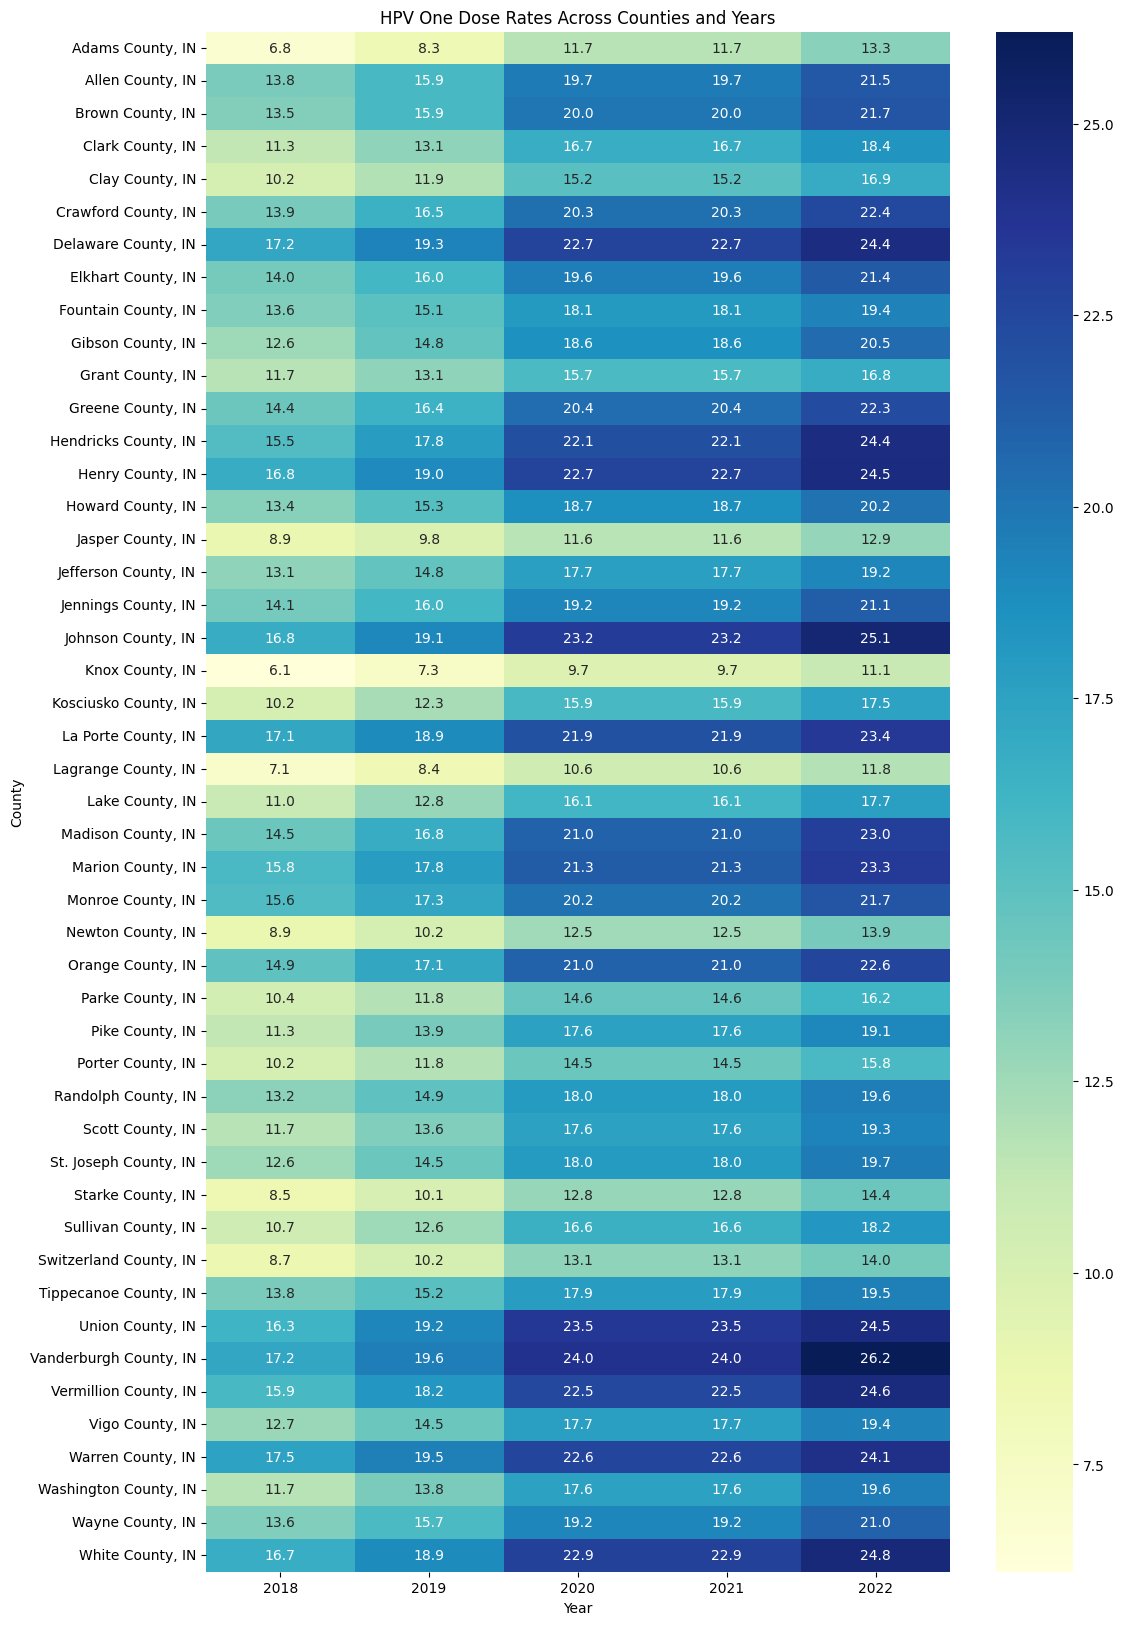

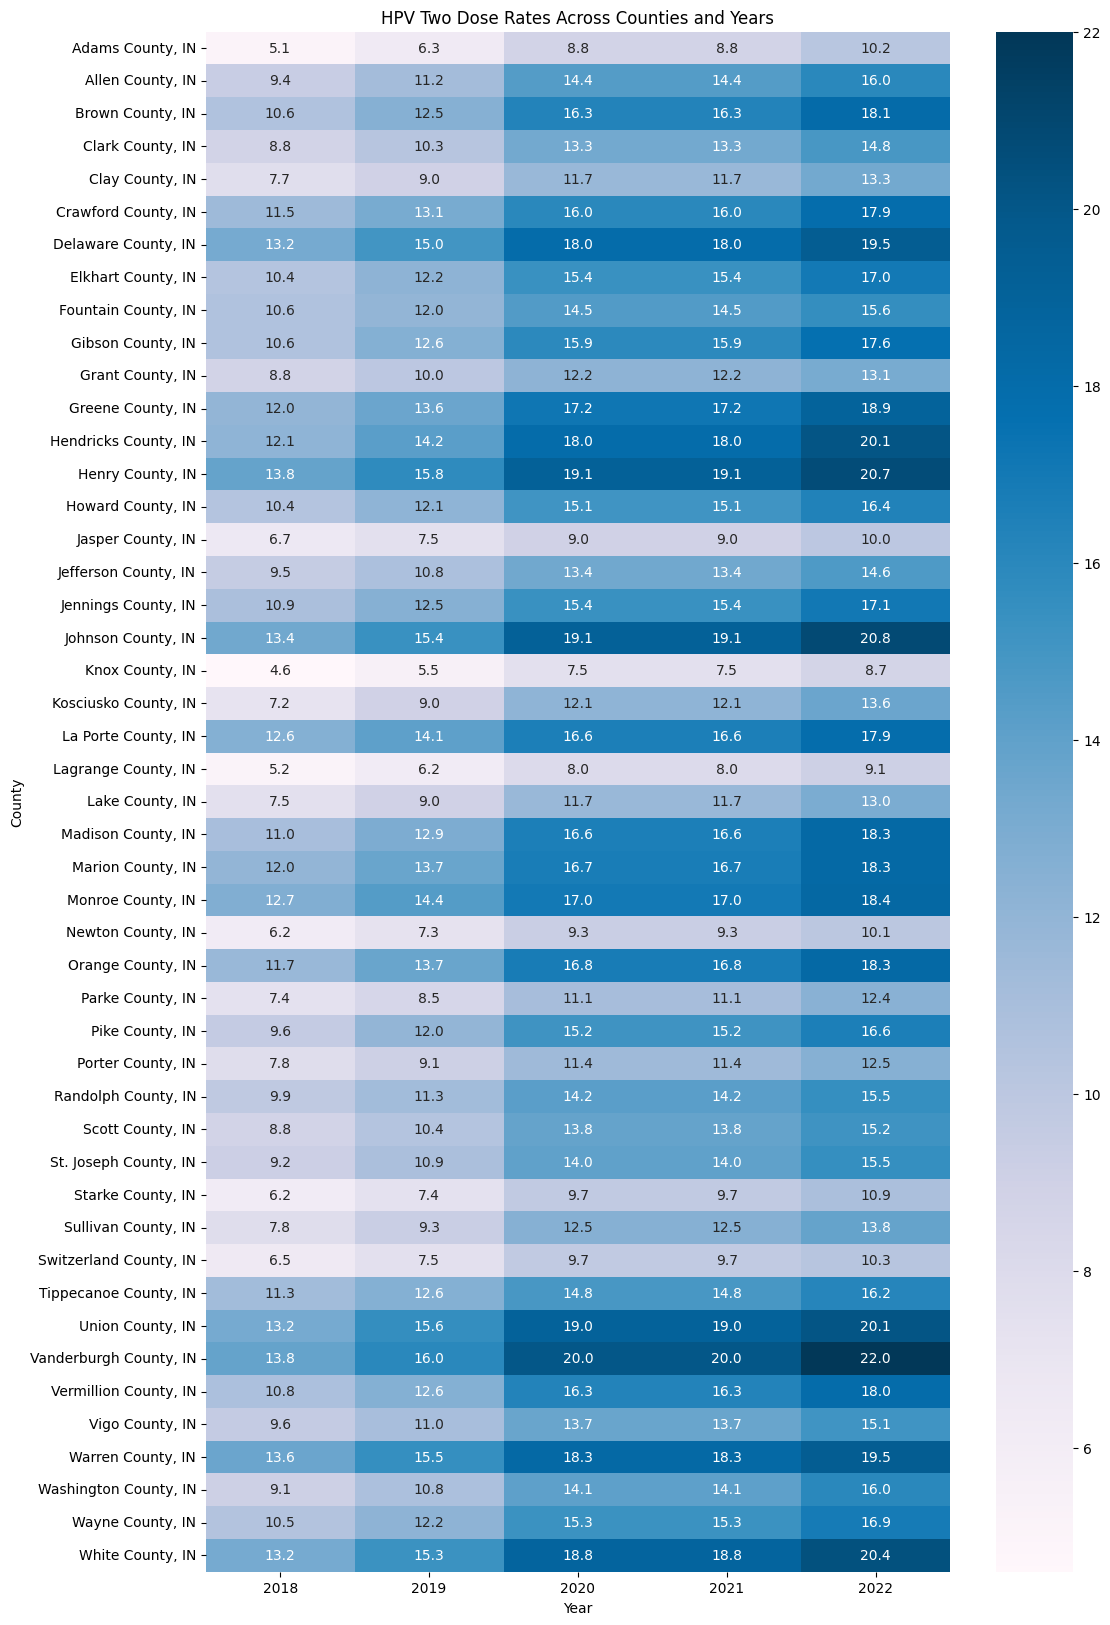

In [104]:
# For HPV One Dose Rate
heatmap_data_one = HPV_vaccination_by_county_and_year.pivot_table(
    values='HPV One Dose Rate',
    index='County Name',
    columns='Year'
)

plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data_one, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('HPV One Dose Rates Across Counties and Years')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()

# For HPV Two Dose Rate
heatmap_data_two = HPV_vaccination_by_county_and_year.pivot_table(
    values='HPV Two Dose Rate',
    index='County Name',
    columns='Year'
)

plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data_two, annot=True, fmt=".1f", cmap='PuBu')
plt.title('HPV Two Dose Rates Across Counties and Years')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()


In [105]:
# Create pivot tables
pivot_one = HPV_vaccination_by_county_and_year.pivot_table(
    values='HPV One Dose Rate',
    index='County Name',
    columns='Year'
)

pivot_two = HPV_vaccination_by_county_and_year.pivot_table(
    values='HPV Two Dose Rate',
    index='County Name',
    columns='Year'
)

# Calculate change from 2018 to 2022
pivot_one['Change_2018_2022'] = pivot_one[2022] - pivot_one[2018]
pivot_two['Change_2018_2022'] = pivot_two[2022] - pivot_two[2018]

# Sort and display top 10 counties for HPV One Dose Rate
largest_increase_one = pivot_one.sort_values('Change_2018_2022', ascending=False)
print("Top 10 Counties with Largest Increase in HPV One Dose Rate from 2018 to 2022:")
print(largest_increase_one['Change_2018_2022'].head(10))

# Sort and display top 10 counties for HPV Two Dose Rate
largest_increase_two = pivot_two.sort_values('Change_2018_2022', ascending=False)
print("\nTop 10 Counties with Largest Increase in HPV Two Dose Rate from 2018 to 2022:")
print(largest_increase_two['Change_2018_2022'].head(10))


Top 10 Counties with Largest Increase in HPV One Dose Rate from 2018 to 2022:
County Name
Vanderburgh County, IN    9.0
Hendricks County, IN      8.9
Vermillion County, IN     8.7
Madison County, IN        8.5
Crawford County, IN       8.5
Johnson County, IN        8.3
Brown County, IN          8.2
Union County, IN          8.2
White County, IN          8.1
Washington County, IN     7.9
Name: Change_2018_2022, dtype: float64

Top 10 Counties with Largest Increase in HPV Two Dose Rate from 2018 to 2022:
County Name
Vanderburgh County, IN    8.2
Hendricks County, IN      8.0
Brown County, IN          7.5
Johnson County, IN        7.4
Madison County, IN        7.3
White County, IN          7.2
Vermillion County, IN     7.2
Pike County, IN           7.0
Gibson County, IN         7.0
Union County, IN          6.9
Name: Change_2018_2022, dtype: float64


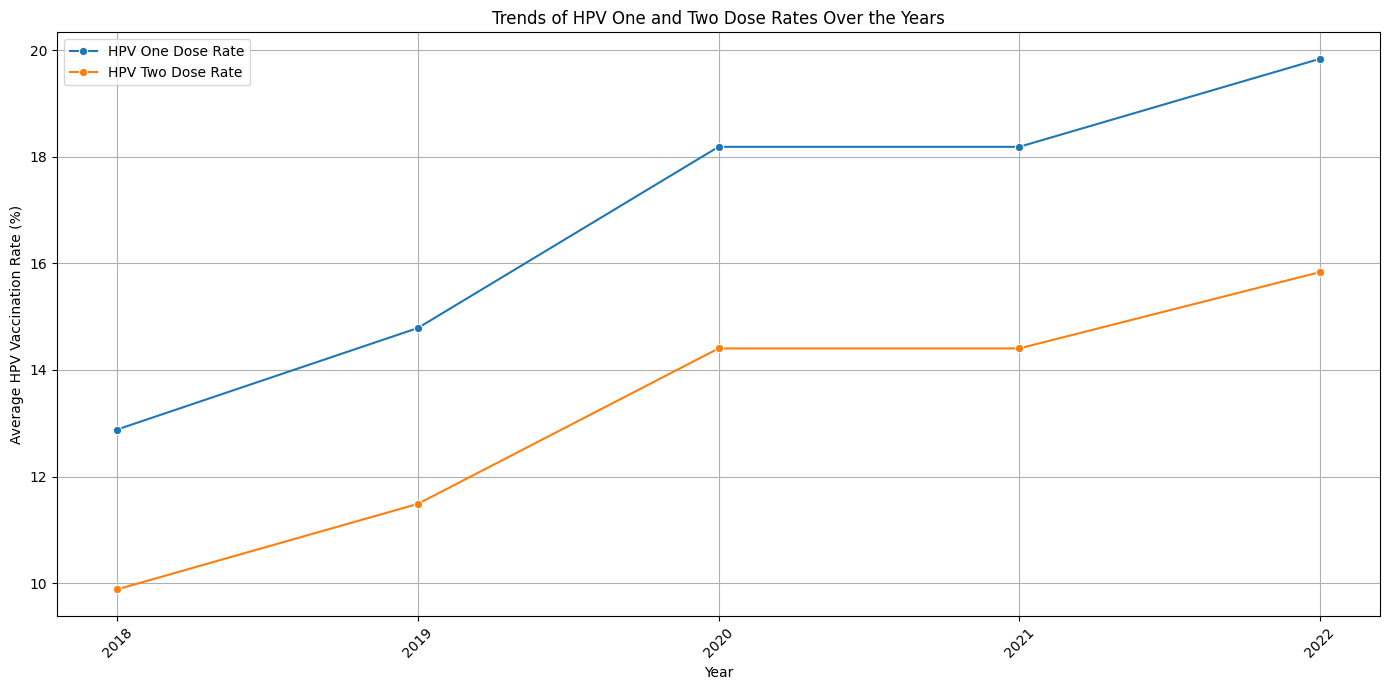

In [106]:
# Group the data by year and calculate the mean of HPV One Dose Rate and HPV Two Dose Rate
yearly_trends = HPV_vaccination_by_county_and_year.groupby('Year')[['HPV One Dose Rate', 'HPV Two Dose Rate']].mean().reset_index()

# Plot the trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_trends, x='Year', y='HPV One Dose Rate', marker='o', label='HPV One Dose Rate')
sns.lineplot(data=yearly_trends, x='Year', y='HPV Two Dose Rate', marker='o', label='HPV Two Dose Rate')

# Customize the plot
plt.title('Trends of HPV One and Two Dose Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Average HPV Vaccination Rate (%)')
plt.xticks(yearly_trends['Year'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

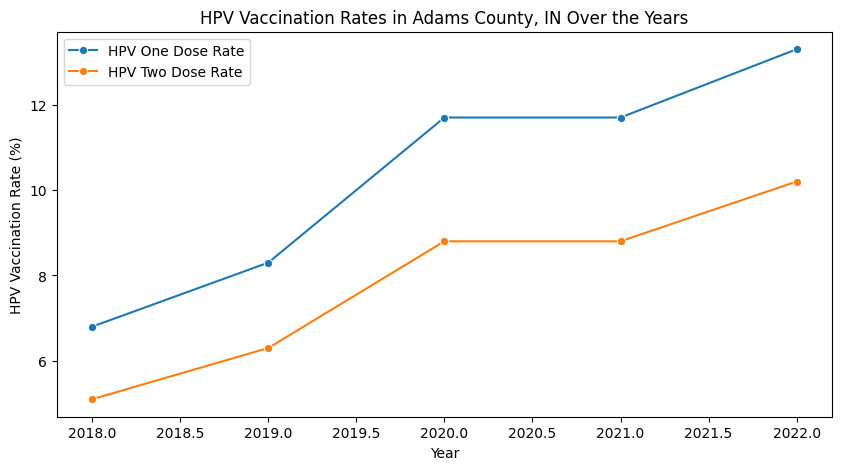

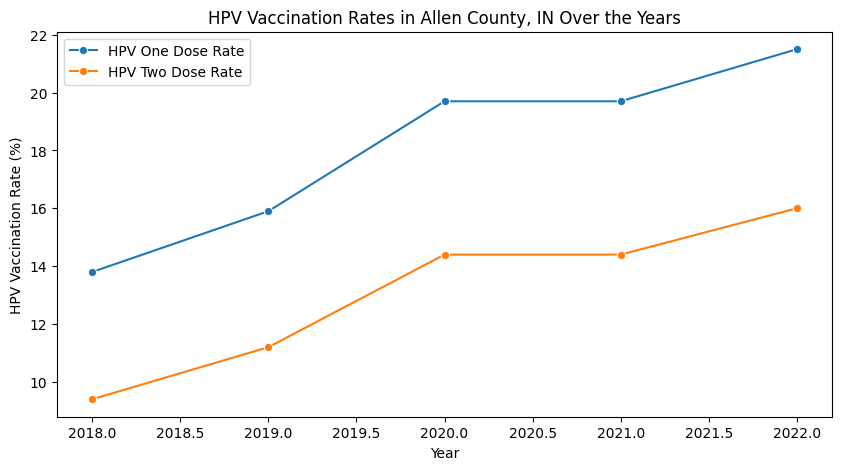

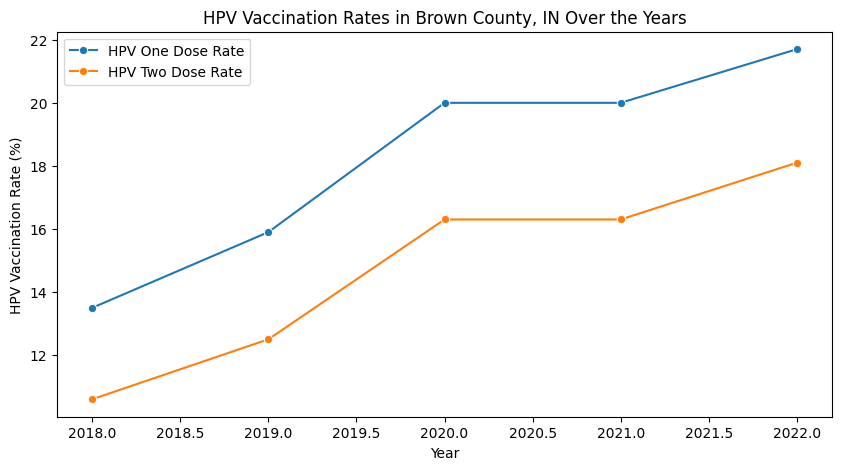

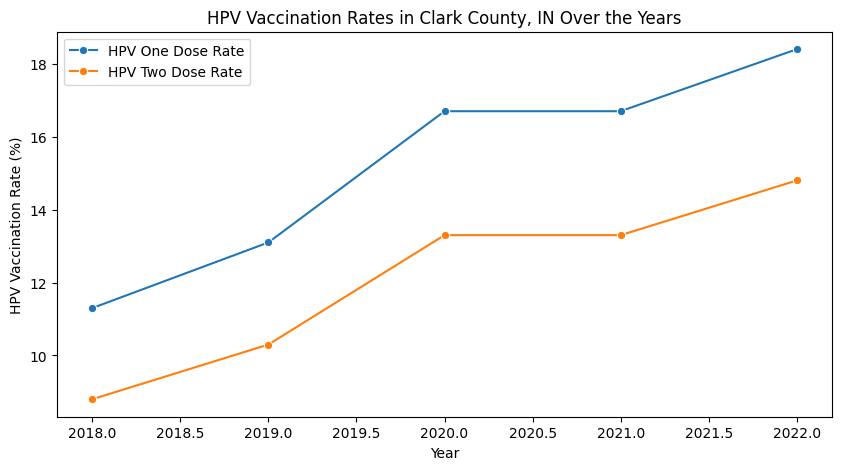

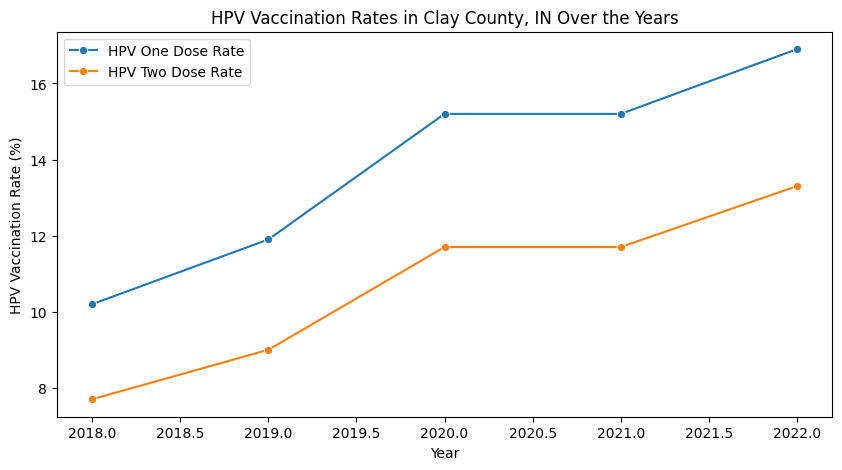

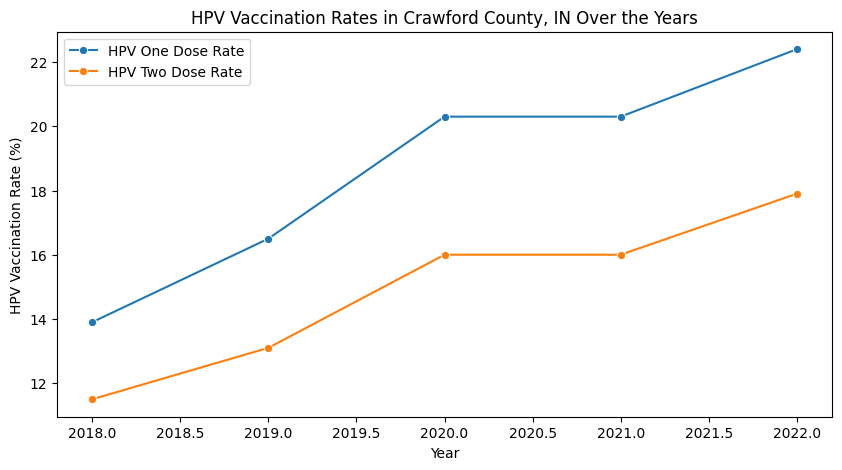

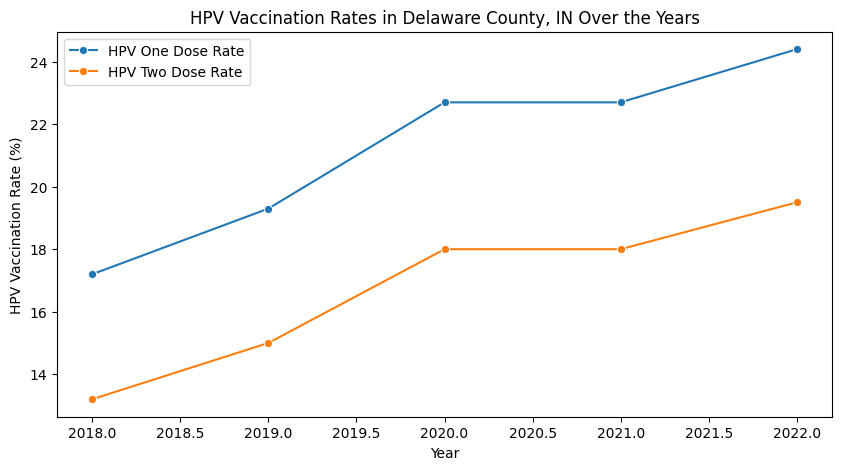

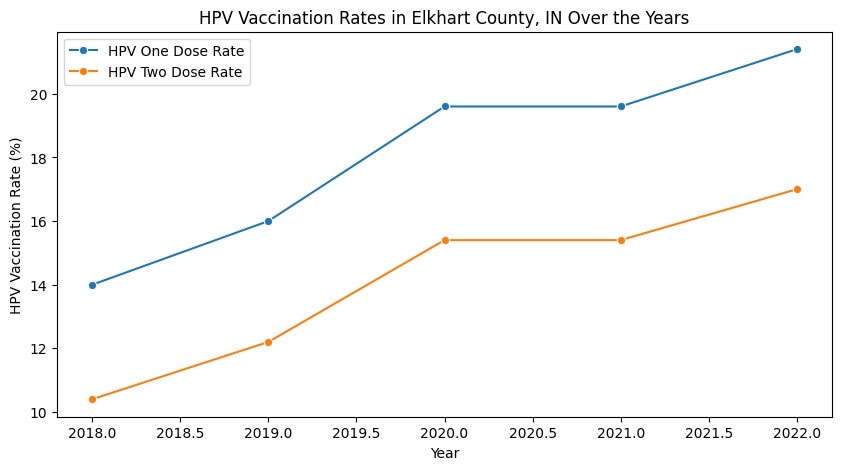

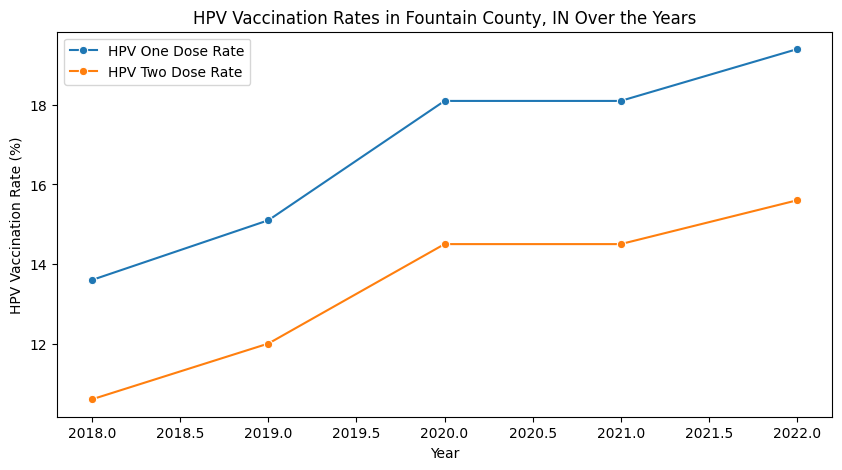

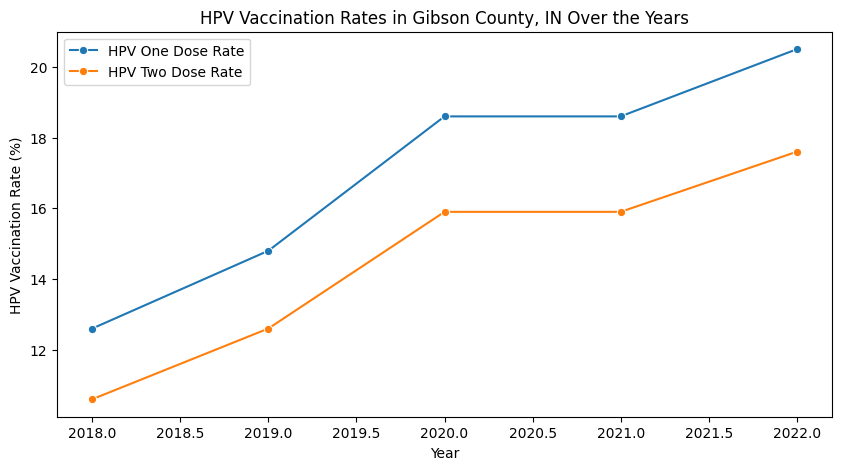

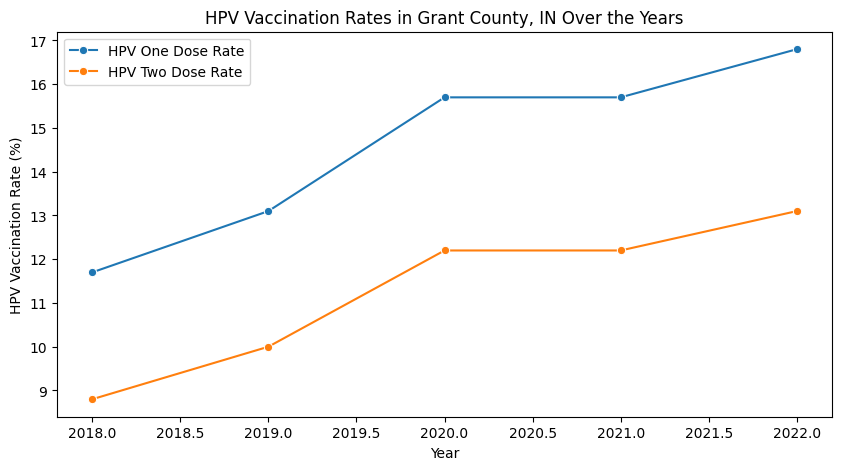

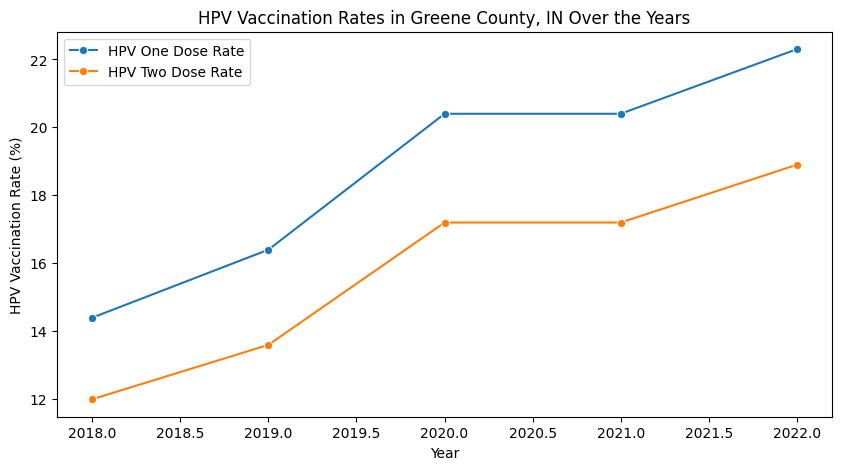

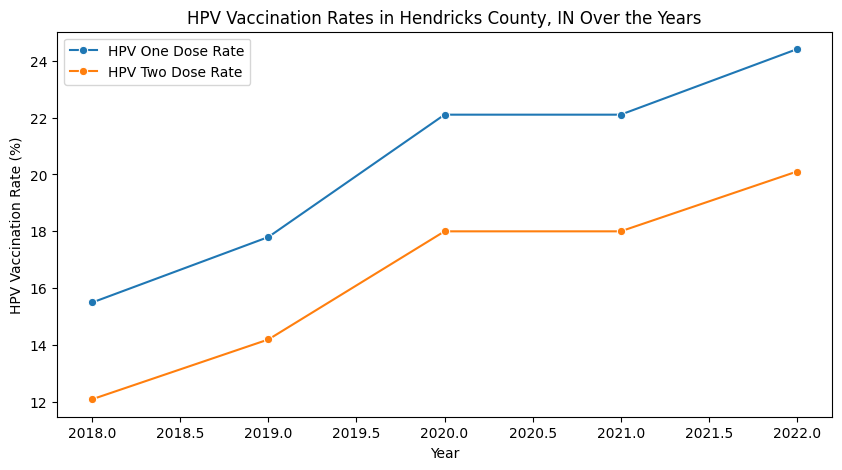

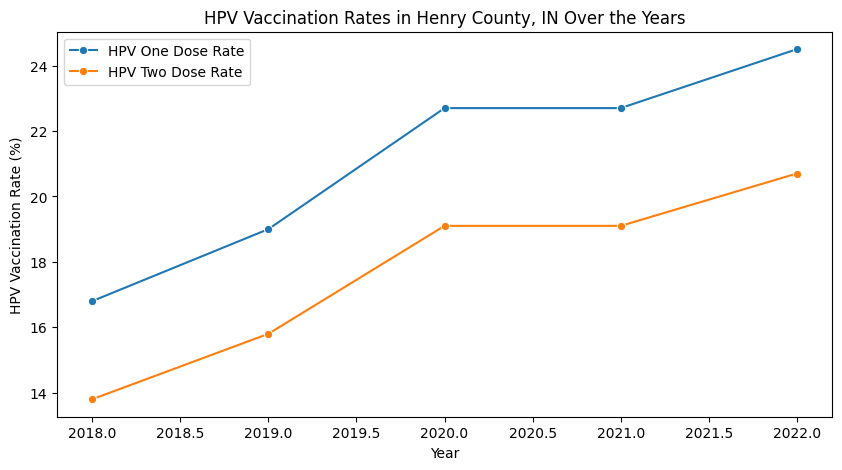

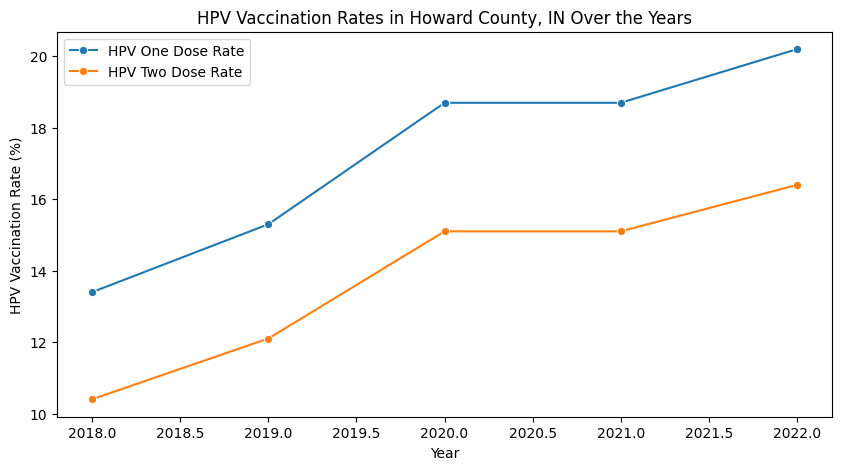

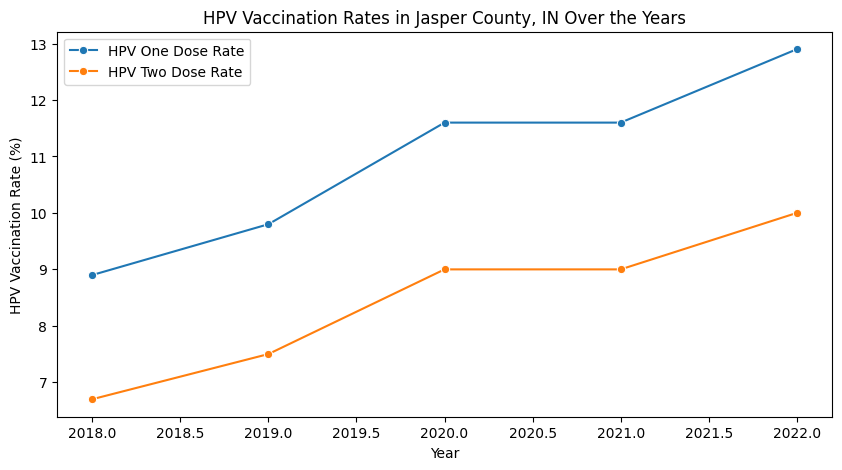

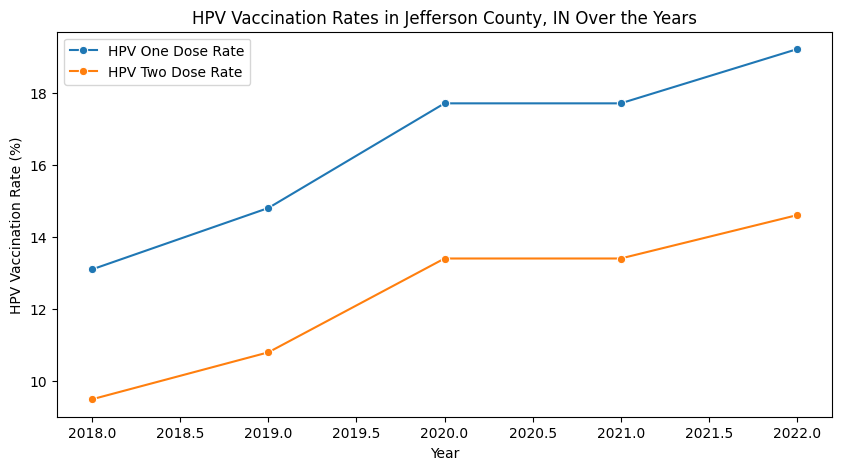

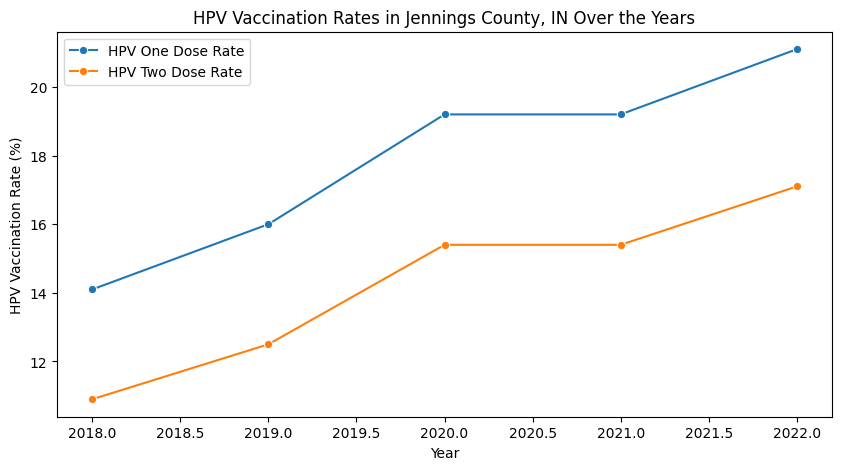

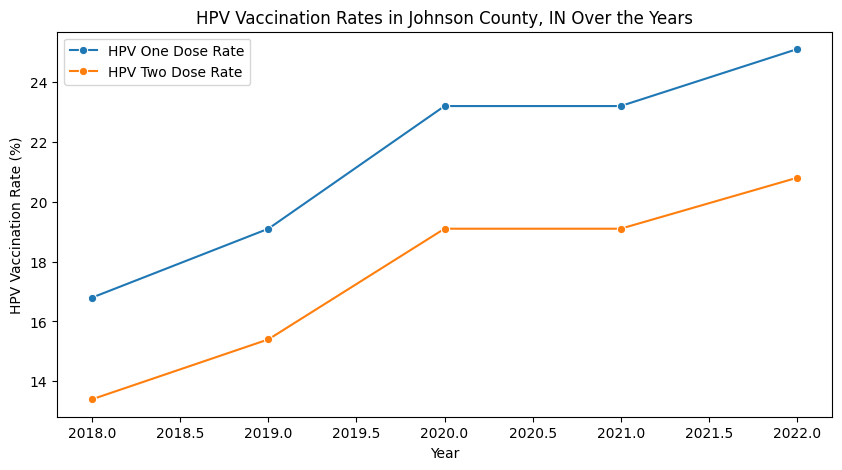

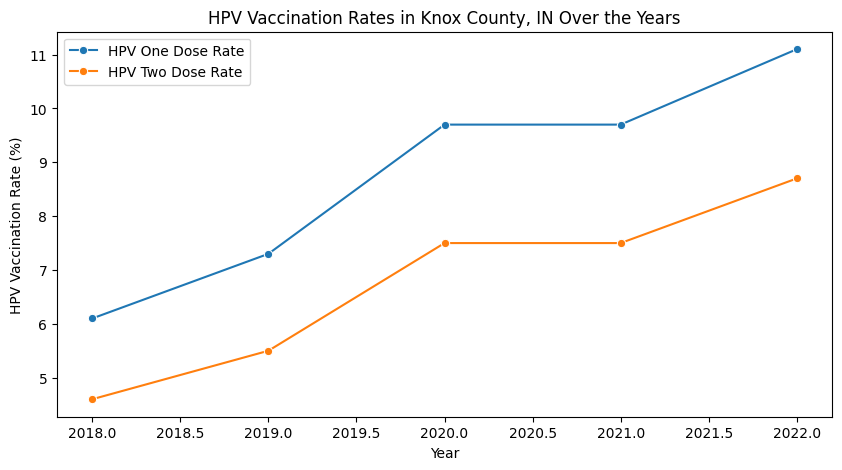

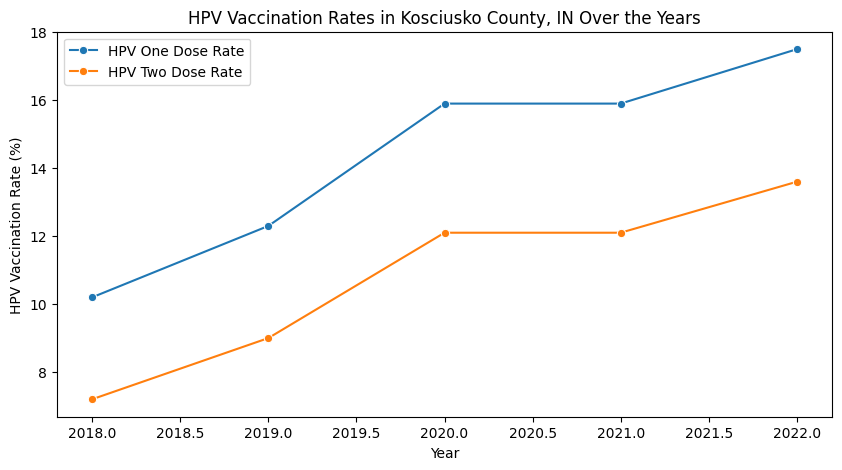

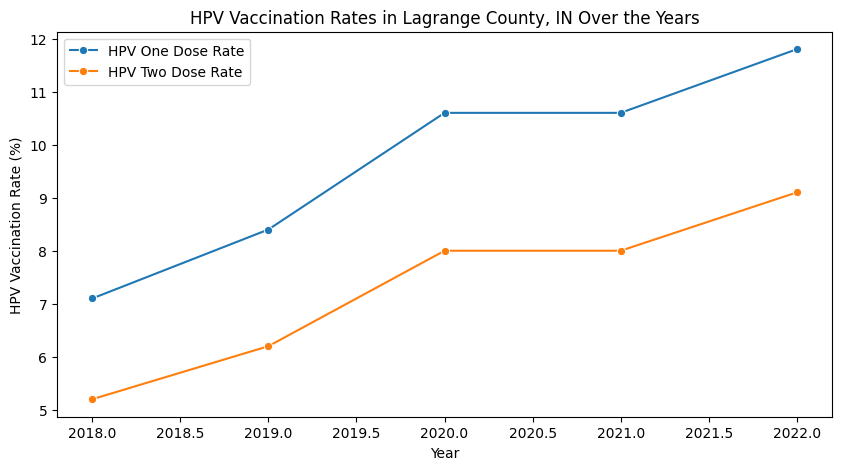

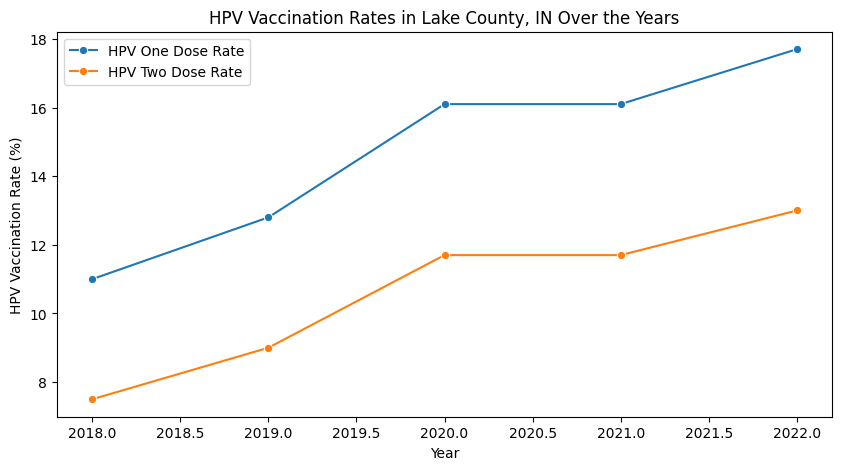

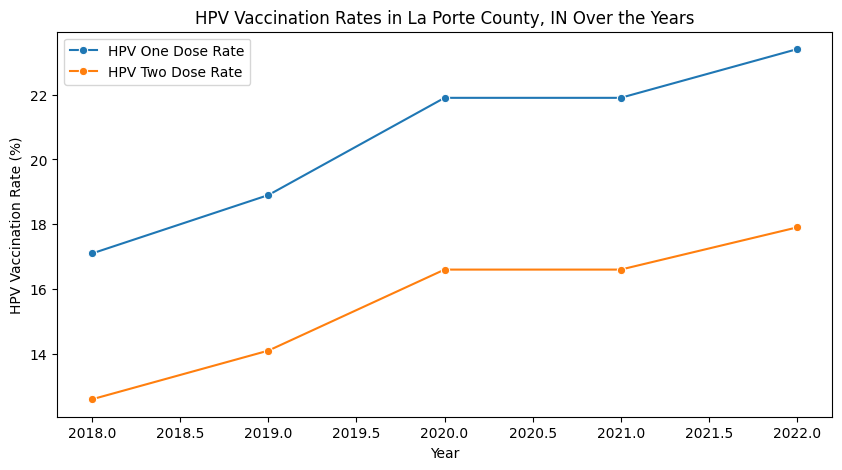

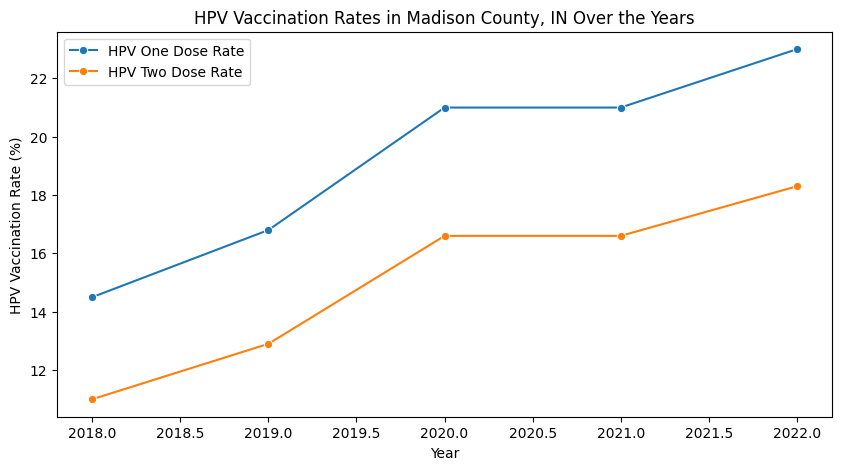

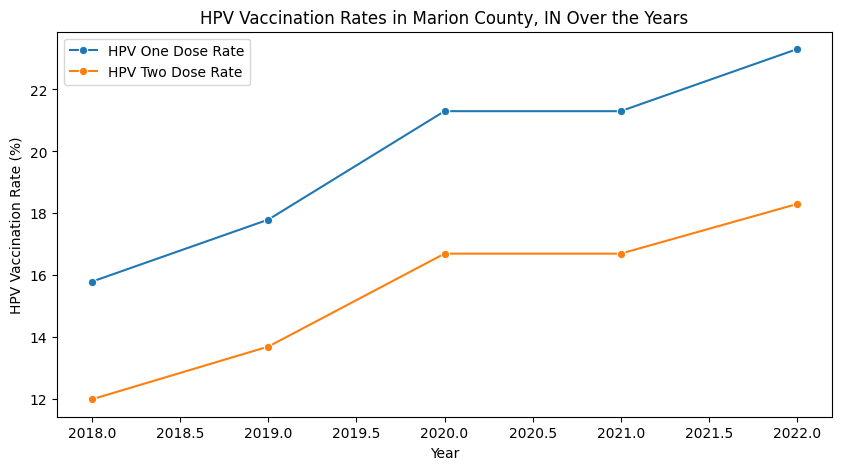

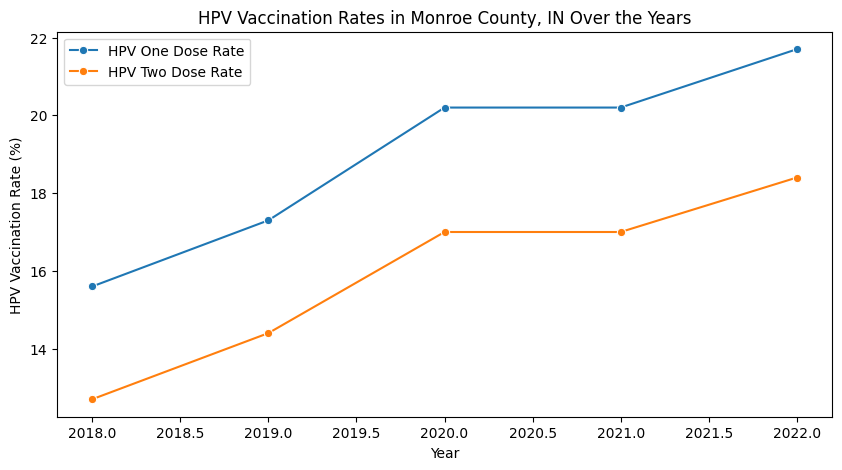

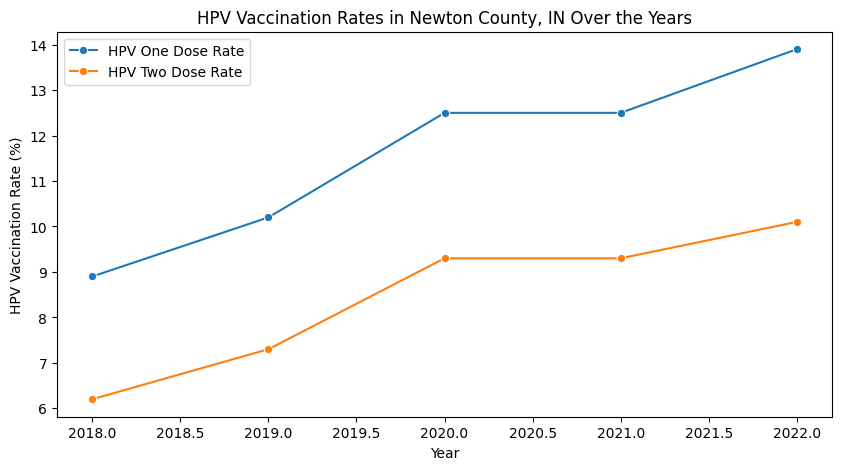

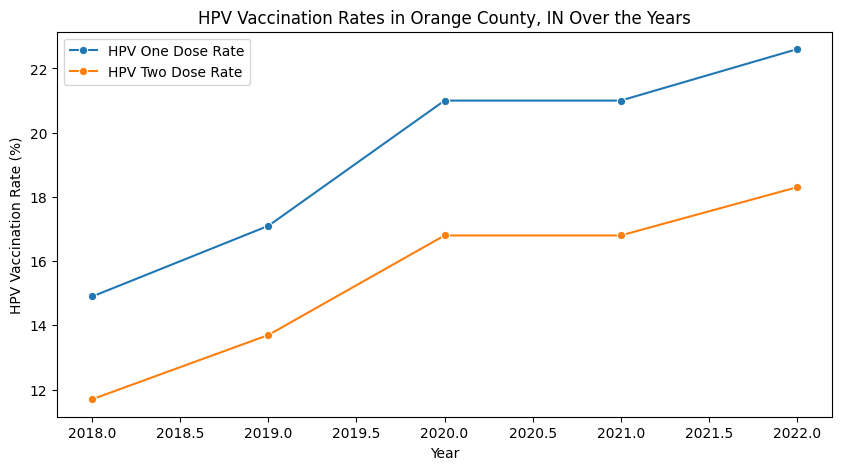

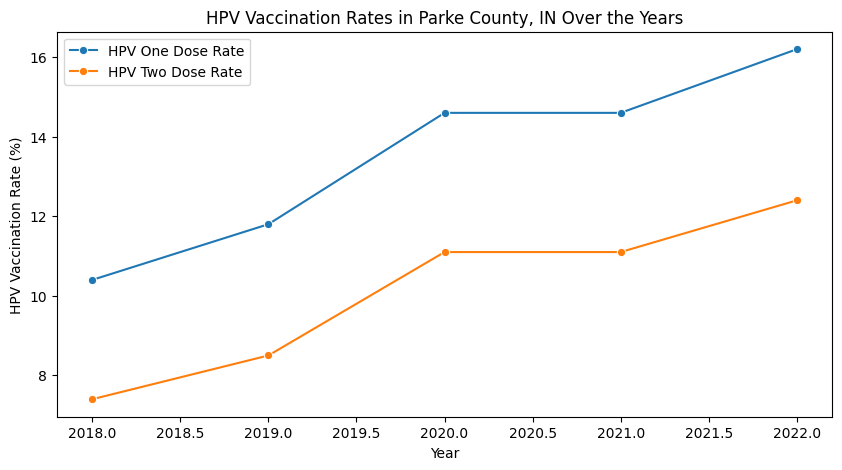

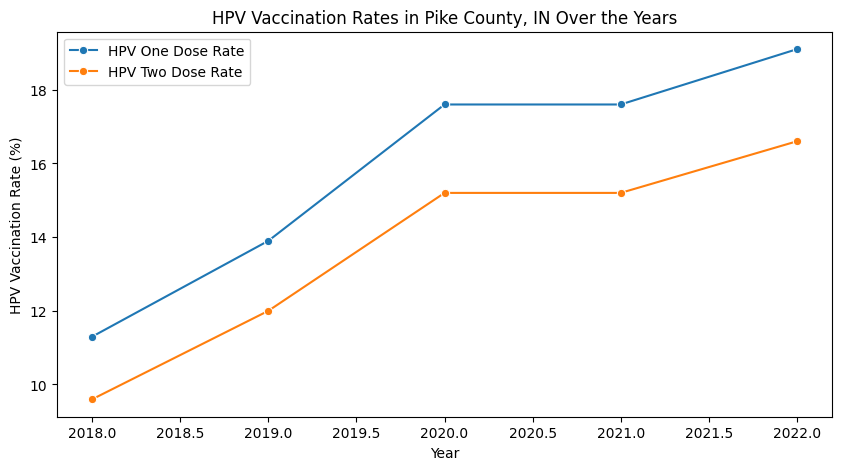

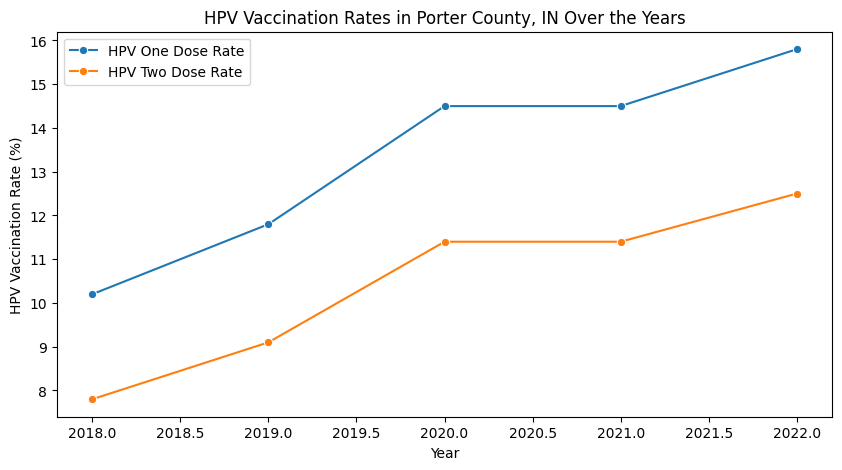

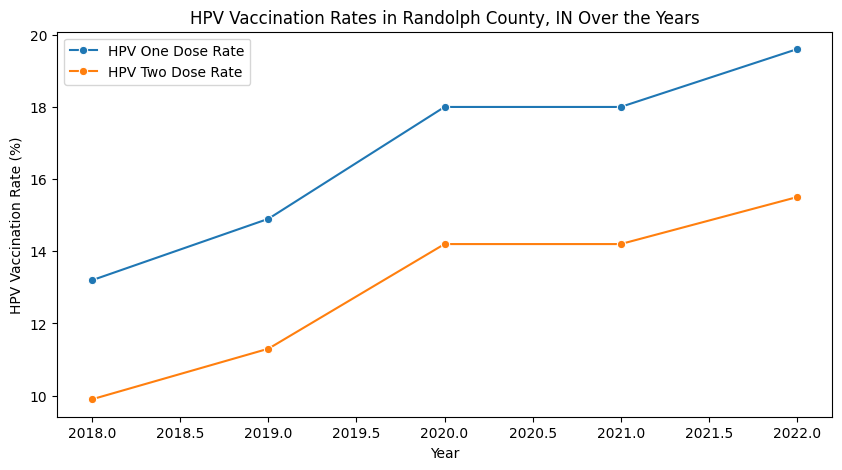

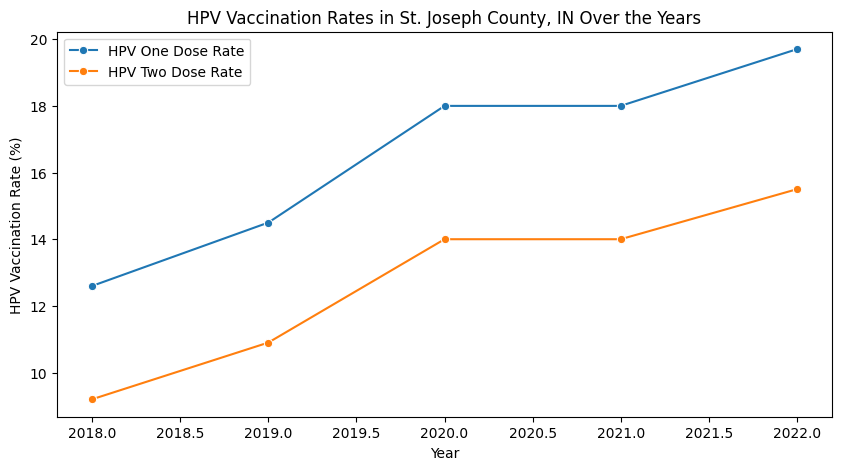

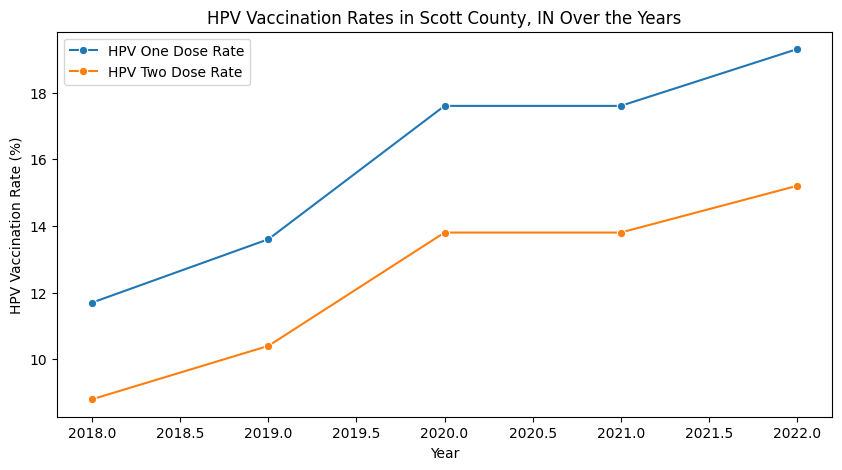

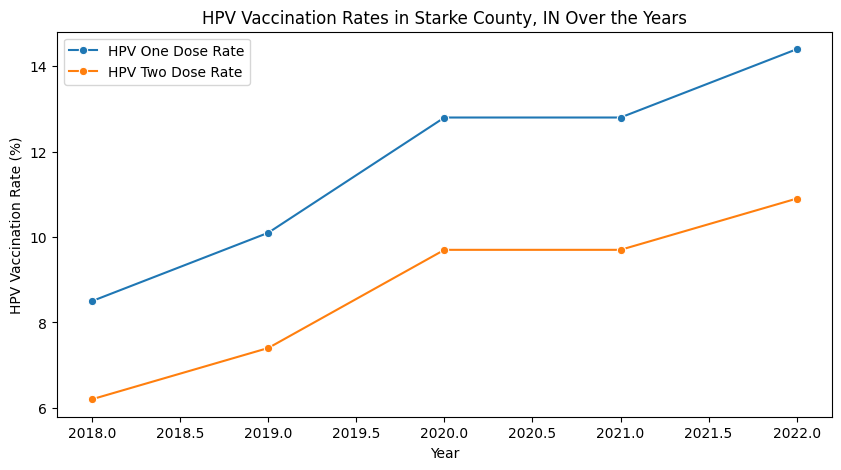

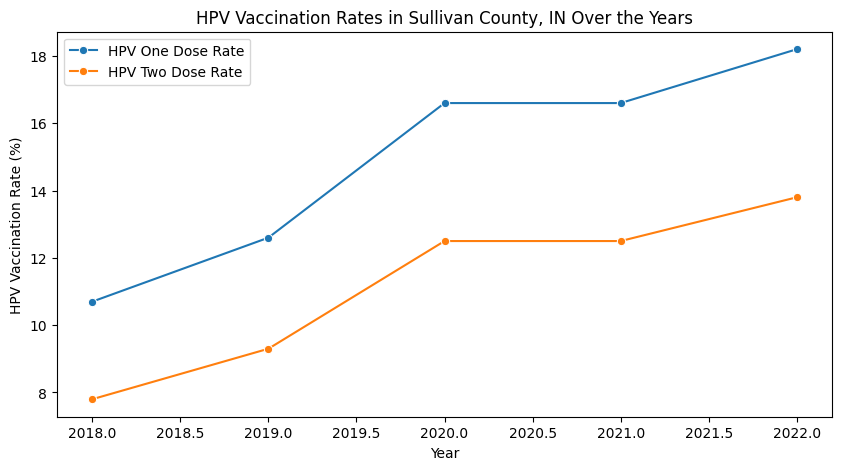

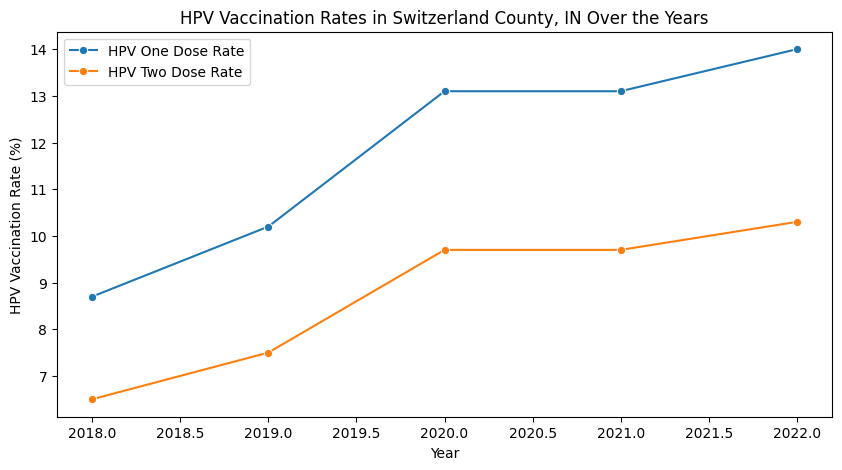

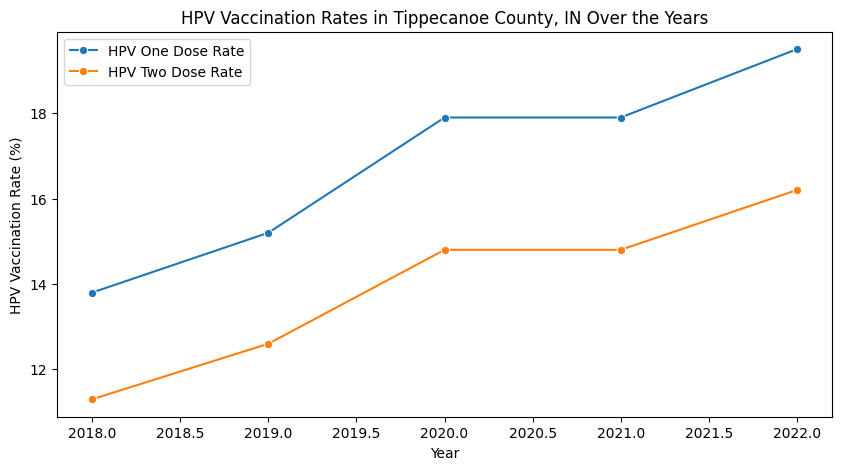

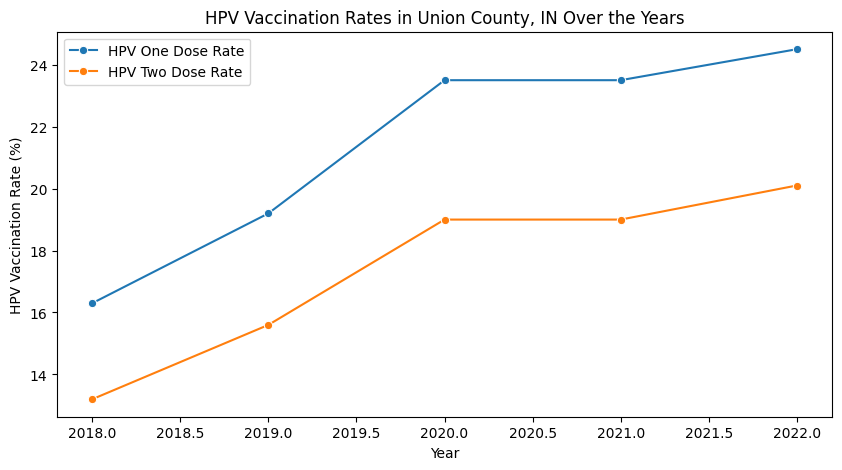

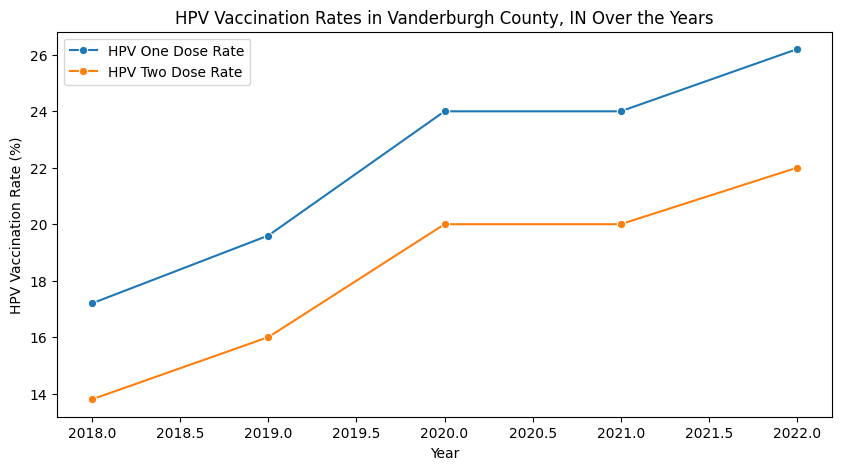

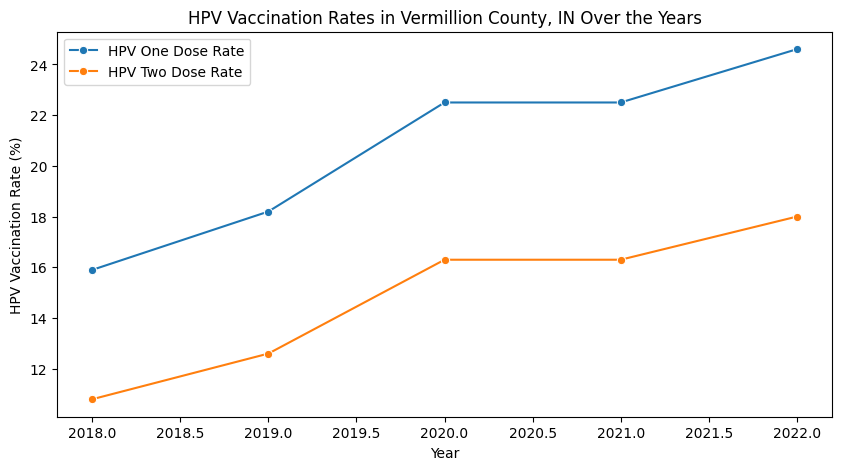

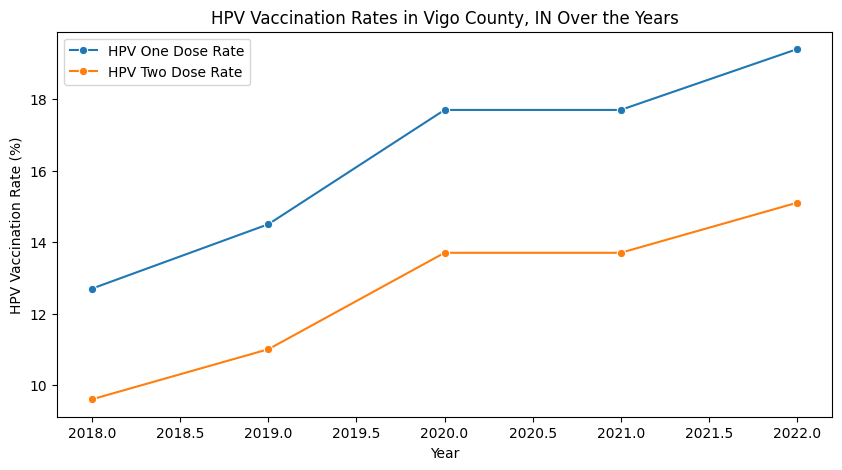

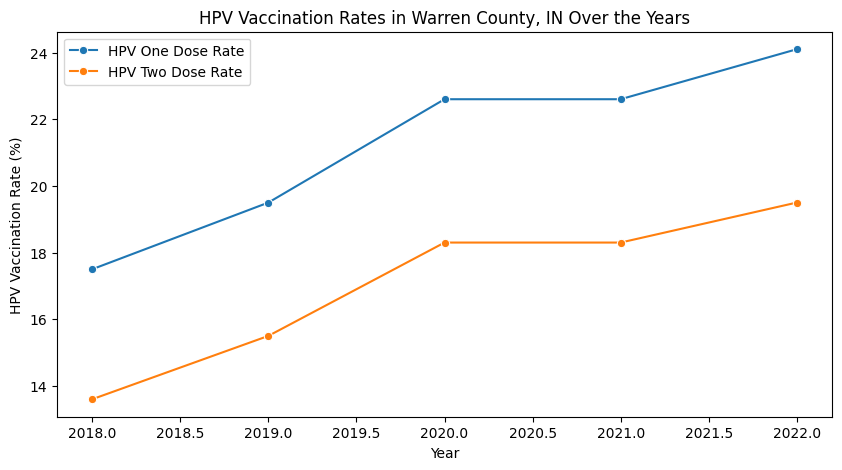

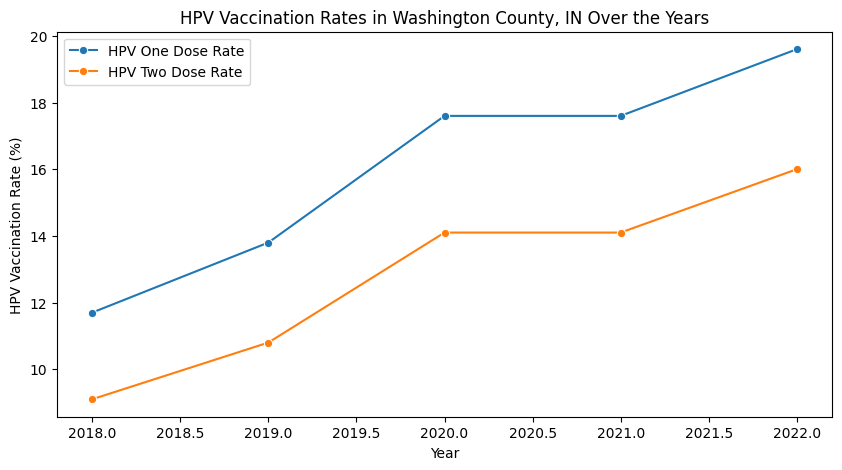

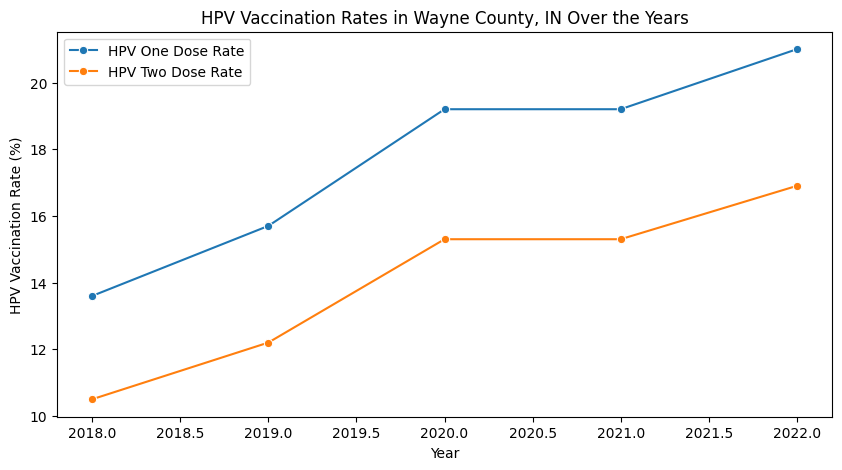

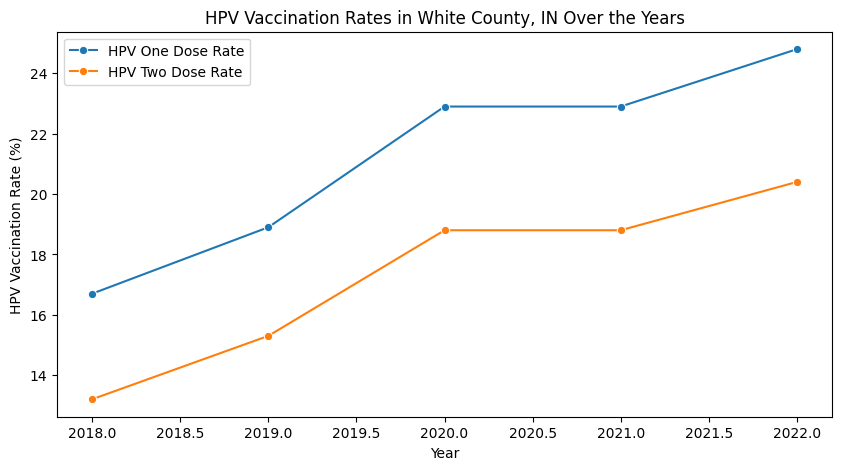

In [107]:
# Get a list of unique counties
counties = HPV_vaccination_by_county_and_year['County Name'].unique()

# Plot trends for each county
for county in counties:
    county_data = HPV_vaccination_by_county_and_year[HPV_vaccination_by_county_and_year['County Name'] == county]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=county_data, x='Year', y='HPV One Dose Rate', marker='o', label='HPV One Dose Rate')
    sns.lineplot(data=county_data, x='Year', y='HPV Two Dose Rate', marker='o', label='HPV Two Dose Rate')
    plt.title(f'HPV Vaccination Rates in {county} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('HPV Vaccination Rate (%)')
    plt.legend()
    plt.show()


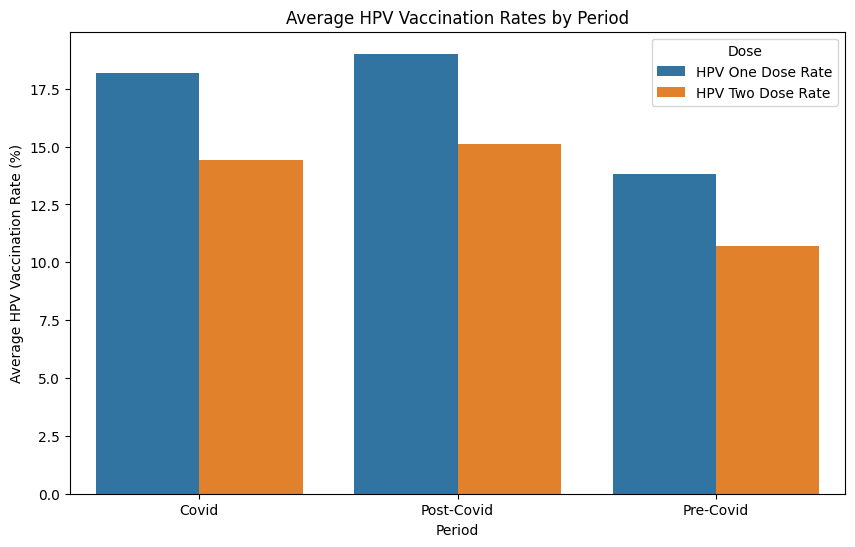

In [108]:
# Create a 'Period' column based on 'Year' if not already done
def get_period(year):
    if year in [2018, 2019]:
        return 'Pre-Covid'
    elif year == 2020:
        return 'Covid'
    elif year in [2021, 2022]:
        return 'Post-Covid'
    else:
        return 'Unknown'

HPV_vaccination_by_county_and_year['Period'] = HPV_vaccination_by_county_and_year['Year'].apply(get_period)

# Group data by Period and calculate mean vaccination rates
period_trends = HPV_vaccination_by_county_and_year.groupby('Period')[['HPV One Dose Rate', 'HPV Two Dose Rate']].mean().reset_index()

# Melt the DataFrame for plotting
period_trends_melted = period_trends.melt(id_vars='Period', var_name='Dose', value_name='Rate')

# Plot the trends
plt.figure(figsize=(10, 6))
sns.barplot(data=period_trends_melted, x='Period', y='Rate', hue='Dose')
plt.title('Average HPV Vaccination Rates by Period')
plt.ylabel('Average HPV Vaccination Rate (%)')
plt.legend(title='Dose')
plt.show()


**Pre-COVID Period:**

Both the HPV one-dose and two-dose rates were lower in the pre-COVID period compared to the COVID and post-COVID periods. This suggests a baseline level of vaccination before the pandemic disruptions.

**COVID Period:**

During COVID, there was an increase in both one-dose and two-dose rates, with the one-dose rate showing a notable rise. This could be due to heightened public health efforts or awareness around vaccinations during the pandemic, even though HPV is unrelated to COVID-19.
However, this trend may also reflect an initial backlog being addressed as healthcare providers adapted to the situation.

**Post-COVID Period:**

Post-COVID, the HPV one-dose rate appears to remain relatively high, almost on par with the COVID period, while the two-dose rate is still higher than the pre-COVID period but lower than during COVID.
This might indicate a lasting impact of the pandemic on vaccination outreach or healthcare-seeking behavior, where more people are opting to complete at least one dose.

**Possible Impact of COVID:**

The rise in vaccination rates during COVID and their sustained levels post-COVID may indicate that the pandemic indirectly promoted vaccine awareness and adherence to health recommendations. Alternatively, it could reflect healthcare providers' adaptations, like increased outreach or catch-up programs for routine vaccinations disrupted during early pandemic restrictions.

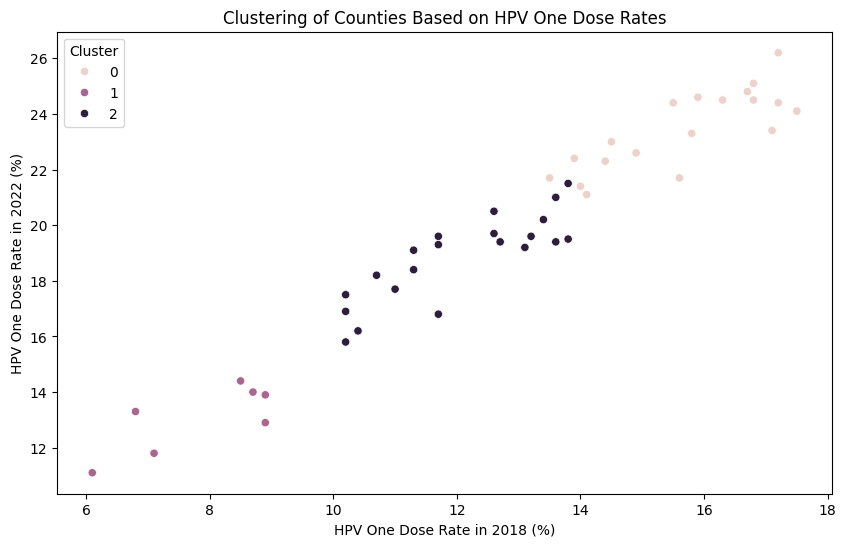

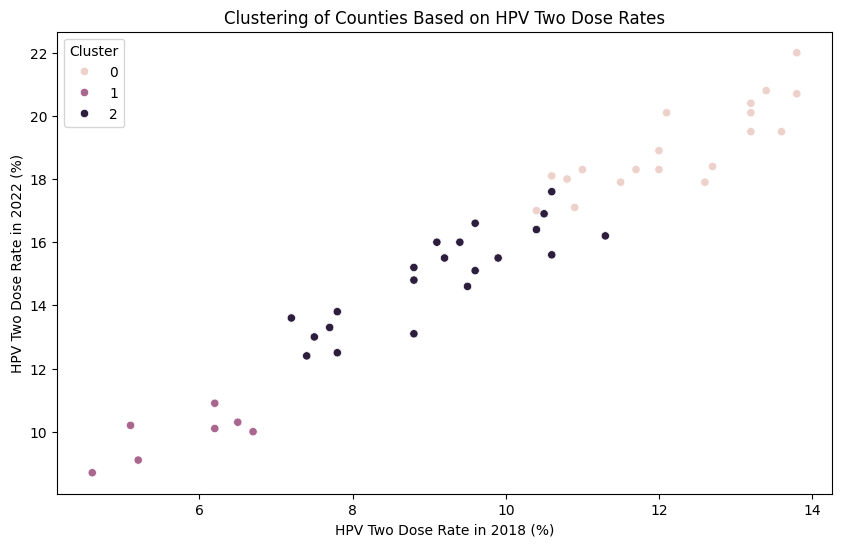

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
cluster_data = HPV_vaccination_by_county_and_year.pivot_table(
    values=['HPV One Dose Rate', 'HPV Two Dose Rate'],
    index='County Name',
    columns='Year'
).fillna(0)

# Flatten MultiIndex columns
cluster_data.columns = [f'{dose}_{year}' for dose, year in cluster_data.columns]

# Standardize data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels
cluster_data['Cluster'] = cluster_labels

# Plot clusters for HPV One Dose Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_data['HPV One Dose Rate_2018'], y=cluster_data['HPV One Dose Rate_2022'], hue='Cluster', data=cluster_data)
plt.title('Clustering of Counties Based on HPV One Dose Rates')
plt.xlabel('HPV One Dose Rate in 2018 (%)')
plt.ylabel('HPV One Dose Rate in 2022 (%)')
plt.legend(title='Cluster')
plt.show()

# Plot clusters for HPV Two Dose Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_data['HPV Two Dose Rate_2018'], y=cluster_data['HPV Two Dose Rate_2022'], hue='Cluster', data=cluster_data)
plt.title('Clustering of Counties Based on HPV Two Dose Rates')
plt.xlabel('HPV Two Dose Rate in 2018 (%)')
plt.ylabel('HPV Two Dose Rate in 2022 (%)')
plt.legend(title='Cluster')
plt.show()

**Cluster Characteristics:**

The clustering identifies counties based on similar trends in their HPV one-dose and two-dose rates from 2018 to 2022. Counties in each cluster likely share similar vaccination patterns over time.

Cluster 0 (Light Color):

Counties in this cluster generally had higher initial HPV vaccination rates in 2018 and maintained or slightly increased these rates by 2022. This could represent areas with stronger public health initiatives or better access to healthcare facilities that support consistent vaccination efforts.

Cluster 1 (Medium Color):

This cluster shows counties with moderate HPV vaccination rates in 2018 and gradual improvement by 2022. These counties may have faced moderate barriers to vaccination initially but could have benefited from public health efforts or increased awareness over time.

Cluster 2 (Dark Color):

Counties in this cluster had the lowest vaccination rates in 2018, with limited improvement by 2022. These counties may represent areas with persistent barriers to vaccination, such as being located in DPSAs, limited healthcare access, or lower community awareness of HPV vaccination.

**Comparing One-Dose and Two-Dose Rates:**

Both clusters for the one-dose and two-dose rates follow a similar trend, suggesting that counties with higher initial one-dose rates tend to have higher two-dose rates as well. This could indicate that once individuals start the vaccination process, they are likely to complete it, or it may reflect public health efforts targeting both doses.
Potential Influence of COVID:



In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data specifically for clustering on 'HPV One Dose Rate' and 'HPV Two Dose Rate' for 2018 and 2022
# Pivot the table to have each county's rates for these years
cluster_data = HPV_vaccination_by_county_and_year.pivot_table(
    values=['HPV One Dose Rate', 'HPV Two Dose Rate'],
    index='County Name',
    columns='Year'
).fillna(0)

# Flatten the MultiIndex columns created by pivot
cluster_data.columns = [f'{dose}_{year}' for dose, year in cluster_data.columns]

# Standardize data for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels back to the data
cluster_data['Cluster'] = cluster_labels

# Separate counties into lists by cluster
counties_in_cluster_0 = cluster_data[cluster_data['Cluster'] == 0].index.tolist()
counties_in_cluster_1 = cluster_data[cluster_data['Cluster'] == 1].index.tolist()
counties_in_cluster_2 = cluster_data[cluster_data['Cluster'] == 2].index.tolist()

counties_in_cluster_0, counties_in_cluster_1, counties_in_cluster_2


(['Brown County, IN',
  'Crawford County, IN',
  'Delaware County, IN',
  'Elkhart County, IN',
  'Greene County, IN',
  'Hendricks County, IN',
  'Henry County, IN',
  'Jennings County, IN',
  'Johnson County, IN',
  'La Porte County, IN',
  'Madison County, IN',
  'Marion County, IN',
  'Monroe County, IN',
  'Orange County, IN',
  'Union County, IN',
  'Vanderburgh County, IN',
  'Vermillion County, IN',
  'Warren County, IN',
  'White County, IN'],
 ['Adams County, IN',
  'Jasper County, IN',
  'Knox County, IN',
  'Lagrange County, IN',
  'Newton County, IN',
  'Starke County, IN',
  'Switzerland County, IN'],
 ['Allen County, IN',
  'Clark County, IN',
  'Clay County, IN',
  'Fountain County, IN',
  'Gibson County, IN',
  'Grant County, IN',
  'Howard County, IN',
  'Jefferson County, IN',
  'Kosciusko County, IN',
  'Lake County, IN',
  'Parke County, IN',
  'Pike County, IN',
  'Porter County, IN',
  'Randolph County, IN',
  'Scott County, IN',
  'St. Joseph County, IN',
  'Sul

In [111]:
# Re-import necessary libraries and data to ensure all elements are available
import geopandas as gpd
import requests
from zipfile import ZipFile
from io import BytesIO
import os



In [112]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Polygon
import numpy as np

def create_cluster_map(data_file):
    """
    Create a clustering visualization for Indiana HPV vaccination rates
    """
    # Read and prepare data
    hpv_data = pd.read_csv(data_file)

    # Prepare data for clustering
    cluster_data = hpv_data.pivot_table(
        values=['HPV One Dose Rate', 'HPV Two Dose Rate'],
        index='County Name',
        columns='Year'
    ).fillna(0)

    # Flatten columns
    cluster_data.columns = [f'{dose}_{year}' for dose, year in cluster_data.columns]

    # Perform clustering
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_data)

    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(cluster_data_scaled)

    # Add cluster labels
    cluster_data['Cluster'] = cluster_labels
    cluster_data.reset_index(inplace=True)

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

    # Plot 1: Scatter Plot
    scatter = ax1.scatter(
        cluster_data['HPV One Dose Rate_2018'],
        cluster_data['HPV One Dose Rate_2022'],
        c=cluster_data['Cluster'],
        cmap='viridis',
        s=100
    )

    # Add county labels to scatter plot
    for idx, row in cluster_data.iterrows():
        ax1.annotate(
            row['County Name'].replace(' County, IN', ''),
            (row['HPV One Dose Rate_2018'], row['HPV One Dose Rate_2022']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8
        )

    ax1.set_xlabel('HPV One Dose Rate 2018 (%)')
    ax1.set_ylabel('HPV One Dose Rate 2022 (%)')
    ax1.set_title('HPV Vaccination Rate Changes (2018-2022)')
    ax1.legend(*scatter.legend_elements(), title='Clusters')

    # Plot 2: Cluster Statistics
    cluster_stats = pd.DataFrame()
    for cluster in range(3):
        mask = cluster_data['Cluster'] == cluster
        cluster_stats.loc[f'Cluster {cluster}', 'Count'] = mask.sum()
        cluster_stats.loc[f'Cluster {cluster}', 'Avg 2018 Rate'] = cluster_data[mask]['HPV One Dose Rate_2018'].mean()
        cluster_stats.loc[f'Cluster {cluster}', 'Avg 2022 Rate'] = cluster_data[mask]['HPV One Dose Rate_2022'].mean()
        cluster_stats.loc[f'Cluster {cluster}', 'Rate Change'] = (
            cluster_stats.loc[f'Cluster {cluster}', 'Avg 2022 Rate'] -
            cluster_stats.loc[f'Cluster {cluster}', 'Avg 2018 Rate']
        )

    # Create cluster summary table
    ax2.axis('off')
    table = ax2.table(
        cellText=cluster_stats.round(2).values,
        colLabels=cluster_stats.columns,
        rowLabels=cluster_stats.index,
        cellLoc='center',
        loc='center',
        bbox=[0.1, 0.2, 0.8, 0.5]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)

    ax2.set_title('Cluster Statistics', pad=20)

    # Print cluster memberships
    print("\nCluster Memberships:")
    for cluster in range(3):
        counties = cluster_data[cluster_data['Cluster'] == cluster]['County Name'].tolist()
        print(f"\nCluster {cluster} ({len(counties)} counties):")
        print(", ".join(counties))

    plt.tight_layout()
    return fig, cluster_data, cluster_stats

# Example usage:
# fig, results, stats = create_cluster_map('HPV_vaccination_by_county_and_year.csv')
# plt.show()


Cluster Memberships:

Cluster 0 (19 counties):
Brown County, IN, Crawford County, IN, Delaware County, IN, Elkhart County, IN, Greene County, IN, Hendricks County, IN, Henry County, IN, Jennings County, IN, Johnson County, IN, La Porte County, IN, Madison County, IN, Marion County, IN, Monroe County, IN, Orange County, IN, Union County, IN, Vanderburgh County, IN, Vermillion County, IN, Warren County, IN, White County, IN

Cluster 1 (7 counties):
Adams County, IN, Jasper County, IN, Knox County, IN, Lagrange County, IN, Newton County, IN, Starke County, IN, Switzerland County, IN

Cluster 2 (21 counties):
Allen County, IN, Clark County, IN, Clay County, IN, Fountain County, IN, Gibson County, IN, Grant County, IN, Howard County, IN, Jefferson County, IN, Kosciusko County, IN, Lake County, IN, Parke County, IN, Pike County, IN, Porter County, IN, Randolph County, IN, Scott County, IN, St. Joseph County, IN, Sullivan County, IN, Tippecanoe County, IN, Vigo County, IN, Washington County,

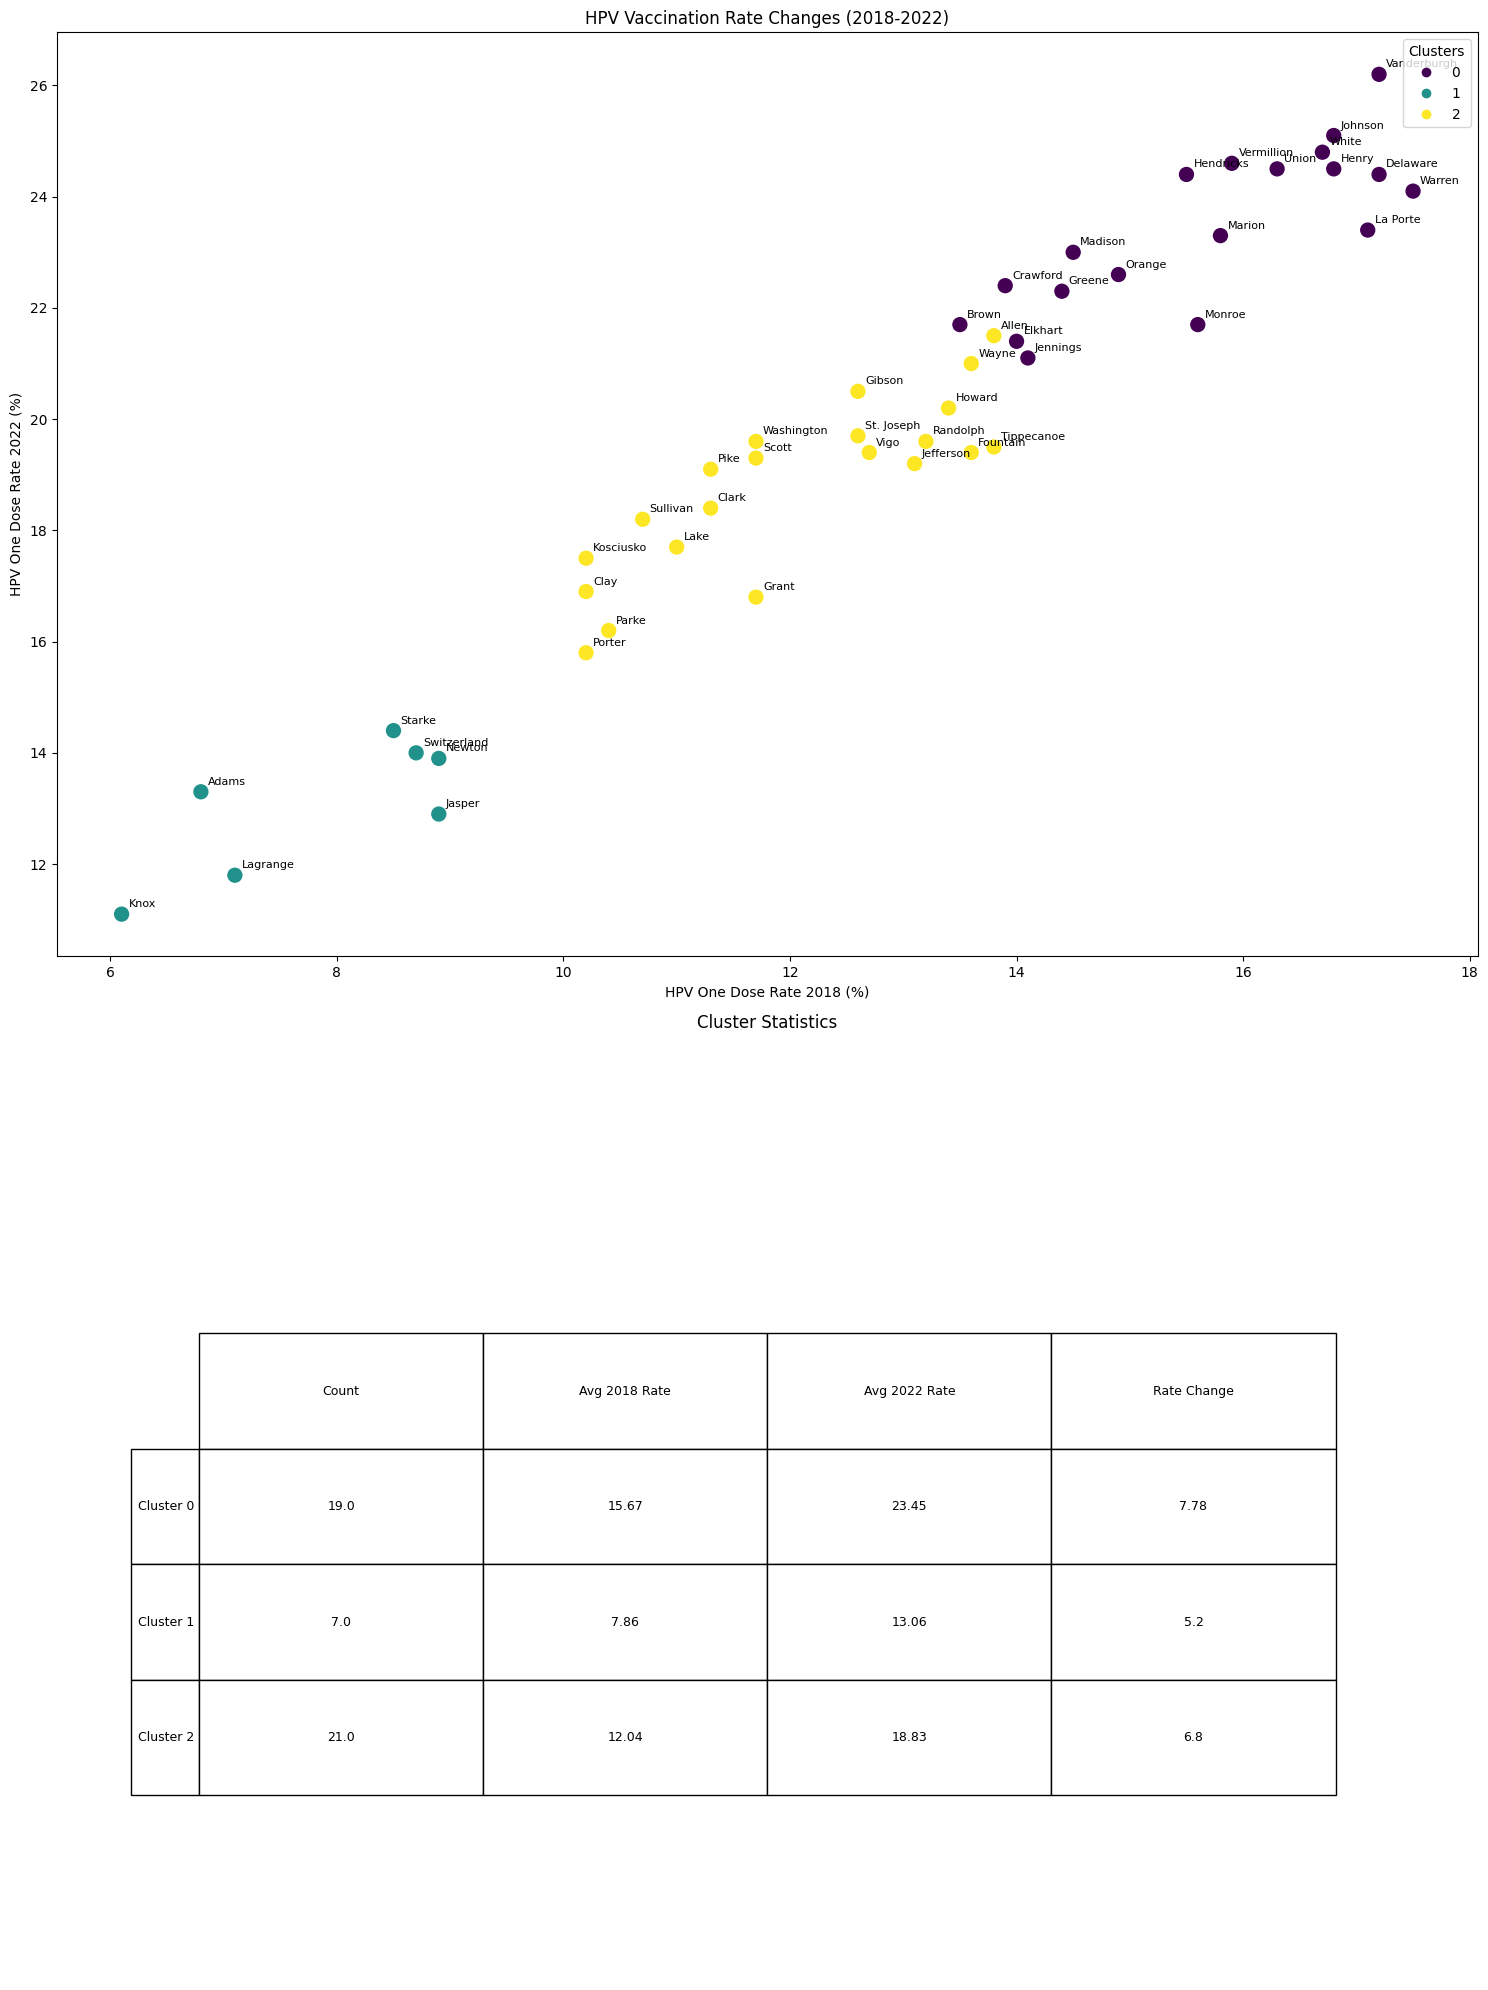


Detailed Cluster Statistics:
           Count  Avg 2018 Rate  Avg 2022 Rate  Rate Change
Cluster 0   19.0          15.67          23.45         7.78
Cluster 1    7.0           7.86          13.06         5.20
Cluster 2   21.0          12.04          18.83         6.80


In [113]:
# Create the visualization
fig, results, stats = create_cluster_map('HPV_vaccination_by_county_and_year.csv')

# Show the plot
plt.show()

# Display detailed statistics
print("\nDetailed Cluster Statistics:")
print(stats.round(2))

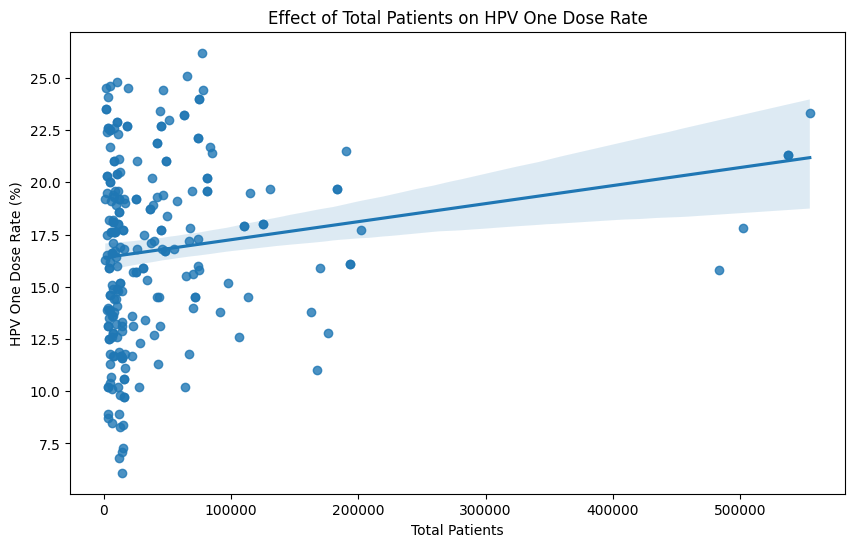

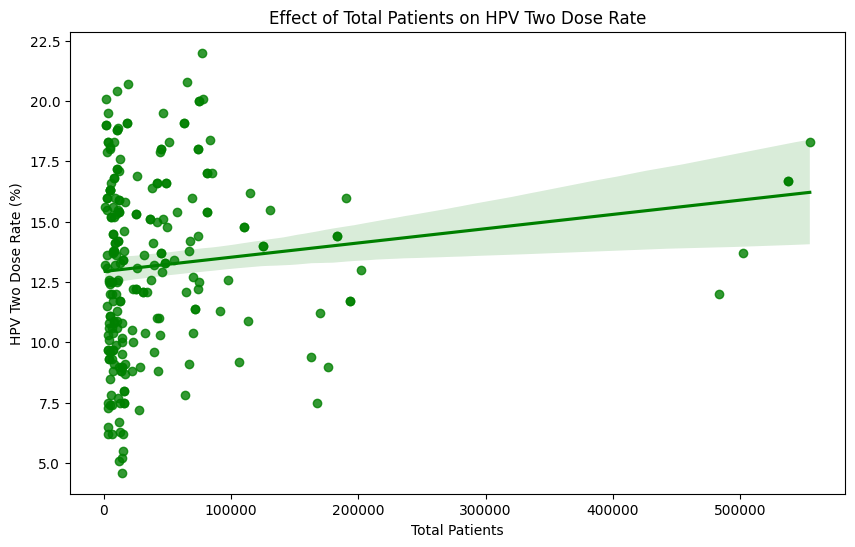

In [114]:
# For HPV One Dose Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Patients', y='HPV One Dose Rate', data=HPV_vaccination_by_county_and_year)
plt.title('Effect of Total Patients on HPV One Dose Rate')
plt.xlabel('Total Patients')
plt.ylabel('HPV One Dose Rate (%)')
plt.show()

# For HPV Two Dose Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Patients', y='HPV Two Dose Rate', data=HPV_vaccination_by_county_and_year, color='green')
plt.title('Effect of Total Patients on HPV Two Dose Rate')
plt.xlabel('Total Patients')
plt.ylabel('HPV Two Dose Rate (%)')
plt.show()


These scatter plots with trend lines illustrate the relationship between the total number of patients in a county and the HPV vaccination rates (one-dose and two-dose) across counties.

**Observations:**

**Positive Correlation:**

There is a slight positive correlation between the total number of patients and HPV vaccination rates (both one-dose and two-dose). This suggests that counties with a larger patient population tend to have slightly higher HPV vaccination rates on average.
However, the correlation is not strong, as there is significant variability in vaccination rates even at lower patient counts. This variability could be due to other factors affecting vaccination rates, such as access to healthcare facilities, public health initiatives, or community awareness.

**Implications of Patient Population:**

The weak positive trend might indicate that counties with higher populations can better support vaccination campaigns or outreach programs due to a greater concentration of healthcare resources. Alternatively, a larger population might reflect more urbanized areas where vaccination access and awareness are generally higher.

Counties with smaller populations tend to have a wide range of vaccination rates, which could reflect inconsistent healthcare access or varying levels of public health intervention.

**Comparison between One-Dose and Two-Dose Rates:**

The trend appears to be more pronounced for the HPV one-dose rate compared to the two-dose rate, which may indicate that while larger populations support initial vaccinations, completing the two-dose schedule might still face barriers, such as follow-up accessibility.

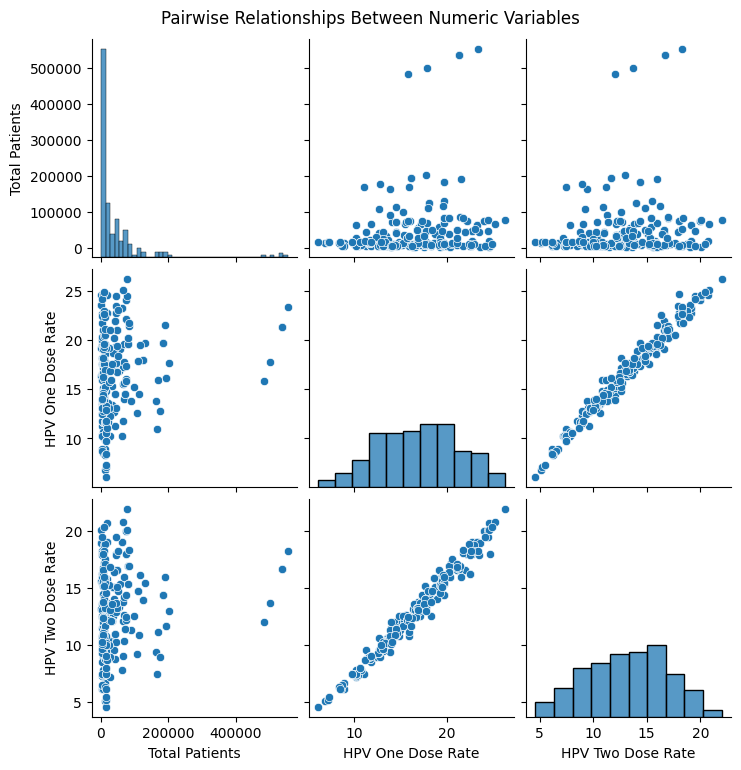

In [115]:
# Select relevant numeric columns
numeric_cols = ['Total Patients', 'HPV One Dose Rate', 'HPV Two Dose Rate']

# Pair plot
sns.pairplot(HPV_vaccination_by_county_and_year[numeric_cols])
plt.suptitle('Pairwise Relationships Between Numeric Variables', y=1.02)
plt.show()


**Diagonals (Histograms):**

Each diagonal plot represents the distribution of a single variable.
The histograms for Total Patients show a skewed distribution, indicating that most counties have lower patient populations, with a few outliers having much larger populations.
The HPV One Dose Rate and HPV Two Dose Rate distributions are relatively more uniform, with vaccination rates mostly ranging between 10% and 20%.

**Total Patients vs. HPV One/Two Dose Rates:**

These scatter plots show a slight positive correlation between Total Patients and both HPV One Dose Rate and HPV Two Dose Rate. As the total patient count increases, there’s a tendency for HPV vaccination rates to be slightly higher. However, the correlation is weak, as there is significant spread in vaccination rates across all patient counts.

**HPV One Dose Rate vs. HPV Two Dose Rate:**

There’s a strong positive linear relationship between HPV One Dose Rate and HPV Two Dose Rate. Counties with a higher one-dose rate tend to also have a higher two-dose rate, suggesting that once a county initiates HPV vaccination, it likely supports individuals in completing the second dose as well.
This high correlation also indicates consistency in vaccination outreach or healthcare follow-up processes across counties.

**Summary Inferences:**

**Distribution and Outliers:** The skew in Total Patients distribution shows that most counties have smaller populations, with a few high-population counties as outliers. This could affect access to healthcare resources and vaccination outreach.

**Positive Correlation:** The positive relationship between One Dose and Two Dose Rates suggests effective follow-through once vaccinations begin. However, the weak relationship with Total Patients indicates that population size alone doesn't strongly determine vaccination rates, implying that other factors, such as healthcare accessibility and public health efforts, might play significant roles.

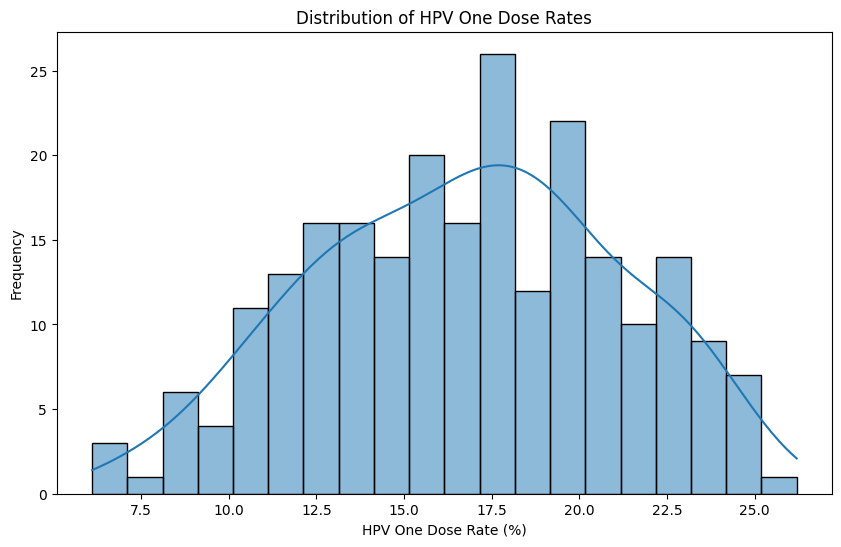

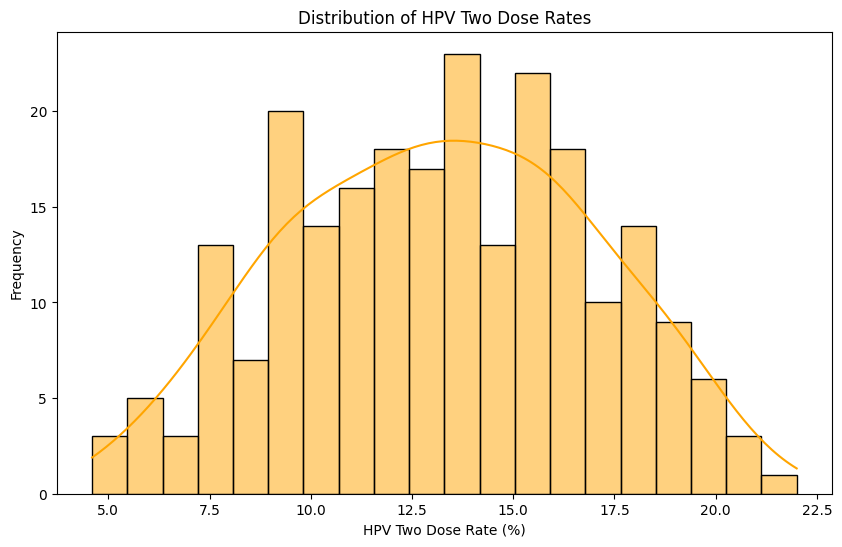

In [116]:
# Distribution of HPV One Dose Rate
plt.figure(figsize=(10, 6))
sns.histplot(HPV_vaccination_by_county_and_year['HPV One Dose Rate'], kde=True, bins=20)
plt.title('Distribution of HPV One Dose Rates')
plt.xlabel('HPV One Dose Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Distribution of HPV Two Dose Rate
plt.figure(figsize=(10, 6))
sns.histplot(HPV_vaccination_by_county_and_year['HPV Two Dose Rate'], kde=True, bins=20, color='orange')
plt.title('Distribution of HPV Two Dose Rates')
plt.xlabel('HPV Two Dose Rate (%)')
plt.ylabel('Frequency')
plt.show()


**Observations:**

**HPV One Dose Rate Distribution:**

The one-dose rate distribution has a peak around the 15% to 20% range, with fewer counties having very high or very low rates.

The distribution appears somewhat symmetric, suggesting a central tendency around the average, with a gradual tapering off toward higher and lower rates.
This pattern suggests that most counties achieve a moderate one-dose vaccination rate, with fewer achieving very high coverage.

**HPV Two Dose Rate Distribution:**

The two-dose rate distribution also peaks around the 12.5% to 17.5% range, but the spread is slightly narrower compared to the one-dose rate.
This narrower distribution could imply that two-dose coverage is generally lower than one-dose coverage, with fewer counties reaching the higher percentages seen in one-dose rates.

The distribution has a similar shape to the one-dose rate, indicating that counties that start the HPV vaccination process may achieve a comparable but slightly lower completion rate for the second dose.

**Inferences:**

**Moderate Coverage:** Both distributions show that the majority of counties have moderate HPV vaccination rates rather than very high or very low coverage. This might indicate some systemic challenges in achieving higher vaccination rates across counties.

**One Dose vs. Two Dose:** The slightly lower peak and narrower spread for the two-dose distribution suggest that not all individuals who receive the first dose go on to complete the second dose. This could reflect issues like follow-up accessibility or dropout in the vaccination series.

Unique values in status columns after mapping:
pre-covid: [0 1]
covid: [0 1]
post-covid: [1 0]

Number of counties in each group:
Status Group
Always Designated          27
Designated to Withdrawn    10
Withdrawn to Designated     6
Mixed Status                2
Always Withdrawn            2
Name: count, dtype: int64

Counties for status group 'Withdrawn to Designated':
         County Name Status Sequence
    Adams County, IN       (0, 0, 1)
Jefferson County, IN       (0, 0, 1)
 Jennings County, IN       (0, 0, 1)
Kosciusko County, IN       (0, 0, 1)
   Monroe County, IN       (0, 0, 1)
    Parke County, IN       (0, 0, 1)

Counties for status group 'Always Designated':
           County Name Status Sequence
      Allen County, IN       (1, 1, 1)
      Clark County, IN       (1, 1, 1)
   Delaware County, IN       (1, 1, 1)
    Elkhart County, IN       (1, 1, 1)
     Gibson County, IN       (1, 1, 1)
      Grant County, IN       (1, 1, 1)
     Greene County, IN       (1, 1, 1)
      He

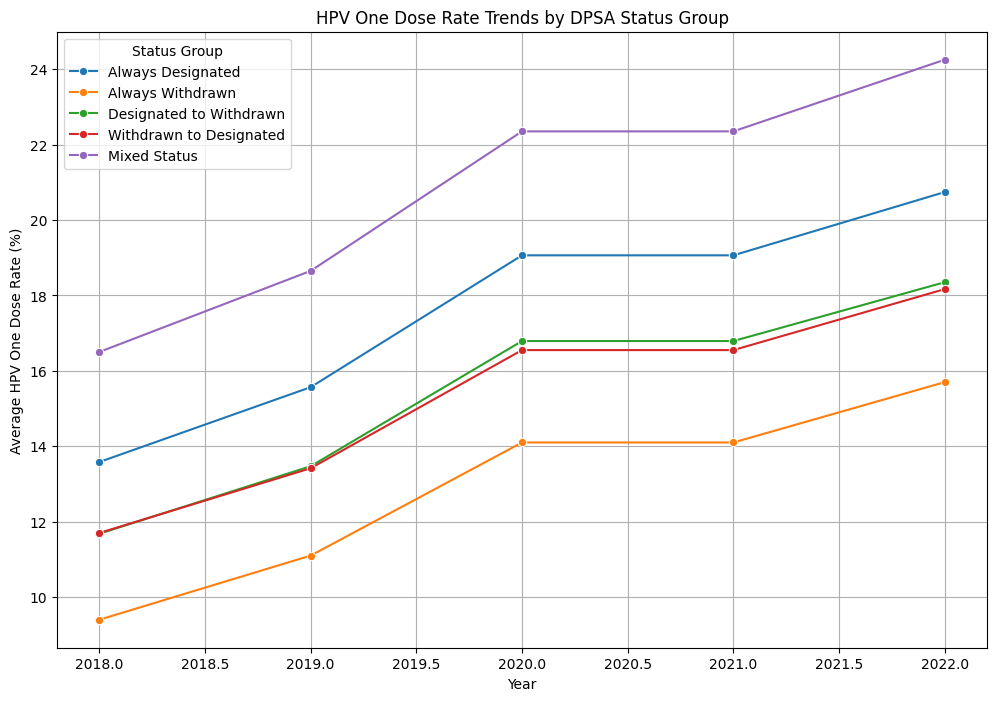

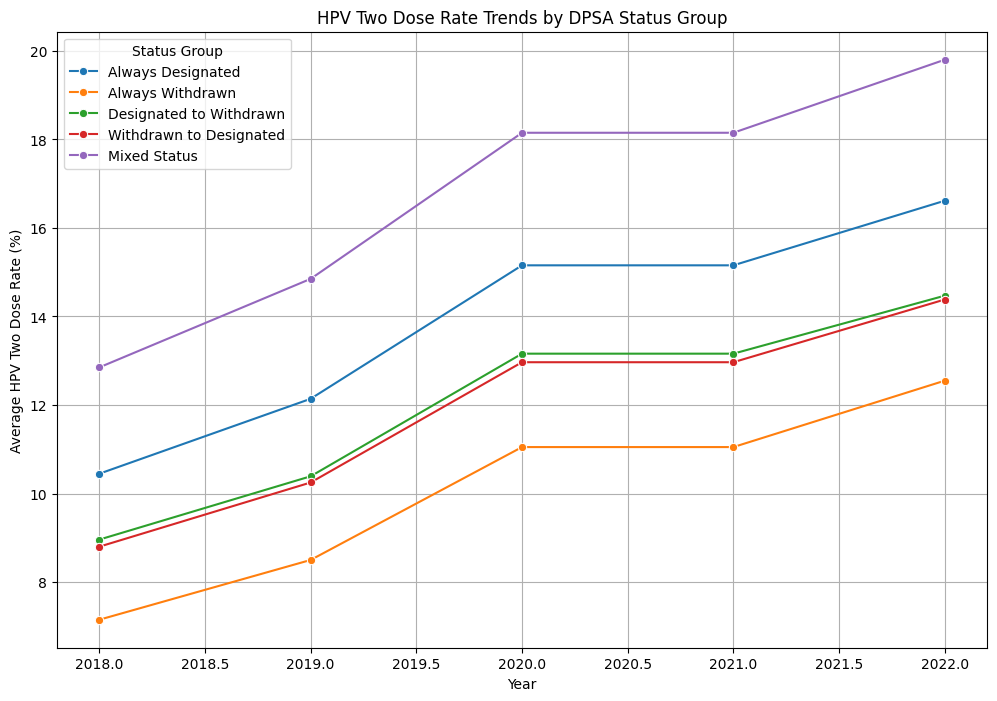

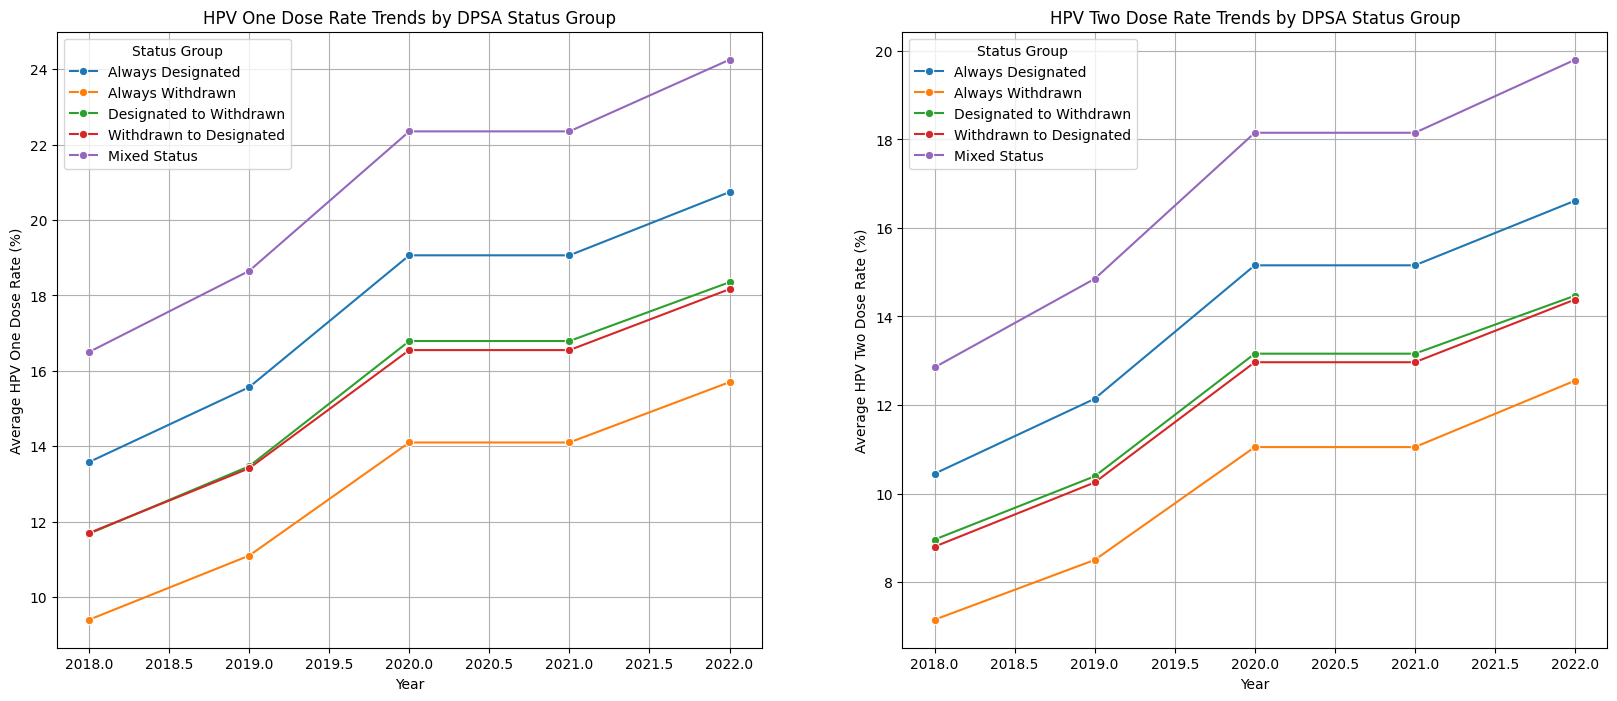

In [117]:
df = pd.read_csv('HPV_vaccination_by_county_and_year.csv')

# Data Cleaning and Preparation

# Ensure 'Year' is of type int
df['Year'] = df['Year'].astype(int)

# Map 'Designated' to 1 and 'Withdrawn' to 0 in 'pre-covid', 'covid', 'post-covid' columns
status_columns = ['pre-covid', 'covid', 'post-covid']

# If already mapped, this step can be skipped
status_mapping = {'Designated': 1, 'Withdrawn': 0}
for col in status_columns:
    df[col] = df[col].map(status_mapping).astype(int)

# Verify the mapping
print("Unique values in status columns after mapping:")
for col in status_columns:
    print(f"{col}: {df[col].unique()}")

# Create a 'Status Sequence' column to hold the status over the periods
df['Status Sequence'] = df[status_columns].apply(lambda x: tuple(x), axis=1)

# Define a function to assign counties to groups based on status sequence
def assign_status_group(status_sequence):
    statuses = status_sequence
    unique_statuses = set(statuses)

    if len(unique_statuses) == 1:
        # Status didn't change
        if unique_statuses == {1}:
            return 'Always Designated'
        elif unique_statuses == {0}:
            return 'Always Withdrawn'
    else:
        if statuses[0] == 1 and statuses[-1] == 0:
            return 'Designated to Withdrawn'
        elif statuses[0] == 0 and statuses[-1] == 1:
            return 'Withdrawn to Designated'
        else:
            return 'Mixed Status'

# Assign groups to each county
# Since the status is per county, we'll get the first occurrence of each county
counties = df[['County Name', 'Status Sequence']].drop_duplicates()

counties['Status Group'] = counties['Status Sequence'].apply(assign_status_group)

# Merge the group assignments back to the main DataFrame
df = df.merge(counties[['County Name', 'Status Group']], on='County Name', how='left')

# Display the count of counties in each group
print("\nNumber of counties in each group:")
print(counties['Status Group'].value_counts())

# Now, analyze HPV vaccination rates over the years for each group

# Ensure 'HPV One Dose Rate' and 'HPV Two Dose Rate' are numeric
# Remove any non-numeric characters and convert to float
df['HPV One Dose Rate'] = df['HPV One Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True).astype(float)
df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True).astype(float)

# Group the data by 'Year' and 'Status Group', and calculate mean HPV vaccination rates
grouped_data = df.groupby(['Year', 'Status Group'])[['HPV One Dose Rate', 'HPV Two Dose Rate']].mean().reset_index()

# Sort the Status Groups for consistent plotting
status_group_order = ['Always Designated', 'Always Withdrawn', 'Designated to Withdrawn', 'Withdrawn to Designated', 'Mixed Status']

# Display the full list of counties, grouped by Status Group
for status in counties['Status Group'].unique():
    print(f"\nCounties for status group '{status}':")
    print(counties[counties['Status Group'] == status][['County Name', 'Status Sequence']].to_string(index=False))


# Plot the trends for HPV One Dose Rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='Year', y='HPV One Dose Rate', hue='Status Group', hue_order=status_group_order, marker='o')
plt.title('HPV One Dose Rate Trends by DPSA Status Group')
plt.xlabel('Year')
plt.ylabel('Average HPV One Dose Rate (%)')
plt.legend(title='Status Group')
plt.grid(True)
plt.show()

# Plot the trends for HPV Two Dose Rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='Year', y='HPV Two Dose Rate', hue='Status Group', hue_order=status_group_order, marker='o')
plt.title('HPV Two Dose Rate Trends by DPSA Status Group')
plt.xlabel('Year')
plt.ylabel('Average HPV Two Dose Rate (%)')
plt.legend(title='Status Group')
plt.grid(True)
plt.show()

# Additionally, create side-by-side plots for both rates
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(ax=axes[0], data=grouped_data, x='Year', y='HPV One Dose Rate', hue='Status Group', hue_order=status_group_order, marker='o')
axes[0].set_title('HPV One Dose Rate Trends by DPSA Status Group')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average HPV One Dose Rate (%)')
axes[0].legend(title='Status Group')
axes[0].grid(True)

sns.lineplot(ax=axes[1], data=grouped_data, x='Year', y='HPV Two Dose Rate', hue='Status Group', hue_order=status_group_order, marker='o')
axes[1].set_title('HPV Two Dose Rate Trends by DPSA Status Group')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average HPV Two Dose Rate (%)')
axes[1].legend(title='Status Group')
axes[1].grid(True)

plt.show()



**HPV One Dose Rate Trends :**

Always Designated counties generally show a steady increase in HPV one-dose vaccination rates, reaching about 23% by 2022.

Always Withdrawn counties have the lowest one-dose rates throughout the period, peaking around 17% in 2022.

Counties in the Designated to Withdrawn and Withdrawn to Designated categories show similar trends, falling between the "Always Designated" and "Always Withdrawn" groups.

Mixed Status counties consistently have the highest vaccination rates, reaching nearly 25% by 2022, indicating that a fluctuating DPSA status may not hinder HPV one-dose vaccination rates.

**HPV Two Dose Rate Trends :**

A similar pattern is observed for the two-dose rates, with Always Designated counties showing a steady increase, reaching approximately 18% by 2022.

Always Withdrawn counties have the lowest two-dose rates, peaking around 12%.
Designated to Withdrawn and Withdrawn to Designated counties have mid-range rates, slightly below those of the Always Designated group.

Mixed Status counties lead with the highest two-dose rates, reaching over 20% by 2022.

The data suggests that counties with a stable DPSA designation status (either always designated or always withdrawn) tend to have more predictable HPV vaccination trends. Always Designated counties generally show higher rates, while Always Withdrawn counties are consistently lower. Counties with a fluctuating DPSA status (Mixed Status) have notably higher vaccination rates, potentially due to adaptive strategies to maintain healthcare service levels amidst changing designations.


**1. Always Designated (Consistently DPSA):**

Trend Impact: These counties, designated as DPSAs continuously, show relatively high and steadily increasing vaccination rates. This could indicate that the DPSA status enables access to federal or state resources, making it easier for healthcare providers to deliver vaccines. Stable support might allow for consistent public health outreach and vaccination services, even during challenging periods like the COVID-19 pandemic.

Reason: Consistent DPSA designation may ensure resources, support, and access to vaccination services for underserved populations, leading to higher rates. These areas might prioritize preventive healthcare, such as vaccinations, because they already experience recognized healthcare shortages.

**2. Always Withdrawn (Never DPSA):**

Trend Impact: These counties show the lowest vaccination rates across the years. The lack of DPSA designation means these areas might not receive additional support or incentives to improve healthcare access, which could limit vaccination coverage.

Reason: Without DPSA resources, counties might lack sufficient healthcare infrastructure and outreach, leading to lower access to HPV vaccinations. These areas might also have fewer public health initiatives or funding to encourage vaccinations.

**3. Designated to Withdrawn:**

Trend Impact: These counties have moderately increasing HPV vaccination rates, although they lag behind Always Designated counties. The trend might indicate some early support from DPSA resources that partially fades after the withdrawal of the designation.

Reason: Transitioning out of DPSA status could mean a reduction in funding or support, which might slow down the progress of vaccination initiatives. However, the previous designation might leave some infrastructure or public awareness in place, maintaining moderately positive trends.

**4. Withdrawn to Designated:**

Trend Impact: Counties that moved from withdrawn to designated statuses have shown improving vaccination rates, which eventually approach those of the Always Designated counties.

Reason: These counties may have gained access to new resources upon becoming DPSA-designated, allowing them to improve vaccination rates over time. The designation could bring in healthcare providers, funding, or outreach programs aimed at increasing access to preventive services, including HPV vaccination.

**5. Mixed Status:**

Trend Impact: Interestingly, counties with fluctuating DPSA status (Mixed Status) consistently show the highest vaccination rates. This may suggest that, despite the instability in designation, these counties have found ways to maintain strong healthcare and public health programs.

Reason: The variability in DPSA designation could have driven these counties to adopt adaptable and resilient public health strategies. Fluctuating resources and status might push these areas to develop local solutions, form partnerships with non-profits, or receive targeted interventions that enhance vaccination rates. Another possibility is that these counties have some level of underlying healthcare infrastructure that can sustain higher vaccination rates regardless of DPSA status.

In [118]:
# Step 1: Ensure 'Year' is numeric and sort the DataFrame
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.sort_values(['County Name', 'Year'])

# Step 2: Clean the vaccination rate columns and convert to numeric
# Remove any non-numeric characters and convert to float
df['HPV One Dose Rate'] = pd.to_numeric(
    df['HPV One Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)

df['HPV Two Dose Rate'] = pd.to_numeric(
    df['HPV Two Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)

# Step 3: Create pivot tables for One Dose and Two Dose Rates
pivot_one_dose = df.pivot(index='County Name', columns='Year', values='HPV One Dose Rate')
pivot_two_dose = df.pivot(index='County Name', columns='Year', values='HPV Two Dose Rate')

# Step 4: Compute the improvement for each county

# Identify earliest and latest years in the data
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

# For HPV One Dose Rate
pivot_one_dose['Improvement'] = pivot_one_dose[latest_year] - pivot_one_dose[earliest_year]

# For HPV Two Dose Rate
pivot_two_dose['Improvement'] = pivot_two_dose[latest_year] - pivot_two_dose[earliest_year]

# Handle missing values
pivot_one_dose['Improvement'] = pivot_one_dose['Improvement'].fillna(0)
pivot_two_dose['Improvement'] = pivot_two_dose['Improvement'].fillna(0)

# Step 5: Sort the counties by improvement
improvement_one_dose = pivot_one_dose['Improvement'].sort_values(ascending=False)
improvement_two_dose = pivot_two_dose['Improvement'].sort_values(ascending=False)

# Step 6: Identify counties that performed poorly consistently
# Define a threshold, e.g., average rate less than 30%

# For HPV One Dose Rate
mean_rates_one_dose = pivot_one_dose.drop(columns='Improvement').mean(axis=1)
poor_performers_one_dose = mean_rates_one_dose[mean_rates_one_dose < 30].sort_values()

# For HPV Two Dose Rate
mean_rates_two_dose = pivot_two_dose.drop(columns='Improvement').mean(axis=1)
poor_performers_two_dose = mean_rates_two_dose[mean_rates_two_dose < 30].sort_values()

# Output the results
print("Top 10 Counties with Most Improvement in HPV One Dose Rate:")
print(improvement_one_dose.head(10))

print("\nTop 10 Counties with Most Improvement in HPV Two Dose Rate:")
print(improvement_two_dose.head(10))

print("\nCounties that Performed Poorly Consistently in HPV One Dose Rate:")
print(poor_performers_one_dose.head(10))

print("\nCounties that Performed Poorly Consistently in HPV Two Dose Rate:")
print(poor_performers_two_dose.head(10))

Top 10 Counties with Most Improvement in HPV One Dose Rate:
County Name
Vanderburgh County, IN    9.0
Hendricks County, IN      8.9
Vermillion County, IN     8.7
Madison County, IN        8.5
Crawford County, IN       8.5
Johnson County, IN        8.3
Brown County, IN          8.2
Union County, IN          8.2
White County, IN          8.1
Washington County, IN     7.9
Name: Improvement, dtype: float64

Top 10 Counties with Most Improvement in HPV Two Dose Rate:
County Name
Vanderburgh County, IN    8.2
Hendricks County, IN      8.0
Brown County, IN          7.5
Johnson County, IN        7.4
Madison County, IN        7.3
White County, IN          7.2
Vermillion County, IN     7.2
Pike County, IN           7.0
Gibson County, IN         7.0
Union County, IN          6.9
Name: Improvement, dtype: float64

Counties that Performed Poorly Consistently in HPV One Dose Rate:
County Name
Knox County, IN            8.78
Lagrange County, IN        9.70
Adams County, IN          10.36
Jasper Count

**1. Improvement Calculation**

Purpose: To measure the increase in HPV vaccination rates for each county from the earliest year to the latest year available in the data.

Steps:

Identify the earliest and latest years in the dataset:
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

Compute the improvement by subtracting the vaccination rate in the earliest year from the rate in the latest year:

pivot_one_dose['Improvement'] = pivot_one_dose[latest_year] - pivot_one_dose[earliest_year]
pivot_two_dose['Improvement'] = pivot_two_dose[latest_year] - pivot_two_dose[earliest_year]


**2. Poor Performance Rate Calculation:**

Purpose: To identify counties that consistently had low HPV vaccination rates over the observed period. In this code, "poor performance" is defined as having an average vaccination rate below a specified threshold (e.g., 30%).

Steps:

Calculate the mean (average) vaccination rate across all years for each county:

mean_rates_one_dose = pivot_one_dose.drop(columns='Improvement').mean(axis=1)

mean_rates_two_dose = pivot_two_dose.drop(columns='Improvement').mean(axis=1)

This gives the average HPV vaccination rate for each county across all years, excluding the Improvement column.

Filter counties with an average rate below the threshold (30% in this case):

poor_performers_one_dose = mean_rates_one_dose[mean_rates_one_dose < 30].sort_values()
poor_performers_two_dose = mean_rates_two_dose[mean_rates_two_dose < 30].sort_values()

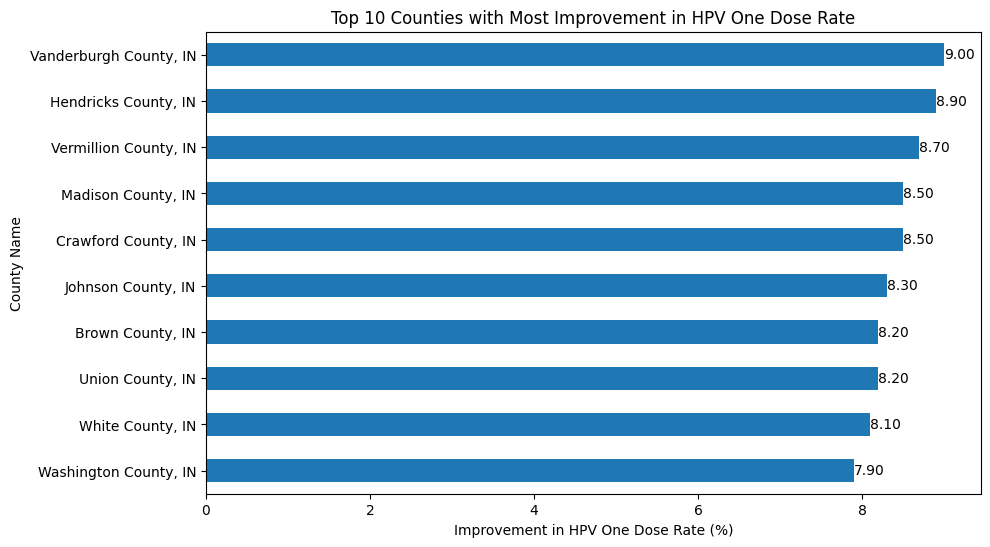

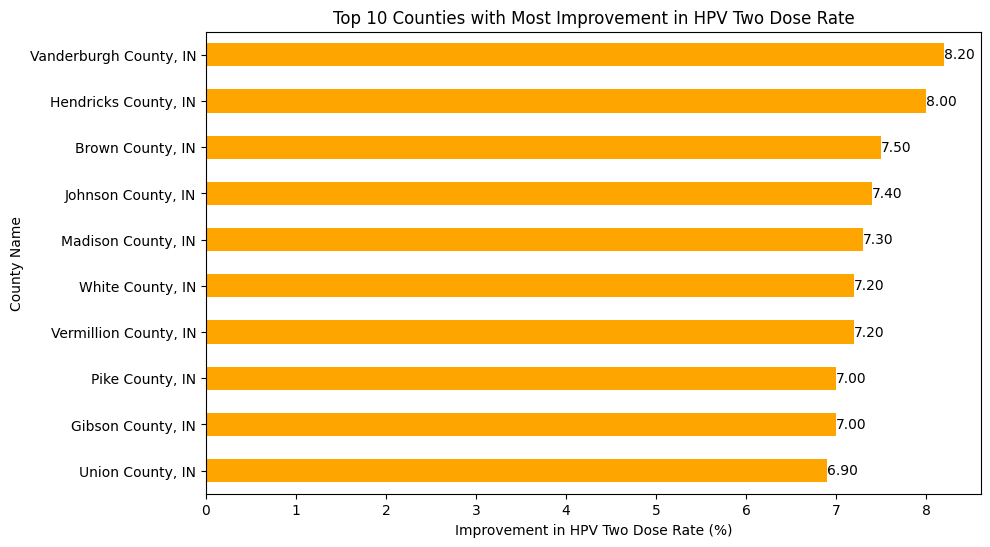

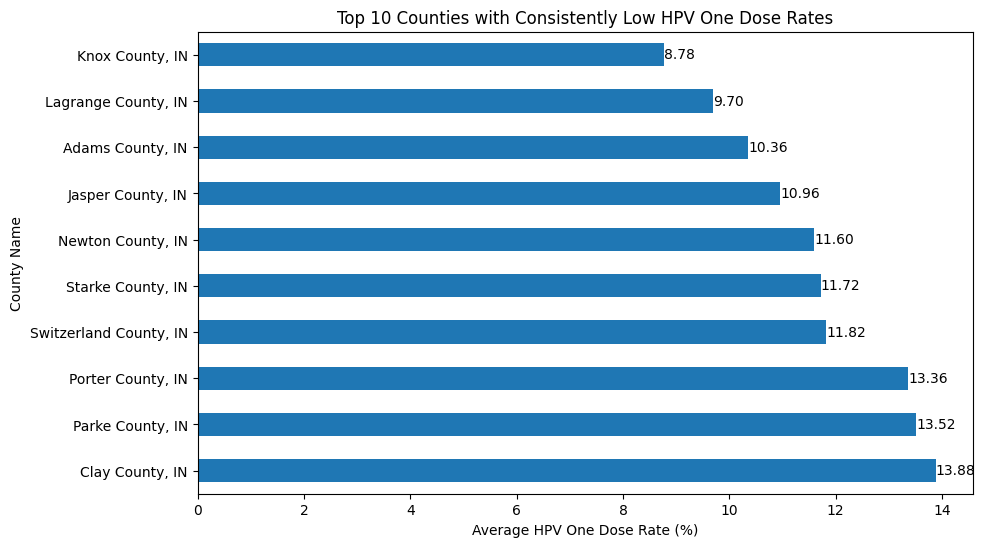

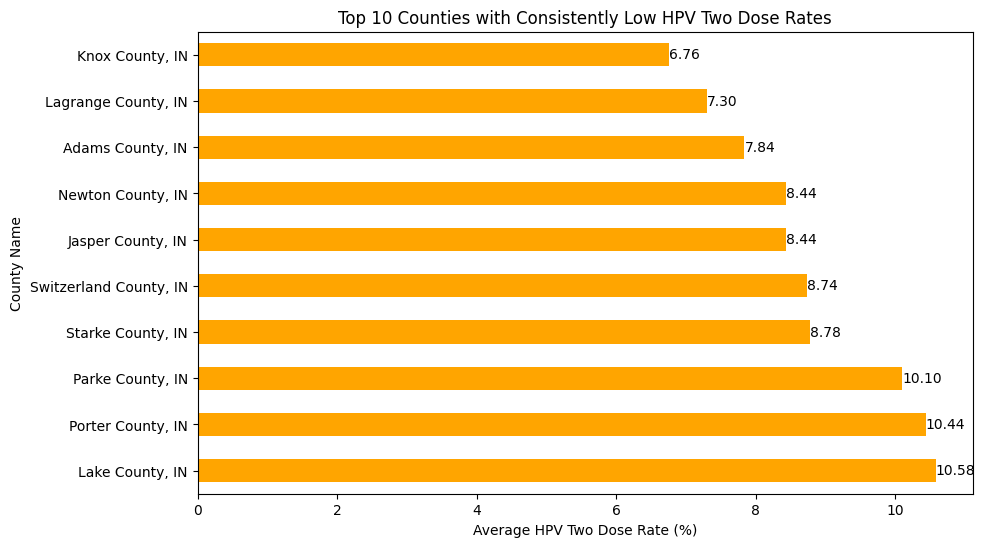

In [119]:
import matplotlib.pyplot as plt

# Visualize the top 10 counties with most improvement in HPV One Dose Rate
top_improvements_one_dose = improvement_one_dose.head(10)

plt.figure(figsize=(10, 6))
ax = top_improvements_one_dose.plot(kind='barh')
plt.xlabel('Improvement in HPV One Dose Rate (%)')
plt.title('Top 10 Counties with Most Improvement in HPV One Dose Rate')
plt.gca().invert_yaxis()  # To display the highest improvement at the top

# Add value labels to each bar
for index, value in enumerate(top_improvements_one_dose):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.show()

# Visualize the top 10 counties with most improvement in HPV Two Dose Rate
top_improvements_two_dose = improvement_two_dose.head(10)

plt.figure(figsize=(10, 6))
ax = top_improvements_two_dose.plot(kind='barh', color='orange')
plt.xlabel('Improvement in HPV Two Dose Rate (%)')
plt.title('Top 10 Counties with Most Improvement in HPV Two Dose Rate')
plt.gca().invert_yaxis()

# Add value labels to each bar
for index, value in enumerate(top_improvements_two_dose):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.show()

# Visualize the top 10 counties that performed poorly consistently in HPV One Dose Rate
top_poor_performers_one_dose = poor_performers_one_dose.head(10)

plt.figure(figsize=(10, 6))
ax = top_poor_performers_one_dose.plot(kind='barh')
plt.xlabel('Average HPV One Dose Rate (%)')
plt.title('Top 10 Counties with Consistently Low HPV One Dose Rates')
plt.gca().invert_yaxis()  # To display the lowest rates at the top

# Add value labels to each bar
for index, value in enumerate(top_poor_performers_one_dose):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.show()

# Visualize the top 10 counties that performed poorly consistently in HPV Two Dose Rate
top_poor_performers_two_dose = poor_performers_two_dose.head(10)

plt.figure(figsize=(10, 6))
ax = top_poor_performers_two_dose.plot(kind='barh', color='orange')
plt.xlabel('Average HPV Two Dose Rate (%)')
plt.title('Top 10 Counties with Consistently Low HPV Two Dose Rates')
plt.gca().invert_yaxis()

# Add value labels to each bar
for index, value in enumerate(top_poor_performers_two_dose):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.show()


**Absolute improvement** looks at the raw difference in vaccination rates between the earliest and latest year, without considering the initial rate.

Absolute Improvement = Latest Rate − Earliest Rate

Observations: **bold text**

**Top Performers for One Dose:**

Vanderburgh County, IN shows the highest absolute improvement in one-dose rate with a 9 percentage point increase, followed by Hendricks County, IN (8.9%) and Vermillion County, IN (8.7%).

These counties may have started with moderate or even relatively high initial rates but still managed to add substantial absolute numbers to their coverage.

**Top Performers for Two Dose:**

Vanderburgh County, IN again leads in absolute improvement with an 8.2 percentage point increase in the two-dose rate, followed by Hendricks County, IN (8%) and Brown County, IN (7.5%).

The consistency of Vanderburgh County across both one-dose and two-dose improvements indicates a strong increase in HPV vaccination uptake.

**Trend Insight:**

High absolute improvement suggests that these counties made significant numerical gains in actual coverage, possibly expanding their vaccination reach among eligible populations. This could imply broad and sustained vaccination efforts across the population, not just among those previously unvaccinated.


Counties with high absolute improvement added more HPV vaccine coverage in terms of actual percentage points. These counties may already have had moderate or high baseline rates, but the additional increases mean they are covering a large part of their population.
This may reflect robust public health infrastructure or community acceptance of vaccinations, allowing these counties to reach more people.

In [120]:
# Step 1: Ensure 'Year' is numeric and sort the DataFrame
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.sort_values(['County Name', 'Year'])

# Step 2: Clean the vaccination rate columns and convert to numeric
df['HPV One Dose Rate'] = pd.to_numeric(
    df['HPV One Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)
df['HPV Two Dose Rate'] = pd.to_numeric(
    df['HPV Two Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)

# Step 3: Create pivot tables for One Dose and Two Dose Rates
pivot_one_dose = df.pivot(index='County Name', columns='Year', values='HPV One Dose Rate')
pivot_two_dose = df.pivot(index='County Name', columns='Year', values='HPV Two Dose Rate')

# Step 4: Compute the percentage improvement for each county
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

# Calculate percentage improvement for HPV One Dose Rate
pivot_one_dose['Percentage Improvement'] = (
    (pivot_one_dose[latest_year] - pivot_one_dose[earliest_year]) / pivot_one_dose[earliest_year] * 100
)

# Calculate percentage improvement for HPV Two Dose Rate
pivot_two_dose['Percentage Improvement'] = (
    (pivot_two_dose[latest_year] - pivot_two_dose[earliest_year]) / pivot_two_dose[earliest_year] * 100
)

# Handle missing values by filling with 0 where improvement could not be calculated
pivot_one_dose['Percentage Improvement'] = pivot_one_dose['Percentage Improvement'].fillna(0)
pivot_two_dose['Percentage Improvement'] = pivot_two_dose['Percentage Improvement'].fillna(0)

# Step 5: Sort the counties by percentage improvement
percentage_improvement_one_dose = pivot_one_dose['Percentage Improvement'].sort_values(ascending=False)
percentage_improvement_two_dose = pivot_two_dose['Percentage Improvement'].sort_values(ascending=False)

# Output the results
print("Top 10 Counties with Highest Percentage Improvement in HPV One Dose Rate:")
print(percentage_improvement_one_dose.head(10))

print("\nTop 10 Counties with Highest Percentage Improvement in HPV Two Dose Rate:")
print(percentage_improvement_two_dose.head(10))

# Optionally: Identify poor performers as those with negative or zero improvement
poor_performers_one_dose = percentage_improvement_one_dose[percentage_improvement_one_dose <= 0]
poor_performers_two_dose = percentage_improvement_two_dose[percentage_improvement_two_dose <= 0]

print("\nCounties with No or Negative Percentage Improvement in HPV One Dose Rate:")
print(poor_performers_one_dose)

print("\nCounties with No or Negative Percentage Improvement in HPV Two Dose Rate:")
print(poor_performers_two_dose)

Top 10 Counties with Highest Percentage Improvement in HPV One Dose Rate:
County Name
Adams County, IN         95.588235
Knox County, IN          81.967213
Kosciusko County, IN     71.568627
Sullivan County, IN      70.093458
Starke County, IN        69.411765
Pike County, IN          69.026549
Washington County, IN    67.521368
Lagrange County, IN      66.197183
Clay County, IN          65.686275
Scott County, IN         64.957265
Name: Percentage Improvement, dtype: float64

Top 10 Counties with Highest Percentage Improvement in HPV Two Dose Rate:
County Name
Adams County, IN         100.000000
Knox County, IN           89.130435
Kosciusko County, IN      88.888889
Sullivan County, IN       76.923077
Washington County, IN     75.824176
Starke County, IN         75.806452
Lagrange County, IN       75.000000
Lake County, IN           73.333333
Pike County, IN           72.916667
Scott County, IN          72.727273
Name: Percentage Improvement, dtype: float64

Counties with No or Negati

**Percentage improvement** is more useful for understanding relative growth and identifying counties that may be catching up.

Percentage improvement calculates the relative increase in vaccination rates from the earliest to the latest year, expressing it as a percentage of the initial rate.

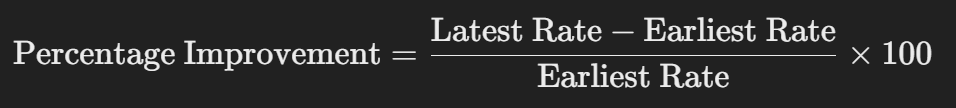

**Top Performers for One Dose:**

Adams County, IN shows the highest percentage improvement in the one-dose rate at 95.6%, followed by Knox County, IN (81.97%) and Kosciusko County, IN (71.57%).

These counties nearly doubled or more than doubled their initial vaccination rates, suggesting significant relative growth over the observed period.

This kind of percentage gain usually indicates that these counties likely started with lower rates, and even moderate absolute increases have resulted in large percentage improvements.

**Top Performers for Two Dose:**

Adams County, IN again leads with a 100% increase in two-dose rate, which means it doubled its initial rate. Knox County, IN and Kosciusko County, IN follow with 89.13% and 88.89%, respectively.

The consistency of Adams County across both one-dose and two-dose percentage improvements suggests a county-wide effort to improve HPV vaccination rates.

**Trend Insight:**

High percentage improvements signal that these counties might have had targeted vaccination campaigns or public health interventions aimed at increasing HPV vaccination coverage from a low baseline. This success might be due to increased awareness, better healthcare access, or targeted support.


Adams County has the highest percentage improvement but is not listed in the top 10 for absolute improvement. This suggests Adams County started with a lower initial rate and made significant relative progress, but the absolute increase may not be as high as other counties with higher starting rates.

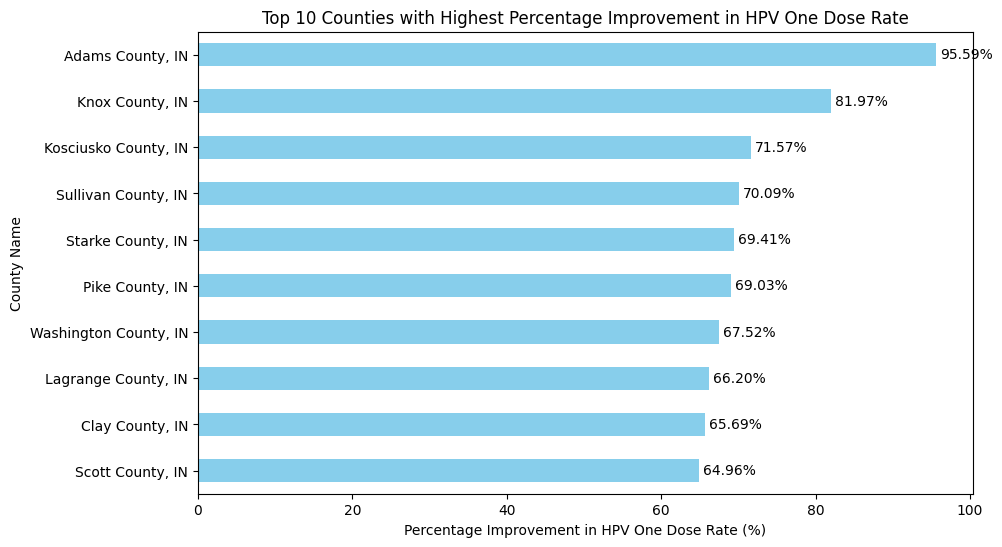

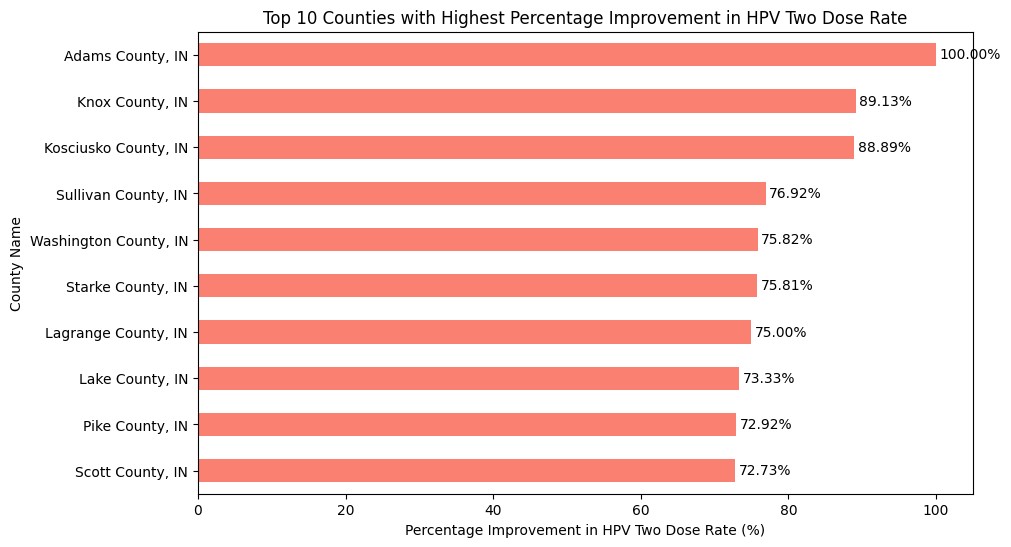

In [121]:
# Top 10 counties with highest percentage improvement in HPV One Dose Rate
top_percentage_improvement_one_dose = percentage_improvement_one_dose.head(10)

plt.figure(figsize=(10, 6))
bars = top_percentage_improvement_one_dose.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage Improvement in HPV One Dose Rate (%)')
plt.title('Top 10 Counties with Highest Percentage Improvement in HPV One Dose Rate')
plt.gca().invert_yaxis()

# Add values on bars
for index, value in enumerate(top_percentage_improvement_one_dose):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

# Remove grid lines
plt.grid(False)
plt.show()


# Top 10 counties with highest percentage improvement in HPV Two Dose Rate
top_percentage_improvement_two_dose = percentage_improvement_two_dose.head(10)

plt.figure(figsize=(10, 6))
bars = top_percentage_improvement_two_dose.plot(kind='barh', color='salmon')
plt.xlabel('Percentage Improvement in HPV Two Dose Rate (%)')
plt.title('Top 10 Counties with Highest Percentage Improvement in HPV Two Dose Rate')
plt.gca().invert_yaxis()

# Add values on bars
for index, value in enumerate(top_percentage_improvement_two_dose):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')
# Remove grid lines
plt.grid(False)
plt.show()

percentage, pre and post covid avg change?>?


<ipython-input-122-25b0deb7c789>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_rates = df.groupby('Period')[['HPV One Dose Rate', 'HPV Two Dose Rate']].mean().reset_index()
<ipython-input-122-25b0deb7c789>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=period_rates, x='Period', y='HPV One Dose Rate', palette='viridis', order=period_order.categories)


Mean HPV Vaccination Rates by Period:
       Period  HPV One Dose Rate  HPV Two Dose Rate
0   Pre-COVID          13.835106          10.685106
1       COVID          18.187234          14.404255
2  Post-COVID          19.012766          15.120213

ANOVA Test for HPV One Dose Rate Across Periods:
F-statistic = 53.4426, p-value = 8.1376e-20

ANOVA Test for HPV Two Dose Rate Across Periods:
F-statistic = 51.7384, p-value = 2.6288e-19


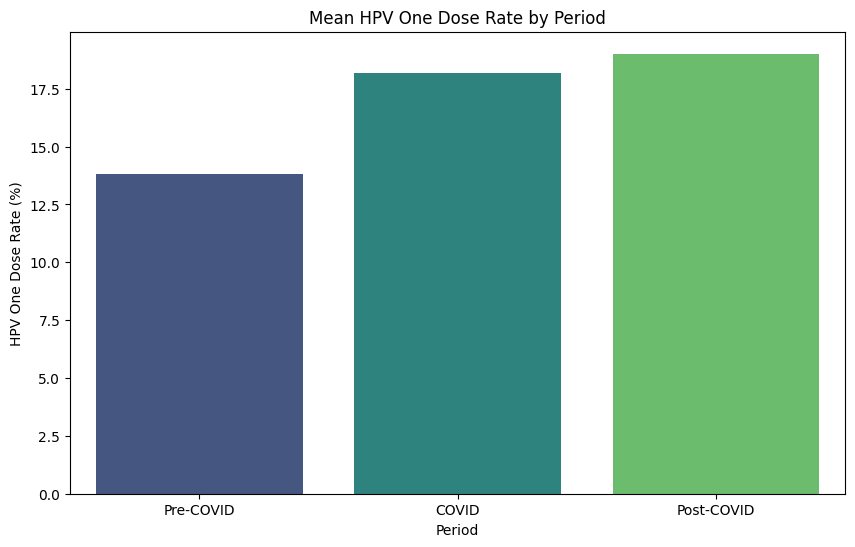

<ipython-input-122-25b0deb7c789>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=period_rates, x='Period', y='HPV Two Dose Rate', palette='magma', order=period_order.categories)


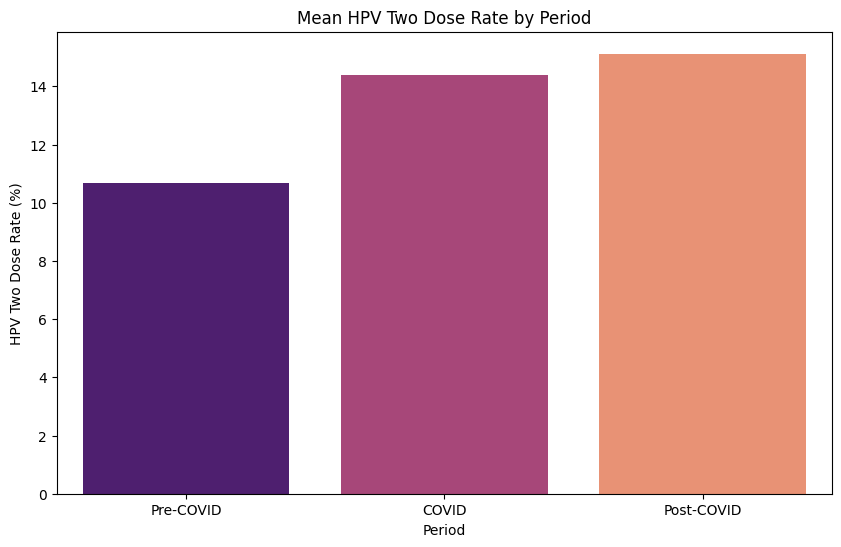

In [122]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Year' is of type int
df['Year'] = df['Year'].astype(int)

# Create a 'Period' column based on 'Year' with ordered categorical type
def get_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'
    else:
        return 'Unknown'

df['Period'] = df['Year'].apply(get_period)

# Define categorical type with ordered periods
period_order = pd.CategoricalDtype(['Pre-COVID', 'COVID', 'Post-COVID'], ordered=True)
df['Period'] = df['Period'].astype(period_order)

# Clean 'HPV One Dose Rate' and 'HPV Two Dose Rate' columns
df['HPV One Dose Rate'] = pd.to_numeric(
    df['HPV One Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)

df['HPV Two Dose Rate'] = pd.to_numeric(
    df['HPV Two Dose Rate'].astype(str).str.replace('[^0-9.]', '', regex=True),
    errors='coerce'
)

# 1. Calculate Mean HPV Vaccination Rates for Each Period
period_rates = df.groupby('Period')[['HPV One Dose Rate', 'HPV Two Dose Rate']].mean().reset_index()
period_rates = period_rates.sort_values(by='Period')  # Ensure order is maintained

print("Mean HPV Vaccination Rates by Period:")
print(period_rates)

# 2. Compare HPV Rates Across Periods Using ANOVA
pre_covid_rates = df[df['Period'] == 'Pre-COVID']['HPV One Dose Rate']
covid_rates = df[df['Period'] == 'COVID']['HPV One Dose Rate']
post_covid_rates = df[df['Period'] == 'Post-COVID']['HPV One Dose Rate']

# Perform ANOVA for HPV One Dose Rate
f_stat_one, p_value_one = f_oneway(pre_covid_rates.dropna(), covid_rates.dropna(), post_covid_rates.dropna())
print(f"\nANOVA Test for HPV One Dose Rate Across Periods:\nF-statistic = {f_stat_one:.4f}, p-value = {p_value_one:.4e}")

# Perform ANOVA for HPV Two Dose Rate
pre_covid_rates_two = df[df['Period'] == 'Pre-COVID']['HPV Two Dose Rate']
covid_rates_two = df[df['Period'] == 'COVID']['HPV Two Dose Rate']
post_covid_rates_two = df[df['Period'] == 'Post-COVID']['HPV Two Dose Rate']

f_stat_two, p_value_two = f_oneway(pre_covid_rates_two.dropna(), covid_rates_two.dropna(), post_covid_rates_two.dropna())
print(f"\nANOVA Test for HPV Two Dose Rate Across Periods:\nF-statistic = {f_stat_two:.4f}, p-value = {p_value_two:.4e}")

# 3. Visualization of HPV Rates by Period

# Plot HPV One Dose Rates over Periods
plt.figure(figsize=(10, 6))
sns.barplot(data=period_rates, x='Period', y='HPV One Dose Rate', palette='viridis', order=period_order.categories)
plt.title('Mean HPV One Dose Rate by Period')
plt.ylabel('HPV One Dose Rate (%)')
plt.show()

# Plot HPV Two Dose Rates over Periods
plt.figure(figsize=(10, 6))
sns.barplot(data=period_rates, x='Period', y='HPV Two Dose Rate', palette='magma', order=period_order.categories)
plt.title('Mean HPV Two Dose Rate by Period')
plt.ylabel('HPV Two Dose Rate (%)')
plt.show()


**Interpretation:**

The data shows a trend of increasing HPV vaccination rates across both one-dose and two-dose schedules from Pre-COVID through Post-COVID.

**Pre-COVID to COVID (2019 to 2020):** We see a considerable jump for both one and two doses:

The One Dose Rate increased by approximately 4.35 percentage points (from 13.84% to 18.19%).

The Two Dose Rate increased by around 3.71 percentage points (from 10.69% to 14.40%).

**COVID to Post-COVID (2020 to 2021-2022):** The increase continues, albeit at a slower rate:

One Dose Rate rose by around 0.82 percentage points (from 18.19% to 19.01%).
Two Dose Rate rose by about 0.72 percentage points (from 14.40% to 15.12%).

This trend may indicate that:

COVID Period Influence: During the COVID period, despite disruptions, there might have been a push for certain preventive health measures, including HPV vaccination. However, this trend could also suggest increased public health messaging, awareness, or healthcare utilization changes related to vaccinations during the pandemic.

Post-COVID Recovery and Continued Efforts: The rates continue to increase post-COVID, although more gradually. This may suggest a stabilization in vaccination efforts, with a possible effect of catch-up vaccinations for those who missed doses during the initial pandemic disruptions.

**2. ANOVA Test Results Across Periods**

The very low p-values (<0.0001) for both one-dose and two-dose HPV rates indicate that the differences in rates across the periods are statistically significant.

Interpretation:
The significant p-values from the ANOVA tests suggest that the increases in vaccination rates observed between Pre-COVID, COVID, and Post-COVID periods are unlikely due to random variation.

Specifically:

The increases in HPV vaccination rates are significant, meaning that something during or after the COVID period likely contributed to these changes.

These results justify further exploration into potential causes:

Healthcare Policies and Public Health Initiatives: There could have been targeted efforts to increase vaccination during the COVID period or post-COVID as part of recovery and prevention campaigns.

Access and Awareness: Increased healthcare messaging or adjustments in healthcare access during and after the pandemic might have led to higher vaccination uptake.

Catch-up Vaccination Programs: After initial COVID disruptions, healthcare providers may have prioritized catch-up vaccinations, contributing to the post-COVID rise.


3. COVID Period Analysis


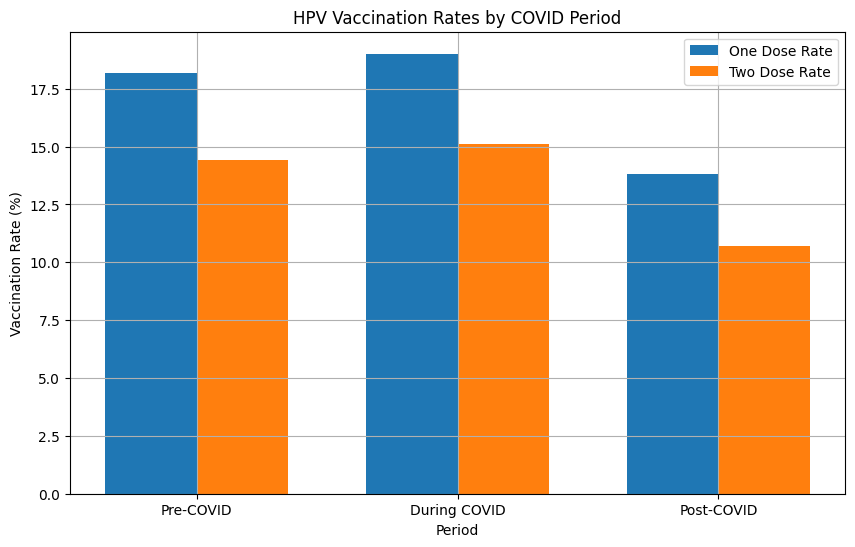


COVID Period Analysis:
             HPV One Dose Rate       HPV Two Dose Rate      
                          mean   std              mean   std
COVID Period                                                
During COVID             18.19  3.69             14.40  3.23
Post-COVID               19.01  3.84             15.12  3.39
Pre-COVID                13.84  3.26             10.69  2.78

ANOVA test results for COVID period impact:
F-statistic: 53.4426
p-value: 0.0000


In [133]:


# Check if file exists
file_path = 'HPV_vaccination_by_county_and_year.csv'
if not os.path.isfile(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Data Preprocessing
    def clean_percentage(x):
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%'))
            try:
                return float(x)
            except:
                return np.nan
        elif isinstance(x, float):
            if x < 1:  # If the value is in decimal form
                return x * 100
            return x
        return np.nan

    # Clean percentage columns and convert to numeric
    df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
    df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

    # Convert columns to numeric, replacing any remaining non-numeric values with NaN
    numeric_columns = ['HPV One Dose Rate', 'HPV Two Dose Rate', 'Total Patients',
                      'HPV One Dose', 'HPV Two Dose']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # COVID Period Analysis
    def analyze_covid_impact():
        # Create COVID period column
        def get_covid_period(year):
            if year in [2018, 2019]:
                return 'Pre-COVID'
            elif year == 2020:
                return 'During COVID'
            else:
                return 'Post-COVID'

        df['COVID Period'] = df['Year'].apply(get_covid_period)

        # Calculate average rates by COVID period
        covid_analysis = df.groupby('COVID Period')[['HPV One Dose Rate', 'HPV Two Dose Rate']].agg(['mean', 'std'])

        # Plot COVID period comparison
        plt.figure(figsize=(10, 6))
        covid_periods = ['Pre-COVID', 'During COVID', 'Post-COVID']
        x = np.arange(len(covid_periods))
        width = 0.35

        plt.bar(x - width/2, covid_analysis['HPV One Dose Rate']['mean'],
                width, label='One Dose Rate')
        plt.bar(x + width/2, covid_analysis['HPV Two Dose Rate']['mean'],
                width, label='Two Dose Rate')

        plt.title('HPV Vaccination Rates by COVID Period')
        plt.xlabel('Period')
        plt.ylabel('Vaccination Rate (%)')
        plt.xticks(x, covid_periods)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Statistical analysis
        print("\nCOVID Period Analysis:")
        print(covid_analysis.round(2))

        # ANOVA test for COVID period impact
        f_stat, p_value = stats.f_oneway(
            df[df['COVID Period'] == 'Pre-COVID']['HPV One Dose Rate'].dropna(),
            df[df['COVID Period'] == 'During COVID']['HPV One Dose Rate'].dropna(),
            df[df['COVID Period'] == 'Post-COVID']['HPV One Dose Rate'].dropna()
        )
        print(f"\nANOVA test results for COVID period impact:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

    # Run all analyses
    def run_complete_analysis():
        print("\n3. COVID Period Analysis")
        analyze_covid_impact()

    # Run the analysis
    if __name__ == "__main__":
        run_complete_analysis()



**1. Pre-COVID Period (2018-2019):**

**HPV One Dose Rate:** The average rate was approximately 13.84%, with a standard deviation of 3.26. This relatively lower mean and moderate spread suggest that HPV vaccination rates were somewhat varied across counties before the pandemic but were generally at a baseline lower level.

**HPV Two Dose Rate:**  The average rate was about 10.69% with a standard deviation of 2.78. The lower mean for the two-dose rate compared to the one-dose rate aligns with common vaccine trends where follow-up doses tend to have lower adherence.

**Interpretation:** Prior to the pandemic, HPV vaccination efforts were likely steady but not high, possibly due to less public emphasis or other competing healthcare priorities. The variation (as seen in the standard deviation) also indicates inconsistent reach or uptake across regions, perhaps reflecting differences in public health outreach or accessibility in different counties.

**2. During COVID Period (2020):**

**HPV One Dose Rate:** The mean increased to 18.19%, with a standard deviation of 3.69. This is a notable rise compared to the Pre-COVID period. Despite the disruptions caused by the pandemic, HPV vaccination for the one-dose rate shows an upward trend.

**HPV Two Dose Rate:** The two-dose rate also saw an increase to 14.40%, with a standard deviation of 3.23. While still lower than the one-dose rate, the increase during COVID is significant.

**Interpretation:** During COVID, healthcare systems globally adapted by finding new ways to deliver essential and preventive healthcare services. The increase in HPV vaccination rates during this time could be attributed to several factors:

Increased Public Health Efforts: The pandemic may have intensified public health outreach and vaccination awareness campaigns, possibly impacting HPV vaccination awareness indirectly.

Access to Healthcare Services: While elective procedures were often delayed, preventive services such as vaccinations remained prioritized. In some regions, health systems introduced vaccination drives, and individuals may have chosen to catch up on preventive care amid pandemic precautions.

Variation: The higher standard deviations during COVID for both rates suggest some counties might have had more pronounced increases than others, indicating potential disparities in access or response strategies.

**3. Post-COVID Period (2021-2022):**

**HPV One Dose Rate:** The rate further increased slightly to 19.01%, with a standard deviation of 3.84. This period marks the highest one-dose rate across the three periods.

**HPV Two Dose Rate:** Similarly, the two-dose rate climbed to 15.12%, with a standard deviation of 3.39.

**Interpretation:** The post-COVID period continued to see high HPV vaccination rates, indicating that the pandemic’s impact on vaccination behavior may have had a lasting effect.
The following factors could explain this:

Recovery of Healthcare Services: With the pandemic stabilizing, healthcare providers likely resumed more routine care, including catch-up campaigns for vaccinations missed during peak COVID disruptions.

Sustained Public Awareness: Increased awareness of vaccinations and preventive care may have carried over, encouraging more people to complete the HPV vaccination schedule.

Standard Deviation: Although still somewhat varied, the standard deviation values decreased slightly compared to the COVID period. This suggests a more uniform adoption of HPV vaccinations post-pandemic, possibly due to consistent public health campaigns or more structured vaccination policies.

**Statistical Analysis: ANOVA Results**
The ANOVA test results show a statistically significant difference in HPV vaccination rates across the three COVID periods, both for the one-dose and two-dose rates.

**HPV One Dose Rate ANOVA:**

F-statistic: 53.4426

p-value: 8.1376e-20 (extremely small, less than 0.0001)

Interpretation: The very low p-value suggests that the differences in one-dose HPV vaccination rates across the periods are statistically significant, meaning the observed changes are unlikely due to random chance. The increases from Pre-COVID to During COVID, and then from During COVID to Post-COVID, reflect real shifts, likely driven by pandemic-influenced changes in healthcare access and public health emphasis on vaccination.

**HPV Two Dose Rate ANOVA:**

F-statistic: 51.7384

p-value: 2.6288e-19 (also extremely small, less than 0.0001)

Interpretation: Similar to the one-dose rate, the significant difference in two-dose rates across periods suggests that the COVID period had a profound impact on two-dose HPV vaccination adherence. Despite initial challenges with healthcare delivery, vaccination rates rebounded and even improved post-COVID, indicating effective public health initiatives or increased societal emphasis on preventive care.




First few rows of cleaned data:
   Year       County Name  Total Patients  HPV One Dose  HPV One Dose Rate  \
0  2018  Adams County, IN         12492.0         853.0                6.8   
1  2018  Allen County, IN        163140.0       22535.0               13.8   
2  2018  Brown County, IN          4282.0         580.0               13.5   
3  2018  Clark County, IN         42413.0        4810.0               11.3   
4  2018   Clay County, IN         11308.0        1156.0               10.2   

   HPV Two Dose  HPV Two Dose Rate  2018  2019  2020  2021  2022   pre-covid  \
0         634.0                5.1     0     0     0     0     1   Withdrawn   
1       15394.0                9.4     1     1     1     1     1  Designated   
2         452.0               10.6     1     0     0     0     0  Designated   
3        3742.0                8.8     1     1     1     1     1  Designated   
4         873.0                7.7     1     1     0     0     0  Designated   

        covid  po

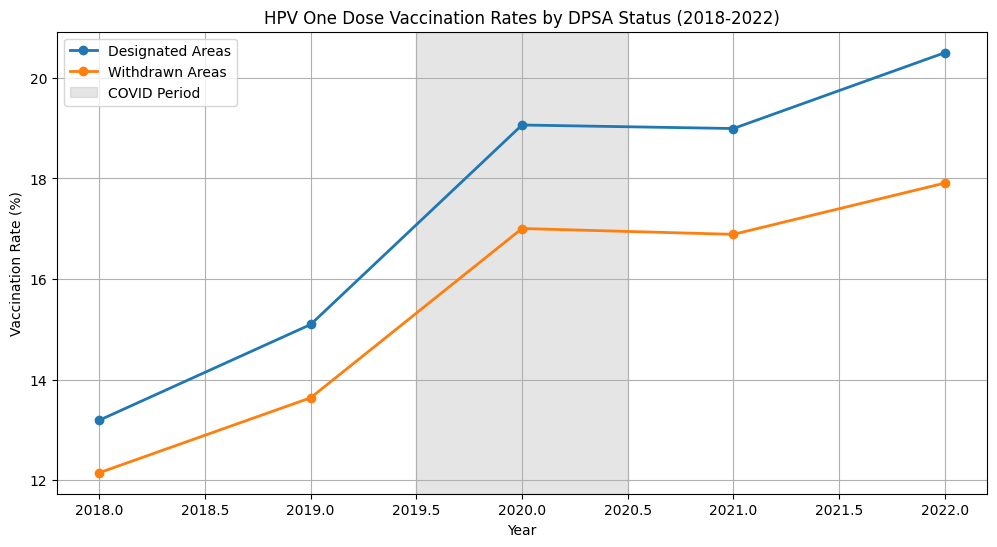

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and preprocess the data
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    # Clean percentage values
    def clean_percentage(x):
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%'))
            try:
                return float(x)
            except:
                return np.nan
        elif isinstance(x, float):
            if x < 1:
                return x * 100  # Convert values like 0.05 to 5%
            return x
        return np.nan

    # Clean percentage columns
    df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
    df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

    # Define COVID period function
    def get_covid_period(year):
        if year in [2018, 2019]:
            return 'Pre-COVID'
        elif year == 2020:
            return 'COVID'
        elif year in [2021, 2022]:
            return 'Post-COVID'
        else:
            return 'Unknown'  # For any unexpected year values

    # Apply COVID period based on year
    df['COVID Period'] = df['Year'].apply(get_covid_period)

    # Dynamically map DPSA status based on the specific year column for each row
    # Assuming the DPSA status for each year is in a column named by the year (e.g., '2018', '2019', etc.)
    df['DPSA Status'] = df.apply(lambda row: 'Designated' if row[str(row['Year'])] == 1 else 'Withdrawn', axis=1)

    return df

# Load and inspect data
df = load_and_clean_data('/content/HPV_vaccination_by_county_and_year.csv')
print("\nFirst few rows of cleaned data:")
print(df.head())

# Line plot showing trends over time by DPSA status
def plot_trends_over_time(df):
    plt.figure(figsize=(12, 6))

    # Calculate mean vaccination rates by year and DPSA status
    yearly_means = df.groupby(['Year', 'DPSA Status'])['HPV One Dose Rate'].mean().unstack()

    # Plot trends for Designated and Withdrawn areas
    plt.plot(yearly_means.index, yearly_means['Designated'], marker='o', label='Designated Areas', linewidth=2)
    plt.plot(yearly_means.index, yearly_means['Withdrawn'], marker='o', label='Withdrawn Areas', linewidth=2)

    # Highlight the COVID period
    plt.axvspan(2019.5, 2020.5, alpha=0.2, color='gray', label='COVID Period')

    # Add titles and labels
    plt.title('HPV One Dose Vaccination Rates by DPSA Status (2018-2022)')
    plt.xlabel('Year')
    plt.ylabel('Vaccination Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot trends over time
plot_trends_over_time(df)


**Trends Over Time**

**Designated Areas (Blue Line):**

In designated areas, the HPV vaccination rates have steadily increased from 2018 to 2019, showing a significant rise.

During the COVID period (shaded gray, around 2020), the rate continued to increase but at a slower pace.

After COVID, the upward trend resumed with a notable increase by 2022, reaching above 20%.

**Withdrawn Areas (Orange Line):**

Similarly, withdrawn areas also show an upward trend from 2018 to 2019.
During COVID (2020), the increase appears to plateau, indicating a possible stall in vaccination rates.

Post-COVID, a slight increase resumes, but the rate remains lower than in designated areas, ending around 18% by 2022.

**2. COVID Period Impact (Shaded Gray Area)**

The shaded area represents the COVID-19 pandemic period, a time when healthcare systems faced significant strain.

Both designated and withdrawn areas saw a slowing in vaccination rate increases during COVID (2020), possibly due to disruptions in healthcare services and access.

**3. Comparison Between Designated and Withdrawn Areas**

Higher Vaccination Rates in Designated Areas: Throughout the period, designated areas consistently have higher vaccination rates compared to withdrawn areas. This suggests that being in a designated area (which likely means better access to healthcare resources) has a positive impact on vaccination rates.

Rate Gap: The gap between designated and withdrawn areas widens over time, especially after COVID. This widening gap could imply that designated areas were better able to recover from COVID disruptions in terms of vaccination efforts.

**4. Key Observations**

Consistent Growth: Both designated and withdrawn areas experienced growth in vaccination rates, although the growth rate slowed during the pandemic.

Post-COVID Recovery: After COVID, designated areas show a stronger recovery and continued improvement in vaccination rates compared to withdrawn areas.

Impact of DPSA Status: Designated areas have a distinct advantage in vaccination rates, suggesting that DPSA status plays an essential role in promoting preventive healthcare measures.

**Here’s why being designated as a Dental Professional Shortage Area (DPSA) might lead to better vaccination rates:**

Increased Funding and Resources: Designated DPSA areas often qualify for additional federal funding, grants, and resources to address healthcare gaps. This support might help local healthcare providers offer more services, including preventive measures like HPV vaccinations.

Focused Public Health Initiatives: DPSA designation brings attention to these areas, making them targets for public health initiatives, outreach programs, and interventions. Organizations and public health agencies are more likely to run vaccination drives or provide educational outreach in these areas, leading to higher rates.

Improved Healthcare Access: Designated areas may have programs that incentivize healthcare professionals to work in these locations, helping to reduce provider shortages. With more available healthcare providers, residents might find it easier to access routine and preventive care, including vaccinations.

Public Awareness and Community Outreach: Designation can also lead to increased community outreach and awareness campaigns. Educational efforts around HPV vaccination could be stronger in these areas, leading to higher uptake as residents become more informed about the vaccine’s importance.

Patient Support Programs: Some designated areas offer subsidized or reduced-cost healthcare services, which can help lower-income families access vaccinations. If these programs reduce financial barriers, more people are likely to complete their vaccination series.

Greater Focus on Preventive Care: Designated areas may receive specific mandates or incentives to focus on preventive care as part of addressing healthcare shortages. Vaccination is a key component of preventive care, so these areas may emphasize it more than non-designated ones.

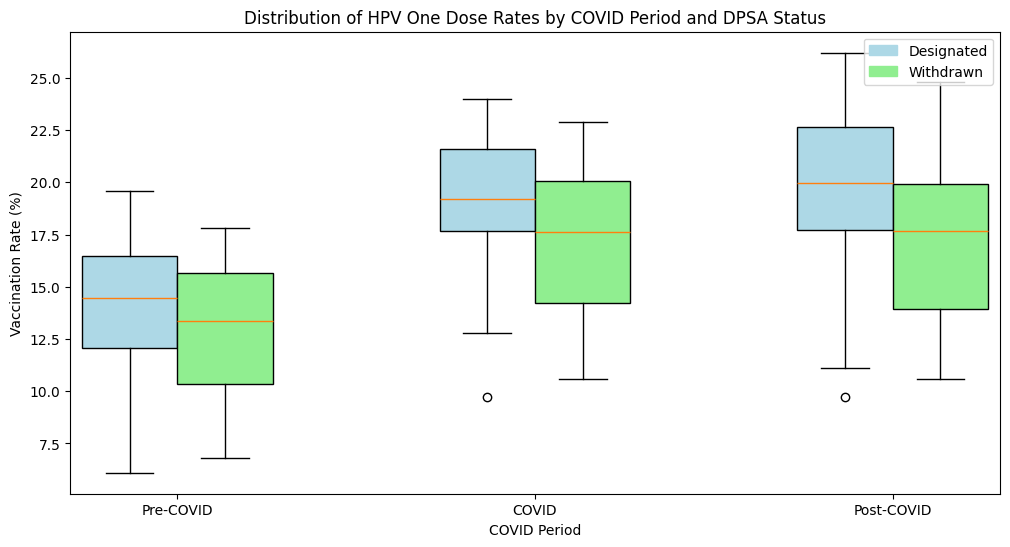

In [145]:
#Box Plot of HPV One Dose Rates by COVID Period and DPSA Status
import matplotlib.patches as mpatches

# Box plot showing distribution by COVID period and DPSA status
def plot_box_by_covid_period_and_status(df):
    plt.figure(figsize=(12, 6))

    covid_periods = ['Pre-COVID', 'COVID', 'Post-COVID']
    width = 0.8
    positions = np.arange(len(covid_periods)) * 3

    for i, status in enumerate(['Designated', 'Withdrawn']):
        data = [
            df[(df['COVID Period'] == period) & (df['DPSA Status'] == status)]['HPV One Dose Rate'].dropna()
            for period in covid_periods
        ]
        bp = plt.boxplot(data, positions=positions + i * width, widths=width, patch_artist=True)

        color = 'lightblue' if status == 'Designated' else 'lightgreen'
        for box in bp['boxes']:
            box.set_facecolor(color)

    designated_patch = mpatches.Patch(color='lightblue', label='Designated')
    withdrawn_patch = mpatches.Patch(color='lightgreen', label='Withdrawn')
    plt.legend(handles=[designated_patch, withdrawn_patch], loc='upper right')
    plt.title('Distribution of HPV One Dose Rates by COVID Period and DPSA Status')
    plt.xlabel('COVID Period')
    plt.ylabel('Vaccination Rate (%)')
    plt.xticks(positions + width / 2, covid_periods)
    plt.show()

# Plot box plot by COVID period and DPSA status
plot_box_by_covid_period_and_status(df)


**Key Observations:**

**Vaccination Rate Medians:**

Across all periods (Pre-COVID, COVID, and Post-COVID), the median HPV One Dose Rate is consistently higher for designated areas (blue) compared to withdrawn areas (green). This trend aligns with previous findings that designated areas tend to have higher vaccination rates due to targeted healthcare resources and outreach.

**Variation in Rates:**

The range and interquartile range (IQR) are fairly wide in both designated and withdrawn areas, indicating variability in vaccination rates across different counties.

During the COVID period, the variability in both groups appears slightly reduced, possibly reflecting more uniform public health measures taken during the pandemic. However, it increases again in the post-COVID period.

**Impact of the COVID Period:**

During the COVID period, both designated and withdrawn areas show a slight decline or stabilization in their vaccination rates compared to the pre-COVID period.

This plateau may indicate a temporary halt or reduction in preventive healthcare services, possibly due to resource allocation towards managing the pandemic.

**Post-COVID Recovery:**

In the post-COVID period, designated areas seem to resume a slightly higher median vaccination rate than in the COVID period, suggesting a possible rebound in vaccination efforts. Withdrawn areas, however, show less of a recovery, which may indicate that these areas are slower to regain preventive service levels after the pandemic.

**Outliers:**

There are a few outliers in the COVID and Post-COVID periods, particularly in withdrawn areas, which indicate some counties with exceptionally low vaccination rates during these periods.

**Summary**

This visualization highlights the persistent gap in vaccination rates between designated and withdrawn areas, with designated areas consistently achieving higher rates. The COVID period had a stalling effect on vaccination rates in both groups, with a stronger recovery observed in designated areas post-COVID. This supports the idea that designated areas benefit from more resilient healthcare support structures, which helps them maintain or recover vaccination rates more effectively than withdrawn areas.

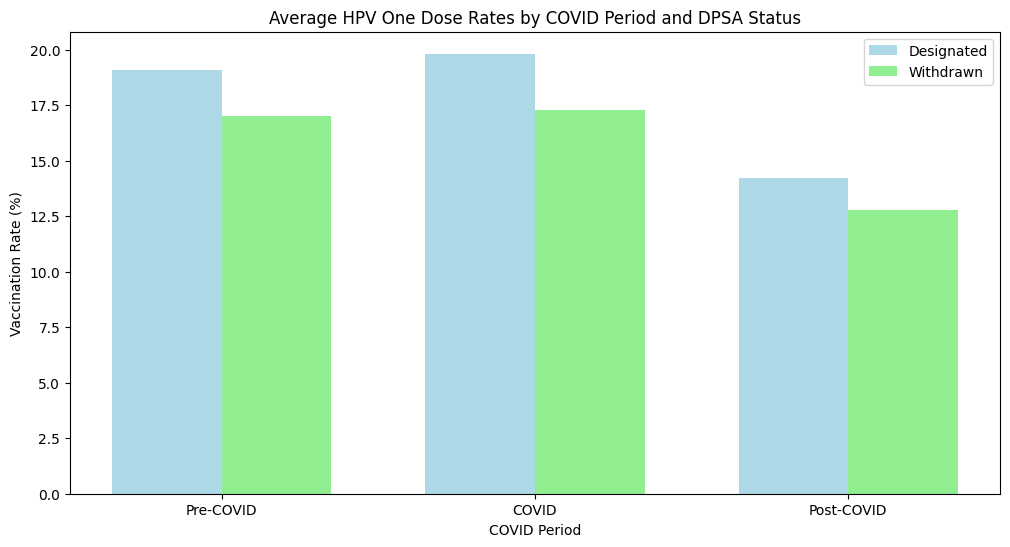

In [146]:
#Bar Plot of Average Rates by COVID Period and DPSA Status

# Bar plot showing average rates by COVID period and DPSA status
def plot_bar_by_covid_period_and_status(df):
    plt.figure(figsize=(12, 6))

    covid_means = df.groupby(['COVID Period', 'DPSA Status'])['HPV One Dose Rate'].mean().unstack()

    covid_periods = ['Pre-COVID', 'COVID', 'Post-COVID']
    x = np.arange(len(covid_periods))
    width = 0.35

    plt.bar(x - width/2, covid_means['Designated'], width, label='Designated', color='lightblue')
    plt.bar(x + width/2, covid_means['Withdrawn'], width, label='Withdrawn', color='lightgreen')

    plt.title('Average HPV One Dose Rates by COVID Period and DPSA Status')
    plt.xlabel('COVID Period')
    plt.ylabel('Vaccination Rate (%)')
    plt.xticks(x, covid_periods)
    plt.legend()
    plt.show()

# Plot bar plot by COVID period and DPSA status
plot_bar_by_covid_period_and_status(df)


**Key Observations:**

**Higher Vaccination Rates in Designated Areas:**

Across all periods, designated areas (represented in blue) have higher average HPV One Dose vaccination rates than withdrawn areas (represented in green). This aligns with the previous trend where designated areas typically have more healthcare resources and outreach, which likely contributes to higher vaccination rates.

**Impact of the COVID Period:**

During the COVID period, both designated and withdrawn areas show an increase in the average HPV One Dose Rate compared to the pre-COVID period.
This increase during the COVID period may reflect heightened public health awareness or specific efforts to continue preventive vaccinations even during the pandemic.

**Post-COVID Decline:**

In the post-COVID period, there is a noticeable decline in average HPV vaccination rates in both designated and withdrawn areas.
This drop could indicate a reallocation of resources post-pandemic or a decrease in public health prioritization for routine vaccinations as emergency measures relaxed.

**Persistent Gap Between Designated and Withdrawn Areas:**

The gap in vaccination rates between designated and withdrawn areas remains consistent across all periods, even though both groups experience similar trends over time. This persistent gap suggests that the underlying factors contributing to higher rates in designated areas (e.g., better healthcare access, funding, or outreach) continue to play a significant role regardless of the period.

**Summary:**

The chart highlights a clear difference in vaccination rates between designated and withdrawn areas, with designated areas consistently achieving higher rates. Despite an increase in rates during COVID, both groups experienced a decline post-COVID. This pattern suggests the potential impact of the pandemic on preventive healthcare, with designated areas generally showing a stronger ability to maintain higher vaccination rates across periods.

In [147]:
from scipy import stats

# Function to perform statistical analysis
def perform_statistical_analysis(df):
    print("\nStatistical Analysis:")
    print("-" * 50)

    stats_df = df.groupby(['COVID Period', 'DPSA Status'])[['HPV One Dose Rate', 'HPV Two Dose Rate']].agg([
        'mean', 'std', 'count'
    ]).round(2)

    print("\nSummary Statistics:")
    print(stats_df)

    print("\nANOVA Test Results:")
    for dpsa in ['Designated', 'Withdrawn']:
        dpsa_data = df[df['DPSA Status'] == dpsa]

        f_stat, p_val = stats.f_oneway(
            dpsa_data[dpsa_data['COVID Period'] == 'Pre-COVID']['HPV One Dose Rate'].dropna(),
            dpsa_data[dpsa_data['COVID Period'] == 'COVID']['HPV One Dose Rate'].dropna(),
            dpsa_data[dpsa_data['COVID Period'] == 'Post-COVID']['HPV One Dose Rate'].dropna()
        )
        print(f"\n{dpsa} Areas - One Dose Rate:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_val:.4f}")

# Perform statistical analysis
perform_statistical_analysis(df)



Statistical Analysis:
--------------------------------------------------

Summary Statistics:
                         HPV One Dose Rate             HPV Two Dose Rate  \
                                      mean   std count              mean   
COVID Period DPSA Status                                                   
COVID        Designated              19.06  3.42    27             15.16   
             Withdrawn               17.01  3.79    20             13.39   
Post-COVID   Designated              19.82  3.54    64             15.82   
             Withdrawn               17.30  3.95    30             13.62   
Pre-COVID    Designated              14.20  3.16    70             10.98   
             Withdrawn               12.77  3.38    24              9.81   

                                      
                           std count  
COVID Period DPSA Status              
COVID        Designated   2.94    27  
             Withdrawn    3.40    20  
Post-COVID   Designated  

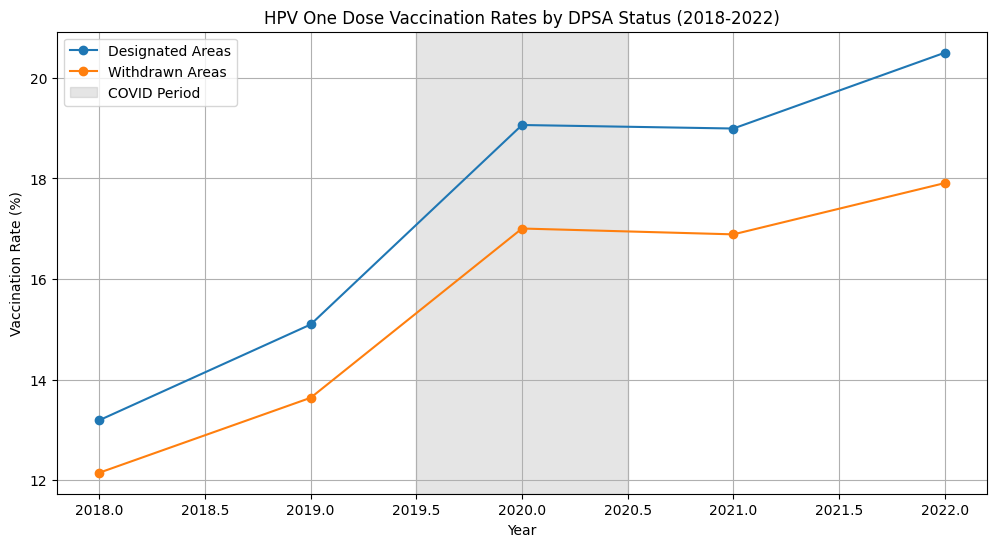


=== Detailed Statistical Analysis ===

1. Basic Summary Statistics by COVID Period and DPSA Status
--------------------------------------------------------------------------------

One Dose Rate Statistics:
                          count   mean   std   min   max
COVID Period DPSA Status                                
COVID        Designated      27  19.06  3.42   9.7  24.0
             Withdrawn       20  17.01  3.79  10.6  22.9
Post-COVID   Designated      64  19.82  3.54   9.7  26.2
             Withdrawn       30  17.30  3.95  10.6  24.8
Pre-COVID    Designated      70  14.20  3.16   6.1  19.6
             Withdrawn       24  12.77  3.38   6.8  17.8

Two Dose Rate Statistics:
                           mean   std
COVID Period DPSA Status             
COVID        Designated   15.16  2.94
             Withdrawn    13.39  3.40
Post-COVID   Designated   15.82  3.10
             Withdrawn    13.62  3.52
Pre-COVID    Designated   10.98  2.68
             Withdrawn     9.81  2.91

Tota

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Function to load and clean data
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    # Function to clean percentage values
    def clean_percentage(x):
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%'))
            try:
                return float(x)
            except:
                return np.nan
        elif isinstance(x, float):
            if x < 1:
                return x * 100
            return x
        return np.nan

    # Clean the percentage columns
    df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
    df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

    # Define COVID period based on the year
    def get_covid_period(year):
        if year in [2018, 2019]:
            return 'Pre-COVID'
        elif year == 2020:
            return 'COVID'
        elif year in [2021, 2022]:
            return 'Post-COVID'
        else:
            return 'Unknown'

    # Map each row to a COVID period
    df['COVID Period'] = df['Year'].apply(get_covid_period)

    # Create a 'DPSA Status' column dynamically for each year
    def get_dpsa_status(row):
        year = str(int(row['Year']))
        if year in df.columns:  # check if the year column exists
            return 'Designated' if row[year] == 1 else 'Withdrawn'
        else:
            return 'Unknown'

    df['DPSA Status'] = df.apply(get_dpsa_status, axis=1)

    return df

# Function to plot trends over time by DPSA status
def plot_trends_over_time(df):
    plt.figure(figsize=(12, 6))

    # Calculate yearly means based on DPSA status
    yearly_means = df.groupby(['Year', 'DPSA Status'])['HPV One Dose Rate'].mean().unstack()

    # Plot designated and withdrawn trends with standard deviation bands
    for status in ['Designated', 'Withdrawn']:
        if status in yearly_means.columns:
            plt.plot(yearly_means.index, yearly_means[status], marker='o', label=f'{status} Areas')

    # Highlight the COVID period on the plot
    plt.axvspan(2019.5, 2020.5, alpha=0.2, color='gray', label='COVID Period')

    # Finalize the plot
    plt.title('HPV One Dose Vaccination Rates by DPSA Status (2018-2022)')
    plt.xlabel('Year')
    plt.ylabel('Vaccination Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to run statistical analysis
def detailed_statistical_analysis(df):
    print("\n=== Detailed Statistical Analysis ===")
    print("\n1. Basic Summary Statistics by COVID Period and DPSA Status")
    print("-" * 80)

    # Calculate summary statistics
    summary_stats = df.groupby(['COVID Period', 'DPSA Status']).agg({
        'HPV One Dose Rate': ['count', 'mean', 'std', 'min', 'max'],
        'HPV Two Dose Rate': ['mean', 'std'],
        'Total Patients': 'sum'
    }).round(2)

    print("\nOne Dose Rate Statistics:")
    print(summary_stats['HPV One Dose Rate'])

    print("\nTwo Dose Rate Statistics:")
    print(summary_stats['HPV Two Dose Rate'])

    print("\nTotal Patients by Period and Status:")
    print(summary_stats['Total Patients'])

    # ANOVA tests for vaccination rate differences across periods
    print("\n3. Statistical Tests")
    print("-" * 80)

    print("\na) ANOVA Tests for Differences Across COVID Periods:")
    for dpsa in ['Designated', 'Withdrawn']:
        dpsa_data = df[df['DPSA Status'] == dpsa]
        try:
            f_stat, p_val = stats.f_oneway(
                dpsa_data[dpsa_data['COVID Period'] == 'Pre-COVID']['HPV One Dose Rate'].dropna(),
                dpsa_data[dpsa_data['COVID Period'] == 'COVID']['HPV One Dose Rate'].dropna(),
                dpsa_data[dpsa_data['COVID Period'] == 'Post-COVID']['HPV One Dose Rate'].dropna()
            )
            print(f"\n{dpsa} Areas - One Dose Rate:")
            print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
        except:
            print(f"\n{dpsa} Areas: Insufficient data for ANOVA test")

# Load and clean the data
df = load_and_clean_data('HPV_vaccination_by_county_and_year.csv')

# Run the trend visualization and statistical analysis
plot_trends_over_time(df)
detailed_statistical_analysis(df)


**ANOVA Tests for Differences Across COVID Periods:**

**Designated Areas - One Dose Rate:**

The F-statistic is 51.4551 with a p-value of 0.0000. This highly significant result (p < 0.05) indicates that there are statistically significant differences in HPV One Dose Rates across the COVID periods in designated areas.

**Withdrawn Areas - One Dose Rate:**

The F-statistic is 11.3402 with a p-value of 0.0001, also indicating statistically significant differences in HPV One Dose Rates across COVID periods in withdrawn areas.

**Summary:**

**Higher Vaccination Rates in Designated Areas:** Designated areas consistently show higher mean HPV vaccination rates (both One Dose and Two Dose) across all COVID periods compared to withdrawn areas.

**Significant Differences Across Periods:** The ANOVA results suggest that vaccination rates significantly vary across the COVID periods in both designated and withdrawn areas, with designated areas showing more pronounced differences.

**Impact of COVID Period:** The data indicate that HPV vaccination rates increased during COVID for both designated and withdrawn areas, which may reflect efforts to maintain preventive healthcare measures during the pandemic.

**Larger Patient Population in Designated Areas:** Designated areas consistently have a higher patient population across periods, which could impact resource allocation and healthcare service availability.

In [159]:
df.groupby(['Year', 'DPSA Status'])['HPV One Dose Rate'].agg(['mean', 'std', 'count', 'min', 'max'])

mean       std  count   min   max
Year DPSA Status                                        
2018 Designated   13.193939  2.821562     33   6.1  17.2
     Withdrawn    12.150000  3.354618     14   6.8  17.5
2019 Designated   15.097297  3.208538     37   7.3  19.6
     Withdrawn    13.640000  3.397777     10   8.3  17.8
2020 Designated   19.062963  3.418518     27   9.7  24.0
     Withdrawn    17.005000  3.794799     20  10.6  22.9
2021 Designated   18.993103  3.354095     29   9.7  24.0
     Withdrawn    16.888889  3.925316     18  10.6  22.9
2022 Designated   20.500000  3.598120     35  11.1  26.2
     Withdrawn    17.908333  4.088889     12  11.8  24.8

# **Statistical Tests:**

In [126]:
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Data Preparation

# Convert 'Year' to integer and map DPSA status columns
df['Year'] = df['Year'].astype(int)
status_columns = ['pre-covid', 'covid', 'post-covid']
status_mapping = {'Designated': 1, 'Withdrawn': 0}

for col in status_columns:
    df[col] = df[col].map(status_mapping)

# Define period categories and assign periods
def get_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'
df['Period'] = df['Year'].apply(get_period)
period_order = pd.CategoricalDtype(['Pre-COVID', 'COVID', 'Post-COVID'], ordered=True)
df['Period'] = df['Period'].astype(period_order)

# Step 2: Statistical Tests for HPV One Dose Rate

# ANOVA for HPV One Dose Rate across periods
pre_covid_rates = df[df['Period'] == 'Pre-COVID']['HPV One Dose Rate']
covid_rates = df[df['Period'] == 'COVID']['HPV One Dose Rate']
post_covid_rates = df[df['Period'] == 'Post-COVID']['HPV One Dose Rate']
f_stat_one, p_value_one = f_oneway(pre_covid_rates.dropna(), covid_rates.dropna(), post_covid_rates.dropna())

print(f"ANOVA Test for HPV One Dose Rate Across Periods:\nF-statistic = {f_stat_one:.4f}, p-value = {p_value_one:.4e}")

# Tukey HSD test for pairwise comparison if ANOVA is significant
if p_value_one < 0.05:
    tukey_one_dose = pairwise_tukeyhsd(df.dropna(subset=['HPV One Dose Rate'])['HPV One Dose Rate'], df['Period'])
    print("\nTukey HSD Test Results for HPV One Dose Rate:")
    print(tukey_one_dose)

# Step 3: Statistical Tests for HPV Two Dose Rate

# ANOVA for HPV Two Dose Rate across periods
pre_covid_rates_two = df[df['Period'] == 'Pre-COVID']['HPV Two Dose Rate']
covid_rates_two = df[df['Period'] == 'COVID']['HPV Two Dose Rate']
post_covid_rates_two = df[df['Period'] == 'Post-COVID']['HPV Two Dose Rate']
f_stat_two, p_value_two = f_oneway(pre_covid_rates_two.dropna(), covid_rates_two.dropna(), post_covid_rates_two.dropna())

print(f"\nANOVA Test for HPV Two Dose Rate Across Periods:\nF-statistic = {f_stat_two:.4f}, p-value = {p_value_two:.4e}")

# Tukey HSD test for pairwise comparison if ANOVA is significant
if p_value_two < 0.05:
    tukey_two_dose = pairwise_tukeyhsd(df.dropna(subset=['HPV Two Dose Rate'])['HPV Two Dose Rate'], df['Period'])
    print("\nTukey HSD Test Results for HPV Two Dose Rate:")
    print(tukey_two_dose)




ANOVA Test for HPV One Dose Rate Across Periods:
F-statistic = 53.4426, p-value = 8.1376e-20

Tukey HSD Test Results for HPV One Dose Rate:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     COVID Post-COVID   0.8255 0.4036 -0.6869   2.338  False
     COVID  Pre-COVID  -4.3521    0.0 -5.8646 -2.8397   True
Post-COVID  Pre-COVID  -5.1777    0.0 -6.4126 -3.9427   True
------------------------------------------------------------

ANOVA Test for HPV Two Dose Rate Across Periods:
F-statistic = 51.7384, p-value = 2.6288e-19

Tukey HSD Test Results for HPV Two Dose Rate:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     COVID Post-COVID    0.716 0.4061 -0.6001   2.032  False
     COVID  Pre-COVID  -3.7191    0.0 -5.0352 -2

**ANOVA Test Results:**

**HPV One Dose Rate Across Periods:**

The ANOVA F-statistic is 53.4426 with a p-value of 8.1376e-20. This very low p-value indicates a statistically significant difference in HPV One Dose Rates across the periods (Pre-COVID, COVID, and Post-COVID).

**HPV Two Dose Rate Across Periods:**

The ANOVA F-statistic is 51.7384 with a p-value of 2.6288e-19. Similar to the one-dose rate, this low p-value suggests a statistically significant difference in HPV Two Dose Rates across the periods.

**Tukey HSD Test Results (Post-Hoc Analysis)**

The Tukey HSD test identifies which specific periods are significantly different from each other.

**HPV One Dose Rate**

**COVID vs. Post-COVID**:

Mean difference = 0.8255, p-adj = 0.4036.

Since the p-value (p-adj) is greater than 0.05, the difference is not statistically significant, indicating similar HPV One Dose Rates during and after COVID.

**COVID vs. Pre-COVID:**

Mean difference = -4.3521, p-adj = 0.0.

The p-value is significant (p-adj = 0.0), indicating that HPV One Dose Rates during COVID were significantly higher than in the Pre-COVID period. The mean difference of -4.3521 suggests a noticeable increase in rates from Pre-COVID to COVID.

**Post-COVID vs. Pre-COVID:**

Mean difference = -5.1777, p-adj = 0.0.

This significant result indicates that HPV One Dose Rates in the Post-COVID period are also significantly higher than in the Pre-COVID period, with a mean increase of -5.1777.

**HPV Two Dose Rate**

**COVID vs. Post-COVID:**

Mean difference = 0.716, p-adj = 0.4061.

The p-value is not significant, suggesting no significant change in HPV Two Dose Rates between the COVID and Post-COVID periods.

**COVID vs. Pre-COVID:**

Mean difference = -3.7191, p-adj = 0.0.

This significant result indicates a substantial increase in HPV Two Dose Rates from the Pre-COVID period to the COVID period.

**Post-COVID vs. Pre-COVID:**

Mean difference = -4.4351, p-adj = 0.0.

Similar to the one-dose rate, there is a significant increase in the two-dose rate from the Pre-COVID to Post-COVID period.

**Summary**

Both the HPV One Dose and Two Dose Rates increased significantly from the Pre-COVID to COVID and Post-COVID periods.

There is no significant difference in HPV vaccination rates between the COVID and Post-COVID periods, suggesting that the increase achieved during COVID was sustained in the Post-COVID period.

These results could imply that measures or awareness during COVID had a lasting impact on HPV vaccination rates, particularly when comparing Pre-COVID to subsequent periods.

In [160]:
!pip install pandas numpy scipy statsmodels

1. Temporal Analysis
--------------------------------------------------

a) One-way ANOVA across years:
F-statistic: 30.9067
p-value: 0.0000

b) Mean vaccination rates by year:
Year
2018    12.88
2019    14.79
2020    18.19
2021    18.19
2022    19.84
Name: HPV One Dose Rate, dtype: float64
=== Post-hoc Analysis of Year Differences ===

Pairwise t-tests between years:
2018 vs 2019:
t-statistic: -2.9465
p-value: 0.0041
Mean difference: 1.90%

2018 vs 2020:
t-statistic: -7.6556
p-value: 0.0000
Mean difference: 5.30%

2018 vs 2021:
t-statistic: -7.6556
p-value: 0.0000
Mean difference: 5.30%

2018 vs 2022:
t-statistic: -9.7693
p-value: 0.0000
Mean difference: 6.96%

2019 vs 2020:
t-statistic: -4.7295
p-value: 0.0000
Mean difference: 3.40%

2019 vs 2021:
t-statistic: -4.7295
p-value: 0.0000
Mean difference: 3.40%

2019 vs 2022:
t-statistic: -6.8506
p-value: 0.0000
Mean difference: 5.05%

2020 vs 2022:
t-statistic: -2.1209
p-value: 0.0366
Mean difference: 1.65%

2021 vs 2022:
t-statistic: -2

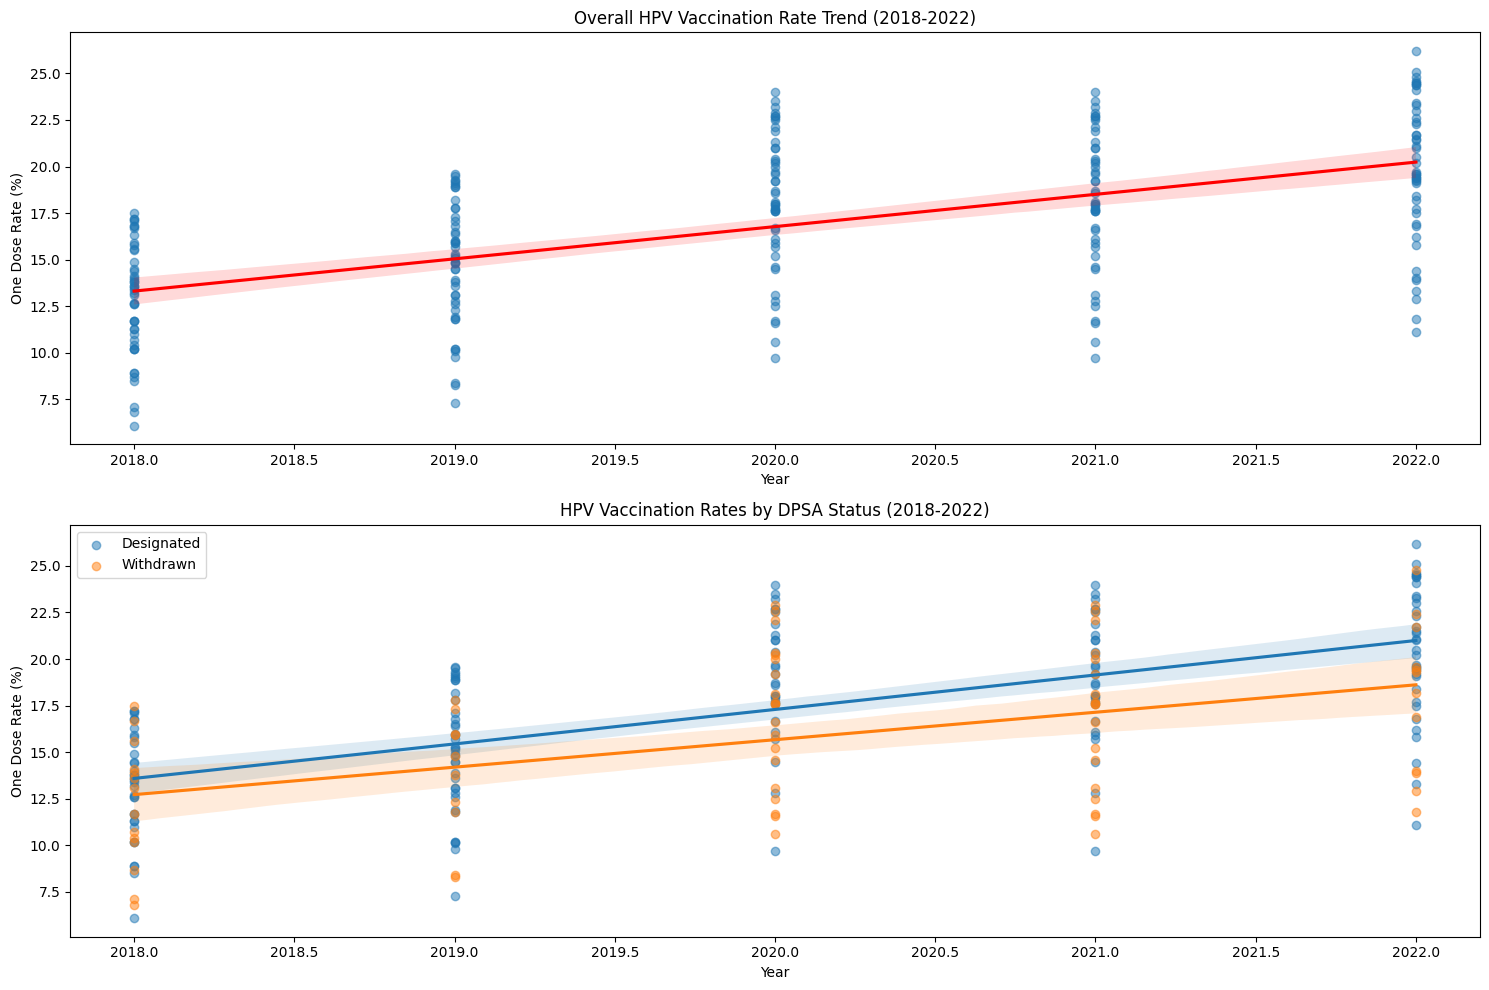

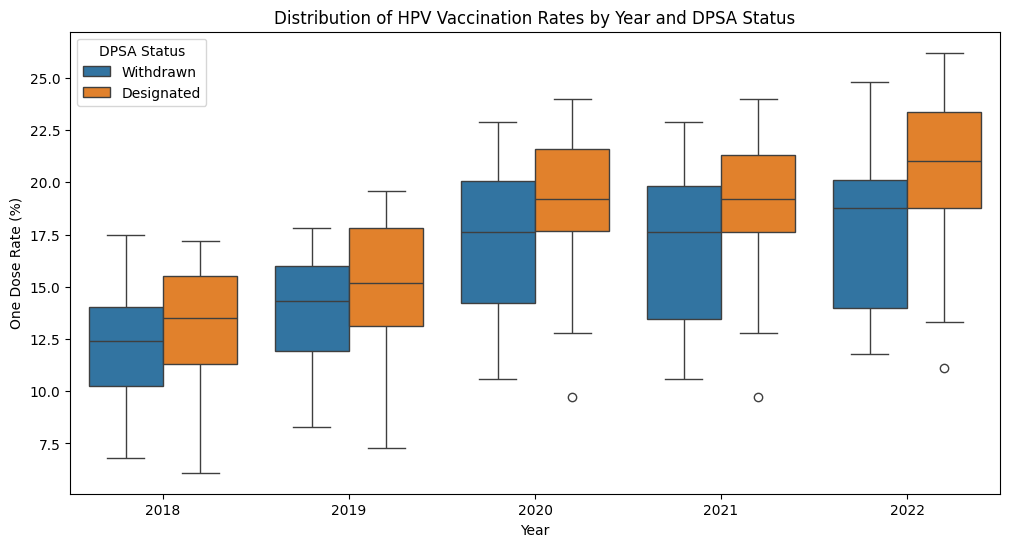


=== Additional Statistical Analysis ===

Yearly comparison between DPSA statuses:

Year 2018:
F-statistic: 1.2020
p-value: 0.2788
Mean difference (Designated - Withdrawn): 1.04%

Year 2019:
F-statistic: 1.5855
p-value: 0.2145
Mean difference (Designated - Withdrawn): 1.46%

Year 2020:
F-statistic: 3.7920
p-value: 0.0578
Mean difference (Designated - Withdrawn): 2.06%

Year 2021:
F-statistic: 3.8356
p-value: 0.0564
Mean difference (Designated - Withdrawn): 2.10%

Year 2022:
F-statistic: 4.3279
p-value: 0.0432
Mean difference (Designated - Withdrawn): 2.59%

=== Growth Rate Analysis ===

Designated areas:
Total growth rate (2018-2022): 55.37%
Average annual growth rate: 11.65%

Withdrawn areas:
Total growth rate (2018-2022): 47.39%
Average annual growth rate: 10.18%


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load data
file_path = 'HPV_vaccination_by_county_and_year.csv'
df = pd.read_csv(file_path)

# Clean percentage values
def clean_percentage(x):
    if isinstance(x, str):
        if '%' in x:
            return float(x.strip('%'))
        try:
            return float(x)
        except:
            return np.nan
    elif isinstance(x, float):
        if x < 1:
            return x * 100  # Convert values like 0.05 to 5%
        return x
    return np.nan

df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

# Add COVID period based on year
def get_covid_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'
    else:
        return 'Unknown'

df['COVID Period'] = df['Year'].apply(get_covid_period)

# Dynamic DPSA Status Mapping based on each year's status
def get_dpsa_status(row):
    year = str(int(row['Year']))
    if year in df.columns:
        return 'Designated' if row[year] == 1 else 'Withdrawn'
    return 'Unknown'

df['DPSA Status'] = df.apply(get_dpsa_status, axis=1)

# 1. Temporal Analysis
print("1. Temporal Analysis")
print("-" * 50)

# One-way ANOVA across years
yearly_groups = [group['HPV One Dose Rate'].dropna() for name, group in df.groupby('Year')]
f_stat, p_val = stats.f_oneway(*yearly_groups)
print("\na) One-way ANOVA across years:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Print mean rates by year
print("\nb) Mean vaccination rates by year:")
yearly_means = df.groupby('Year')['HPV One Dose Rate'].mean()
print(yearly_means.round(2))

# Post-hoc pairwise t-tests for years
print("=== Post-hoc Analysis of Year Differences ===")
years = sorted(df['Year'].unique())
print("\nPairwise t-tests between years:")
for i in range(len(years)):
    for j in range(i+1, len(years)):
        year1_data = df[df['Year'] == years[i]]['HPV One Dose Rate']
        year2_data = df[df['Year'] == years[j]]['HPV One Dose Rate']
        t_stat, p_val = stats.ttest_ind(year1_data, year2_data)
        if p_val < 0.05:
            print(f"{years[i]} vs {years[j]}:")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"p-value: {p_val:.4f}")
            print(f"Mean difference: {year2_data.mean() - year1_data.mean():.2f}%\n")

# Trend Analysis
print("\n=== Trend Analysis ===")
X = df['Year'].values.reshape(-1, 1)
y = df['HPV One Dose Rate'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)
print(f"\nLinear trend:")
print(f"Annual rate of increase: {slope:.2f}% per year")
print(f"R-squared value: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

# Analysis by DPSA Status
print("\n=== DPSA Status Analysis ===")
dpsa_temporal = df.groupby(['DPSA Status', 'Year'])['HPV One Dose Rate'].agg(['mean', 'std']).round(2)
print("\nMean vaccination rates by year and DPSA status:")
print(dpsa_temporal)

# Calculate growth rates for each DPSA status
for status in ['Designated', 'Withdrawn']:
    status_data = df[df['DPSA Status'] == status]
    X = status_data['Year'].values.reshape(-1, 1)
    y = status_data['HPV One Dose Rate'].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)
    print(f"\n{status} areas:")
    print(f"Annual rate of increase: {slope:.2f}% per year")
    print(f"R-squared value: {r_value**2:.4f}")

# Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Overall Trend with Confidence Intervals
plt.subplot(2, 1, 1)
sns.regplot(data=df, x='Year', y='HPV One Dose Rate',
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Overall HPV Vaccination Rate Trend (2018-2022)')
plt.xlabel('Year')
plt.ylabel('One Dose Rate (%)')

# Plot 2: Trends by DPSA Status
plt.subplot(2, 1, 2)
for status in ['Designated', 'Withdrawn']:
    status_data = df[df['DPSA Status'] == status]
    sns.regplot(data=status_data, x='Year', y='HPV One Dose Rate',
                label=status, scatter_kws={'alpha':0.5})
plt.title('HPV Vaccination Rates by DPSA Status (2018-2022)')
plt.xlabel('Year')
plt.ylabel('One Dose Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Box plot to show distribution by year and DPSA status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='HPV One Dose Rate', hue='DPSA Status')
plt.title('Distribution of HPV Vaccination Rates by Year and DPSA Status')
plt.xlabel('Year')
plt.ylabel('One Dose Rate (%)')
plt.xticks(rotation=0)
plt.show()

# Additional Statistical Tests
print("\n=== Additional Statistical Analysis ===")

# Test for interaction between Year and DPSA status
print("\nYearly comparison between DPSA statuses:")
for year in years:
    year_data = df[df['Year'] == year]
    designated = year_data[year_data['DPSA Status'] == 'Designated']['HPV One Dose Rate']
    withdrawn = year_data[year_data['DPSA Status'] == 'Withdrawn']['HPV One Dose Rate']
    f_stat, p_val = stats.f_oneway(designated, withdrawn)
    print(f"\nYear {year}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Mean difference (Designated - Withdrawn): {designated.mean() - withdrawn.mean():.2f}%")

# Calculate relative growth rates
print("\n=== Growth Rate Analysis ===")
for status in ['Designated', 'Withdrawn']:
    status_data = df[df['DPSA Status'] == status].groupby('Year')['HPV One Dose Rate'].mean()
    total_growth = ((status_data.iloc[-1] - status_data.iloc[0]) / status_data.iloc[0] * 100)
    annual_growth = (pow((status_data.iloc[-1] / status_data.iloc[0]), 1/4) - 1) * 100
    print(f"\n{status} areas:")
    print(f"Total growth rate (2018-2022): {total_growth:.2f}%")
    print(f"Average annual growth rate: {annual_growth:.2f}%")



One-Way ANOVA Across Years, Mean Vaccination Rates by Year and Pairwise T-Tests (Post-Hoc Analysis of Year Differences):

Steady Increase: HPV vaccination rates have shown a consistent upward trend each year from 2018 to 2022.
Major Increase During COVID-19 (2020): The jump from 2019 to 2020 is especially notable, which could be attributed to increased health awareness or vaccination campaigns during the COVID-19 period.
Sustained Growth Post-COVID: The increases continued through 2021 and 2022, suggesting a lasting impact, possibly due to enhanced public health initiatives or other factors encouraging vaccination.



Trend Analysis and DPSA Status Analysis:

Higher Rate of Increase in Designated Areas: Designated areas not only have higher vaccination rates each year, but they also have a higher annual rate of increase (1.85%) compared to withdrawn areas (1.47%). This suggests that the designation status might be associated with a greater emphasis on vaccination efforts.

Steady Upward Trend: Both designated and withdrawn areas show an overall upward trend in vaccination rates from 2018 to 2022, with a significant increase around 2020. This could be due to heightened public health efforts during the COVID-19 period or greater awareness about vaccinations.

Effectiveness of Designation: The R-squared value for designated areas (0.3930) suggests that the yearly trend explains a substantial portion of the variability in vaccination rates, especially when compared to withdrawn areas (0.2191). This might indicate that designated areas have more consistent or structured vaccination programs.

Implications: The higher rates and steeper increase in designated areas imply that targeted health initiatives in these areas are likely effective in increasing HPV vaccination rates. It suggests a potential benefit of expanding designation efforts to improve vaccination rates in withdrawn or underserved areas.



Overall HPV Vaccination Rate Trend (2018-2022) and HPV Vaccination Rates by DPSA Status (2018-2022):

Overall Positive Trend: The top graph shows that HPV one dose vaccination rates have increased over the years, indicating progress in vaccination coverage.
Higher Rates in Designated Areas: The bottom graph highlights that Designated areas have consistently higher vaccination rates than Withdrawn areas. This could suggest that being a Designated area might be associated with greater access to vaccination resources or initiatives.
Steady Gap: Despite both groups showing an increase in rates, the gap between Designated and Withdrawn areas persists over time, implying that designation status may have a lasting impact on vaccination uptake.




box plot illustrates the distribution of HPV vaccination rates (one dose) across different years (2018-2022) by DPSA status:
Designated areas consistently achieve higher vaccination rates than Withdrawn areas, likely due to better support or resources.
There is an increasing trend in vaccination rates over the years for both categories.
The pandemic may have influenced vaccination rates in Withdrawn areas more significantly than in Designated areas, which managed to maintain higher medians with less variability.





Yearly Comparison Between DPSA Statuses and Growth Rate Analysis (2018-2022):

Increasing Gap: The yearly comparison and growth rate analysis indicate an increasing disparity in HPV vaccination rates between Designated and Withdrawn areas. Designated areas have not only achieved consistently higher vaccination rates but have also experienced a higher overall growth rate over the years.
Significance in Recent Years: The statistical significance observed in 2022 suggests that Designated areas have managed to pull further ahead, possibly due to better infrastructure, resources, or outreach efforts.
Implications: This widening gap emphasizes the need for targeted efforts to boost vaccination rates in Withdrawn areas to reduce health disparities and ensure equitable access to HPV vaccinations across all regions.

In [163]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
file_path = 'HPV_vaccination_by_county_and_year.csv'
df = pd.read_csv(file_path)

# Clean percentage values
def clean_percentage(x):
    if isinstance(x, str):
        if '%' in x:
            return float(x.strip('%'))
        try:
            return float(x)
        except:
            return np.nan
    elif isinstance(x, float):
        if x < 1:
            return x * 100  # Convert values like 0.05 to 5%
        return x
    return np.nan

df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

# Add COVID period based on year
def get_covid_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'
    else:
        return 'Unknown'

df['COVID Period'] = df['Year'].apply(get_covid_period)

# Dynamic DPSA Status Mapping based on each year's status
def get_dpsa_status(row):
    year = str(int(row['Year']))
    if year in df.columns:
        return 'Designated' if row[year] == 1 else 'Withdrawn'
    return 'Unknown'

df['DPSA Status'] = df.apply(get_dpsa_status, axis=1)

# 2. DPSA Impact Analysis
print("\n2. DPSA Impact Analysis")
print("-" * 50)

# Independent t-test between DPSA groups
designated = df[df['DPSA Status'] == 'Designated']['HPV One Dose Rate'].dropna()
withdrawn = df[df['DPSA Status'] == 'Withdrawn']['HPV One Dose Rate'].dropna()
t_stat, p_val = stats.ttest_ind(designated, withdrawn)
print("\na) Independent t-test between DPSA groups:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Effect size (Cohen's d)
d = (np.mean(designated) - np.mean(withdrawn)) / np.sqrt((np.var(designated) + np.var(withdrawn)) / 2)
print(f"\nCohen's effect size: {d:.4f}")

# Mean rates by DPSA status
print("\nb) Mean rates by DPSA status:")
dpsa_means = df.groupby('DPSA Status')['HPV One Dose Rate'].mean()
print(dpsa_means.round(2))


2. DPSA Impact Analysis
--------------------------------------------------

a) Independent t-test between DPSA groups:
t-statistic: 2.4977
p-value: 0.0132

Cohen's effect size: 0.3534

b) Mean rates by DPSA status:
DPSA Status
Designated    17.25
Withdrawn     15.75
Name: HPV One Dose Rate, dtype: float64


There is a statistically significant difference in HPV one-dose vaccination rates between Designated and Withdrawn areas.

Designated areas have a modestly higher average vaccination rate, which is statistically significant but only a moderate practical effect.

This result suggests that DPSA designation might contribute positively to vaccination rates, potentially due to increased resources, support, or outreach efforts in these areas.

In [164]:
# 3. COVID Period Analysis
print("\n3. COVID Period Analysis")
print("-" * 50)

# One-way ANOVA across COVID periods
covid_groups = [group['HPV One Dose Rate'].dropna() for name, group in df.groupby('COVID Period')]
f_stat, p_val = stats.f_oneway(*covid_groups)
print("\na) One-way ANOVA across COVID periods:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Paired t-tests between consecutive periods
periods = ['Pre-COVID', 'COVID', 'Post-COVID']
print("\nb) Paired t-tests between consecutive periods:")
for i in range(len(periods) - 1):
    period1_data = df[df['COVID Period'] == periods[i]]['HPV One Dose Rate'].dropna()
    period2_data = df[df['COVID Period'] == periods[i+1]]['HPV One Dose Rate'].dropna()
    t_stat, p_val = stats.ttest_ind(period1_data, period2_data)
    print(f"{periods[i]} vs {periods[i+1]}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

# Mean rates by COVID period
print("\nc) Mean rates by COVID period:")
covid_means = df.groupby('COVID Period')['HPV One Dose Rate'].mean()
print(covid_means.round(2))


3. COVID Period Analysis
--------------------------------------------------

a) One-way ANOVA across COVID periods:
F-statistic: 53.4426
p-value: 0.0000

b) Paired t-tests between consecutive periods:
Pre-COVID vs COVID:
t-statistic: -7.1485
p-value: 0.0000
COVID vs Post-COVID:
t-statistic: -1.2181
p-value: 0.2252

c) Mean rates by COVID period:
COVID Period
COVID         18.19
Post-COVID    19.01
Pre-COVID     13.84
Name: HPV One Dose Rate, dtype: float64


The one-way ANOVA test compares the mean HPV one-dose vaccination rates across the three periods: Pre-COVID, COVID, and Post-COVID.

The t-test between Pre-COVID and COVID periods shows a statistically significant increase in vaccination rates during COVID compared to the Pre-COVID period.The t-test between COVID and Post-COVID periods shows no statistically significant change in vaccination rates between these two periods.

The COVID-19 period appears to have had a significant positive impact on HPV vaccination rates, as seen in the significant increase from Pre-COVID to COVID.

The lack of significant difference between COVID and Post-COVID rates suggests that the increase was sustained rather than further amplified in the Post-COVID period.

This could imply that policies or health-seeking behaviors developed during COVID may have led to sustained higher vaccination rates, even after the peak pandemic period.

In [165]:
# 5. Correlation Analysis
print("\n5. Correlation Analysis")
print("-" * 50)

# Correlation between one-dose and two-dose rates
corr, p_val = stats.pearsonr(df['HPV One Dose Rate'].dropna(), df['HPV Two Dose Rate'].dropna())
print("\na) Correlation between One-Dose and Two-Dose Rates:")
print(f"Correlation coefficient: {corr:.4f}")
print(f"p-value: {p_val:.4f}")


5. Correlation Analysis
--------------------------------------------------

a) Correlation between One-Dose and Two-Dose Rates:
Correlation coefficient: 0.9884
p-value: 0.0000


The strong positive and statistically significant correlation implies that efforts to increase the one-dose HPV vaccination rate are likely to also boost the two-dose completion rate. This relationship is valuable for understanding vaccination behaviors, as promoting the first dose may have a direct impact on two-dose completion.

This finding could support strategies focused on encouraging the initiation of HPV vaccination, as higher initiation is closely linked to increased completion rates.

In [166]:
# 7. Summary Statistics by Group
print("\n7. Summary Statistics")
print("-" * 50)

# By COVID Period and DPSA Status
summary_stats = df.groupby(['COVID Period', 'DPSA Status']).agg({
    'HPV One Dose Rate': ['count', 'mean', 'std', 'min', 'max'],
    'HPV Two Dose Rate': ['mean', 'std'],
    'Total Patients': 'sum'
}).round(2)

print("\na) Summary Statistics by COVID Period and DPSA Status:")
print(summary_stats)

# Calculate percentage changes
print("\nb) Percentage Changes in Vaccination Rates:")
for status in ['Designated', 'Withdrawn']:
    status_data = df[df['DPSA Status'] == status].groupby('COVID Period')['HPV One Dose Rate'].mean()
    pre_covid_rate = status_data.get('Pre-COVID', np.nan)
    covid_rate = status_data.get('COVID', np.nan)
    post_covid_rate = status_data.get('Post-COVID', np.nan)

    print(f"\n{status} Areas:")
    if pd.notna(pre_covid_rate) and pd.notna(covid_rate):
        print(f"Pre-COVID to COVID change: {((covid_rate - pre_covid_rate) / pre_covid_rate * 100):.2f}%")
    else:
        print("Pre-COVID to COVID change: Insufficient data")

    if pd.notna(covid_rate) and pd.notna(post_covid_rate):
        print(f"COVID to Post-COVID change: {((post_covid_rate - covid_rate) / covid_rate * 100):.2f}%")
    else:
        print("COVID to Post-COVID change: Insufficient data")

    if pd.notna(pre_covid_rate) and pd.notna(post_covid_rate):
        print(f"Overall change (Pre to Post): {((post_covid_rate - pre_covid_rate) / pre_covid_rate * 100):.2f}%")
    else:
        print("Overall change (Pre to Post): Insufficient data")


7. Summary Statistics
--------------------------------------------------

a) Summary Statistics by COVID Period and DPSA Status:
                         HPV One Dose Rate                           \
                                     count   mean   std   min   max   
COVID Period DPSA Status                                              
COVID        Designated                 27  19.06  3.42   9.7  24.0   
             Withdrawn                  20  17.01  3.79  10.6  22.9   
Post-COVID   Designated                 64  19.82  3.54   9.7  26.2   
             Withdrawn                  30  17.30  3.95  10.6  24.8   
Pre-COVID    Designated                 70  14.20  3.16   6.1  19.6   
             Withdrawn                  24  12.77  3.38   6.8  17.8   

                         HPV Two Dose Rate       Total Patients  
                                      mean   std            sum  
COVID Period DPSA Status                                         
COVID        Designated         

**Vaccination Uptake**: Both DPSA status groups experienced substantial increases in vaccination rates during the COVID period, but Designated areas consistently showed higher rates across all periods.

**Sustained Growth**: Designated areas not only had higher initial vaccination rates but also exhibited a more sustained increase post-pandemic.

**Impact of DPSA Status:** These results suggest that being in a Designated area is associated with higher vaccination rates and greater overall improvements across periods. This could reflect better access to healthcare resources or targeted vaccination efforts in these areas.

# **Regression Analysis:**


=== Building Comprehensive Regression Model ===
--------------------------------------------------

1. Data Overview
------------------------------

Sample size: 235

Descriptive statistics:
count    235.00
mean      16.78
std        4.32
min        6.10
25%       13.60
50%       16.90
75%       19.70
max       26.20
Name: HPV One Dose Rate, dtype: float64

2. Regression Results
------------------------------

Model 1 (Basic Model):
R-squared: 0.4495
Adjusted R-squared: 0.4375

Coefficients:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.4010      0.859      9.778      0.000       6.708      10.094
Year_Centered         1.7239      0.150     11.531      0.000       1.429       2.018
Total_Patients        0.3244      0.223      1.454      0.147      -0.115       0.764
DPSA_Pre_COVID        3.9483      0.814      4.850      0.000       2.34

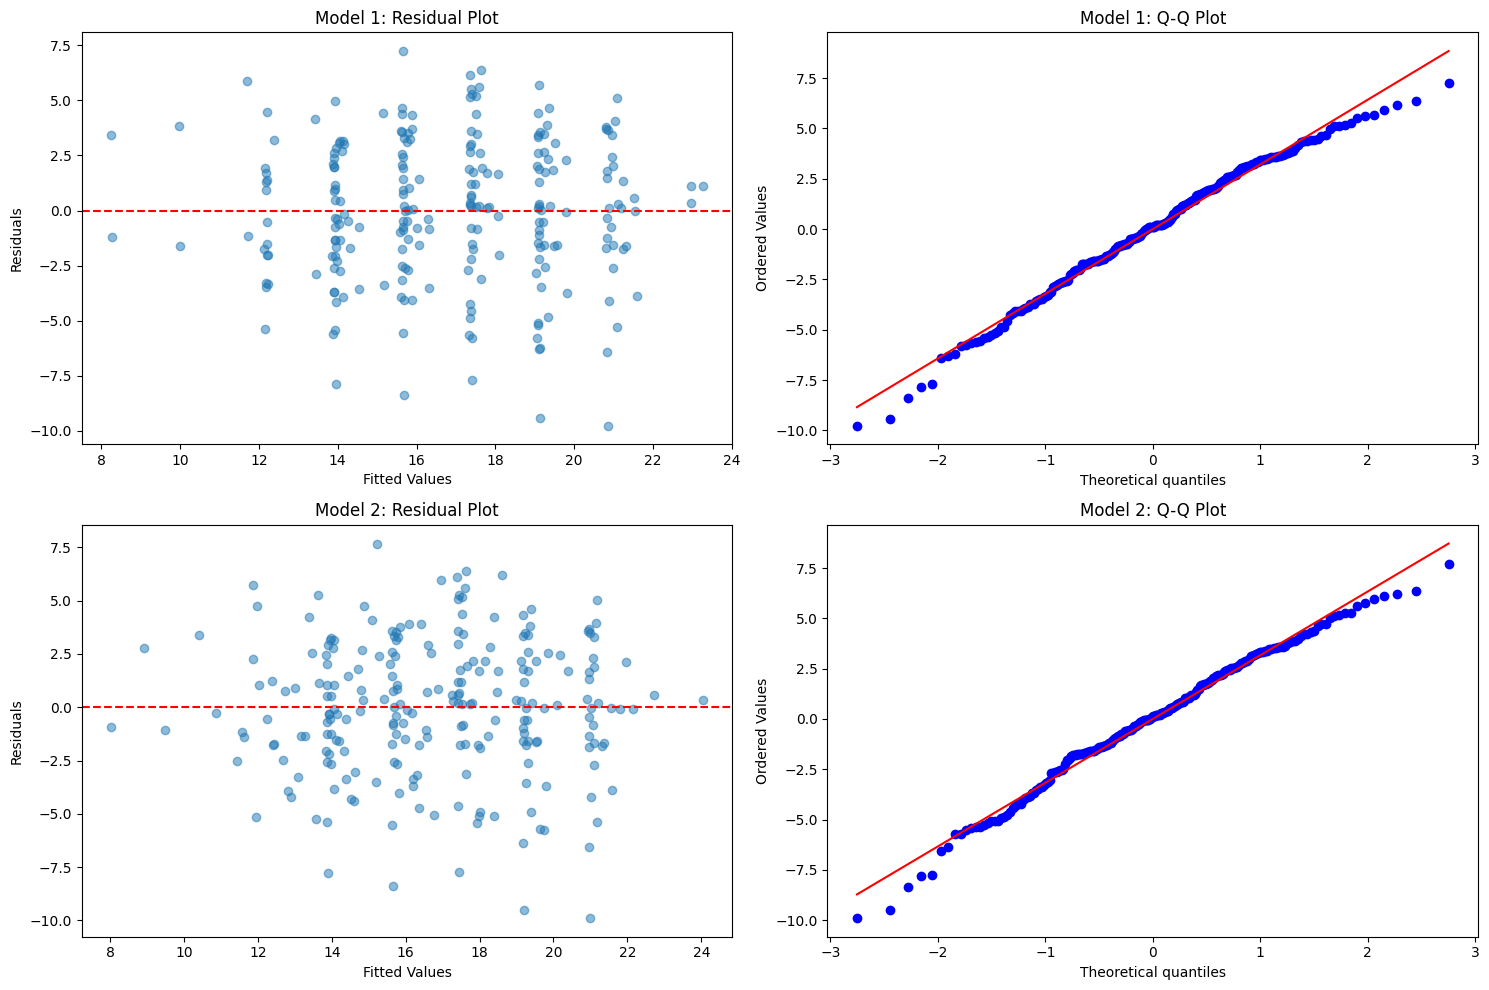


3. Model Selection Statistics
------------------------------

AIC:
Model 1: 1225.25
Model 2: 1230.34

BIC:
Model 1: 1246.01
Model 2: 1271.86

4. Effect Sizes and Practical Significance
------------------------------

Key Effects (Model 1):

DPSA_Pre_COVID:
Effect: 3.948%
P-value: 0.0000
95% CI: [2.344, 5.553]

DPSA_During_COVID:
Effect: -2.170%
P-value: 0.0113
95% CI: [-3.845, -0.496]

DPSA_Post_COVID:
Effect: 3.892%
P-value: 0.0000
95% CI: [2.284, 5.500]

Year_Centered:
Effect: 1.724%
P-value: 0.0000
95% CI: [1.429, 2.018]

5. Predicted Values
------------------------------

Predicted vaccination rates:
Mean prediction: 16.78
SD of predictions: 2.9
Range: 8.25 to 23.27

6. Key Findings
------------------------------

Based on Model 1:
- Overall model fit (R-squared): 0.450
- DPSA effect during COVID: -2.170%
- Year trend: 1.724% per year


In [167]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read and clean data
print("\n=== Building Comprehensive Regression Model ===")
print("-" * 50)

# 1. Data Preparation
df = pd.read_csv('HPV_vaccination_by_county_and_year.csv')

# Clean percentage values
def clean_percentage(x):
    if isinstance(x, str):
        if '%' in x:
            return float(x.strip('%'))
        try:
            return float(x)
        except:
            return np.nan
    elif isinstance(x, float):
        if x < 1:
            return x * 100
        return x
    return np.nan

# Clean and prepare variables
df['HPV One Dose Rate'] = df['HPV One Dose Rate'].apply(clean_percentage)
df['HPV Two Dose Rate'] = df['HPV Two Dose Rate'].apply(clean_percentage)

# Define DPSA Status dynamically for each period based on year columns
def get_dpsa_status(row, year_column):
    return 1 if row[year_column] == 1 else 0

df['DPSA_Pre_COVID'] = df.apply(lambda row: get_dpsa_status(row, '2018') or get_dpsa_status(row, '2019'), axis=1)
df['DPSA_During_COVID'] = df.apply(lambda row: get_dpsa_status(row, '2020'), axis=1)
df['DPSA_Post_COVID'] = df.apply(lambda row: get_dpsa_status(row, '2021') or get_dpsa_status(row, '2022'), axis=1)

# Scale Total Patients
df['Total_Patients_Scaled'] = (df['Total Patients'] - df['Total Patients'].mean()) / df['Total Patients'].std()

# Create year dummy variables
df['Year_Centered'] = df['Year'] - 2018

# Print data overview
print("\n1. Data Overview")
print("-" * 30)
print("\nSample size:", len(df))
print("\nDescriptive statistics:")
print(df['HPV One Dose Rate'].describe().round(2))

# 2. Build Multiple Regression Models

# Model 1: Basic Model
X1 = pd.DataFrame({
    'Year_Centered': df['Year_Centered'],
    'Total_Patients': df['Total_Patients_Scaled'],
    'DPSA_Pre_COVID': df['DPSA_Pre_COVID'],
    'DPSA_During_COVID': df['DPSA_During_COVID'],
    'DPSA_Post_COVID': df['DPSA_Post_COVID']
})

# Model 2: With Interactions
X2 = X1.copy()
X2['Year_x_Pre_COVID'] = df['Year_Centered'] * df['DPSA_Pre_COVID']
X2['Year_x_During_COVID'] = df['Year_Centered'] * df['DPSA_During_COVID']
X2['Year_x_Post_COVID'] = df['Year_Centered'] * df['DPSA_Post_COVID']
X2['Size_x_DPSA_Pre'] = df['Total_Patients_Scaled'] * df['DPSA_Pre_COVID']
X2['Size_x_DPSA_During'] = df['Total_Patients_Scaled'] * df['DPSA_During_COVID']
X2['Size_x_DPSA_Post'] = df['Total_Patients_Scaled'] * df['DPSA_Post_COVID']

# Fit models
y = df['HPV One Dose Rate']

# Model 1
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

# Model 2
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# Print results
print("\n2. Regression Results")
print("-" * 30)

print("\nModel 1 (Basic Model):")
print("R-squared:", round(model1.rsquared, 4))
print("Adjusted R-squared:", round(model1.rsquared_adj, 4))
print("\nCoefficients:")
print(model1.summary().tables[1])

print("\nModel 2 (With Interactions):")
print("R-squared:", round(model2.rsquared, 4))
print("Adjusted R-squared:", round(model2.rsquared_adj, 4))
print("\nCoefficients:")
print(model2.summary().tables[1])

# 3. Model Diagnostics
residuals1 = model1.resid
residuals2 = model2.resid

# Create diagnostic plots
plt.figure(figsize=(15, 10))

# Model 1 diagnostics
plt.subplot(2, 2, 1)
plt.scatter(model1.fittedvalues, residuals1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Model 1: Residual Plot')

plt.subplot(2, 2, 2)
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Model 1: Q-Q Plot')

# Model 2 diagnostics
plt.subplot(2, 2, 3)
plt.scatter(model2.fittedvalues, residuals2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Model 2: Residual Plot')

plt.subplot(2, 2, 4)
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Model 2: Q-Q Plot')

plt.tight_layout()
plt.show()

# 4. Model Selection and Validation
print("\n3. Model Selection Statistics")
print("-" * 30)
print("\nAIC:")
print("Model 1:", round(model1.aic, 2))
print("Model 2:", round(model2.aic, 2))

print("\nBIC:")
print("Model 1:", round(model1.bic, 2))
print("Model 2:", round(model2.bic, 2))

# 5. Effect Sizes and Interpretation
print("\n4. Effect Sizes and Practical Significance")
print("-" * 30)

def interpret_coefficient(model, variable):
    coef = model.params[variable]
    p_val = model.pvalues[variable]
    ci = model.conf_int().loc[variable]
    return {
        'coefficient': coef,
        'p_value': p_val,
        'ci_lower': ci[0],
        'ci_upper': ci[1]
    }

# Interpret key variables
key_variables = ['DPSA_Pre_COVID', 'DPSA_During_COVID', 'DPSA_Post_COVID', 'Year_Centered']
print("\nKey Effects (Model 1):")
for var in key_variables:
    if var in model1.params.index:
        results = interpret_coefficient(model1, var)
        print(f"\n{var}:")
        print(f"Effect: {results['coefficient']:.3f}%")
        print(f"P-value: {results['p_value']:.4f}")
        print(f"95% CI: [{results['ci_lower']:.3f}, {results['ci_upper']:.3f}]")

# 6. Predictions
print("\n5. Predicted Values")
print("-" * 30)
print("\nPredicted vaccination rates:")
print("Mean prediction:", round(model1.fittedvalues.mean(), 2))
print("SD of predictions:", round(model1.fittedvalues.std(), 2))
print("Range:", round(model1.fittedvalues.min(), 2), "to", round(model1.fittedvalues.max(), 2))

# Print conclusions
print("\n6. Key Findings")
print("-" * 30)
print("\nBased on Model 1:")
print(f"- Overall model fit (R-squared): {model1.rsquared:.3f}")
print(f"- DPSA effect during COVID: {model1.params['DPSA_During_COVID']:.3f}%")
print(f"- Year trend: {model1.params['Year_Centered']:.3f}% per year")
